In [140]:
# filepath: /Users/jennifermajer/Documents/CUNY/EPID 825/Project/maternal_depression.ipynb


# Imports
%pip install xgboost scikeras tensorflow shap pandas matplotlib seaborn scikit-learn imblearn
# Required imports for oversampling
from imblearn.over_sampling import SMOTE
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import shap


class CustomKerasClassifier(KerasClassifier):
    def __sklearn_tags__(self):
        return {"estimator_type": "classifier"}

# Set working directory
os.chdir("/Users/jennifermajer/Documents/CUNY/EPID 825/Project")

## Load data 
# Longitudinal data - not imputed
dat_ml_long_1y = pd.read_csv("dat_ml_long_1y.csv")


# Wide data - imputation using mice
complete_data_1y = pd.read_csv("complete_data_mice_1y.csv")
complete_data_7y = pd.read_csv("complete_data_mice_7y.csv")
complete_data_6m = pd.read_csv("complete_data_mice_6m.csv")


528883.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


Original class distribution:
1    214
0     75
Name: count, dtype: int64

Training Neural Network with manual CV (with SMOTE)...
Fold 1...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 2...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 3...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Fold 4...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 5...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
                  Model  Accuracy  Precision    Recall  F1 Score       AUC
3         Random Forest  0.712803   0.756863  0.901869  0.823028  0.602946
1                 LASSO  0.560554   0.770186  0.579439  0.661333  0.588040
4               XGBoost  0.667820   0.758772  0.808411  0.782805  0.582104
5           Naïve Bayes  0.553633   0.797203  0.532710  0.638655  0.574751
2                   SVM  0.574394   0.766082  0.612150  0.680519  0.554876
0   Logistic Regression  0.543253   0.741176  0.588785  0.656250  0.548143
6  Neural Network Keras  0.584775   0.747368  0.663551  0.702970  0.518117


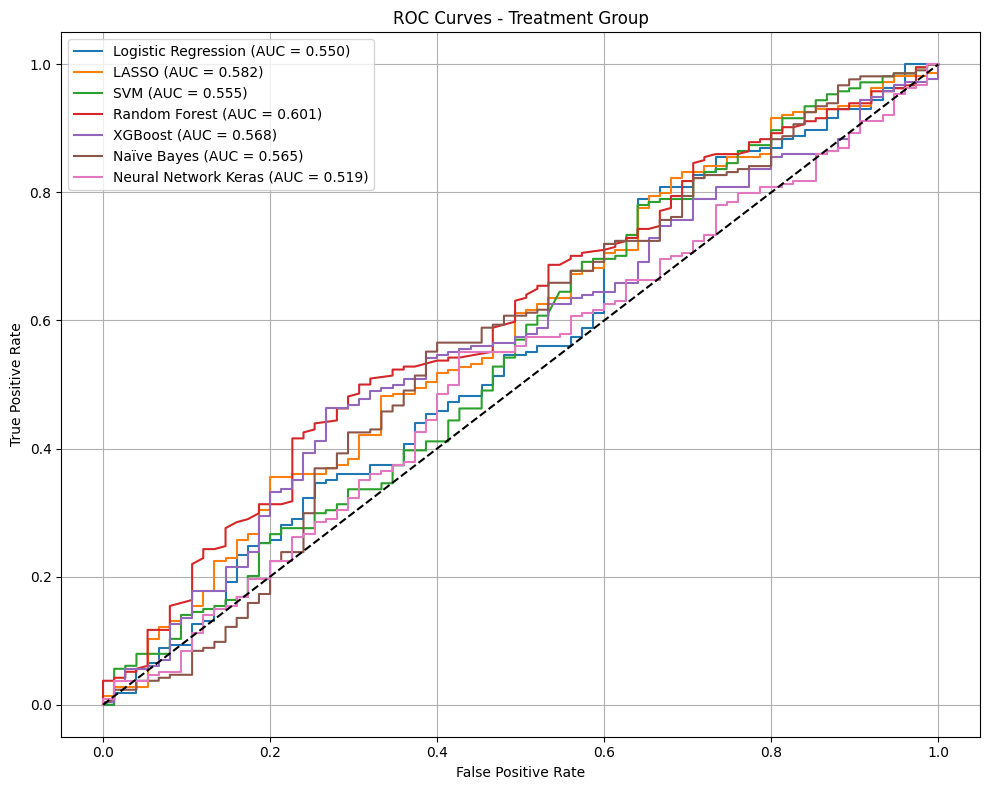

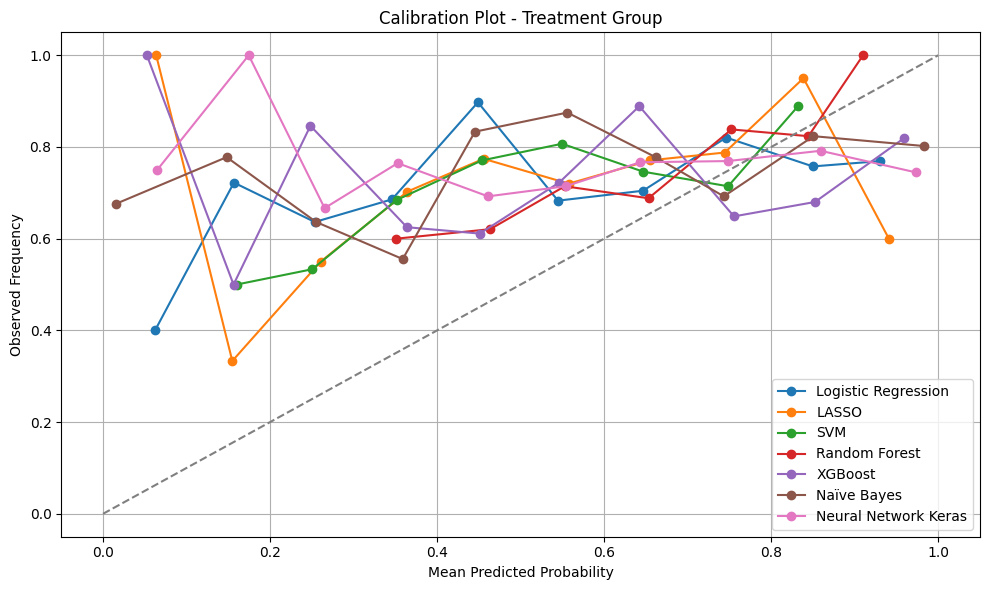

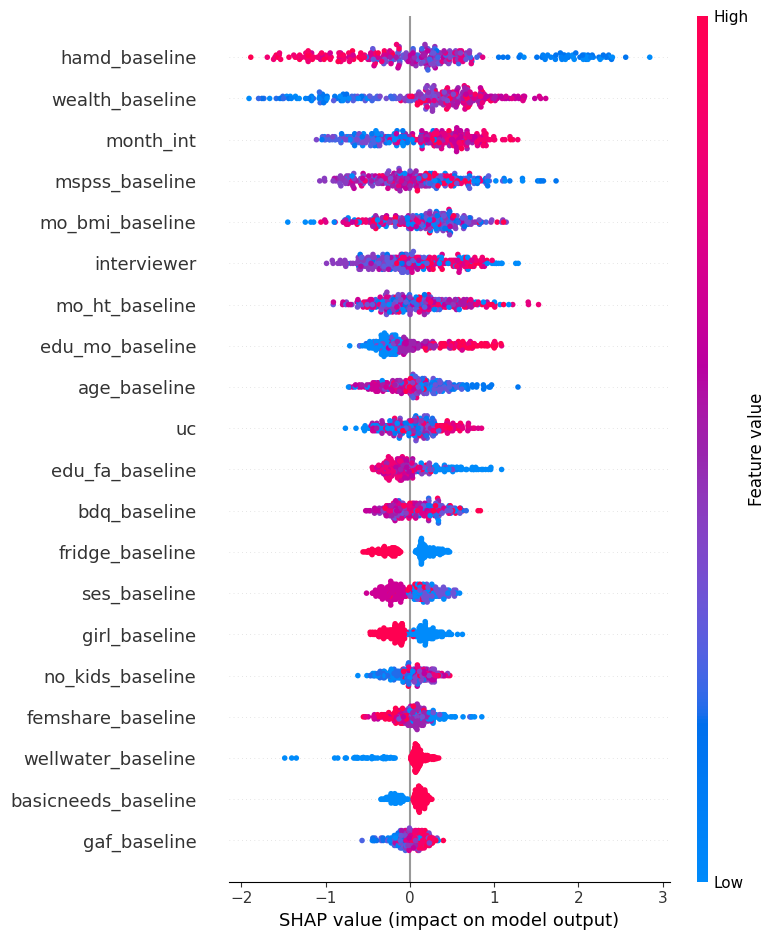

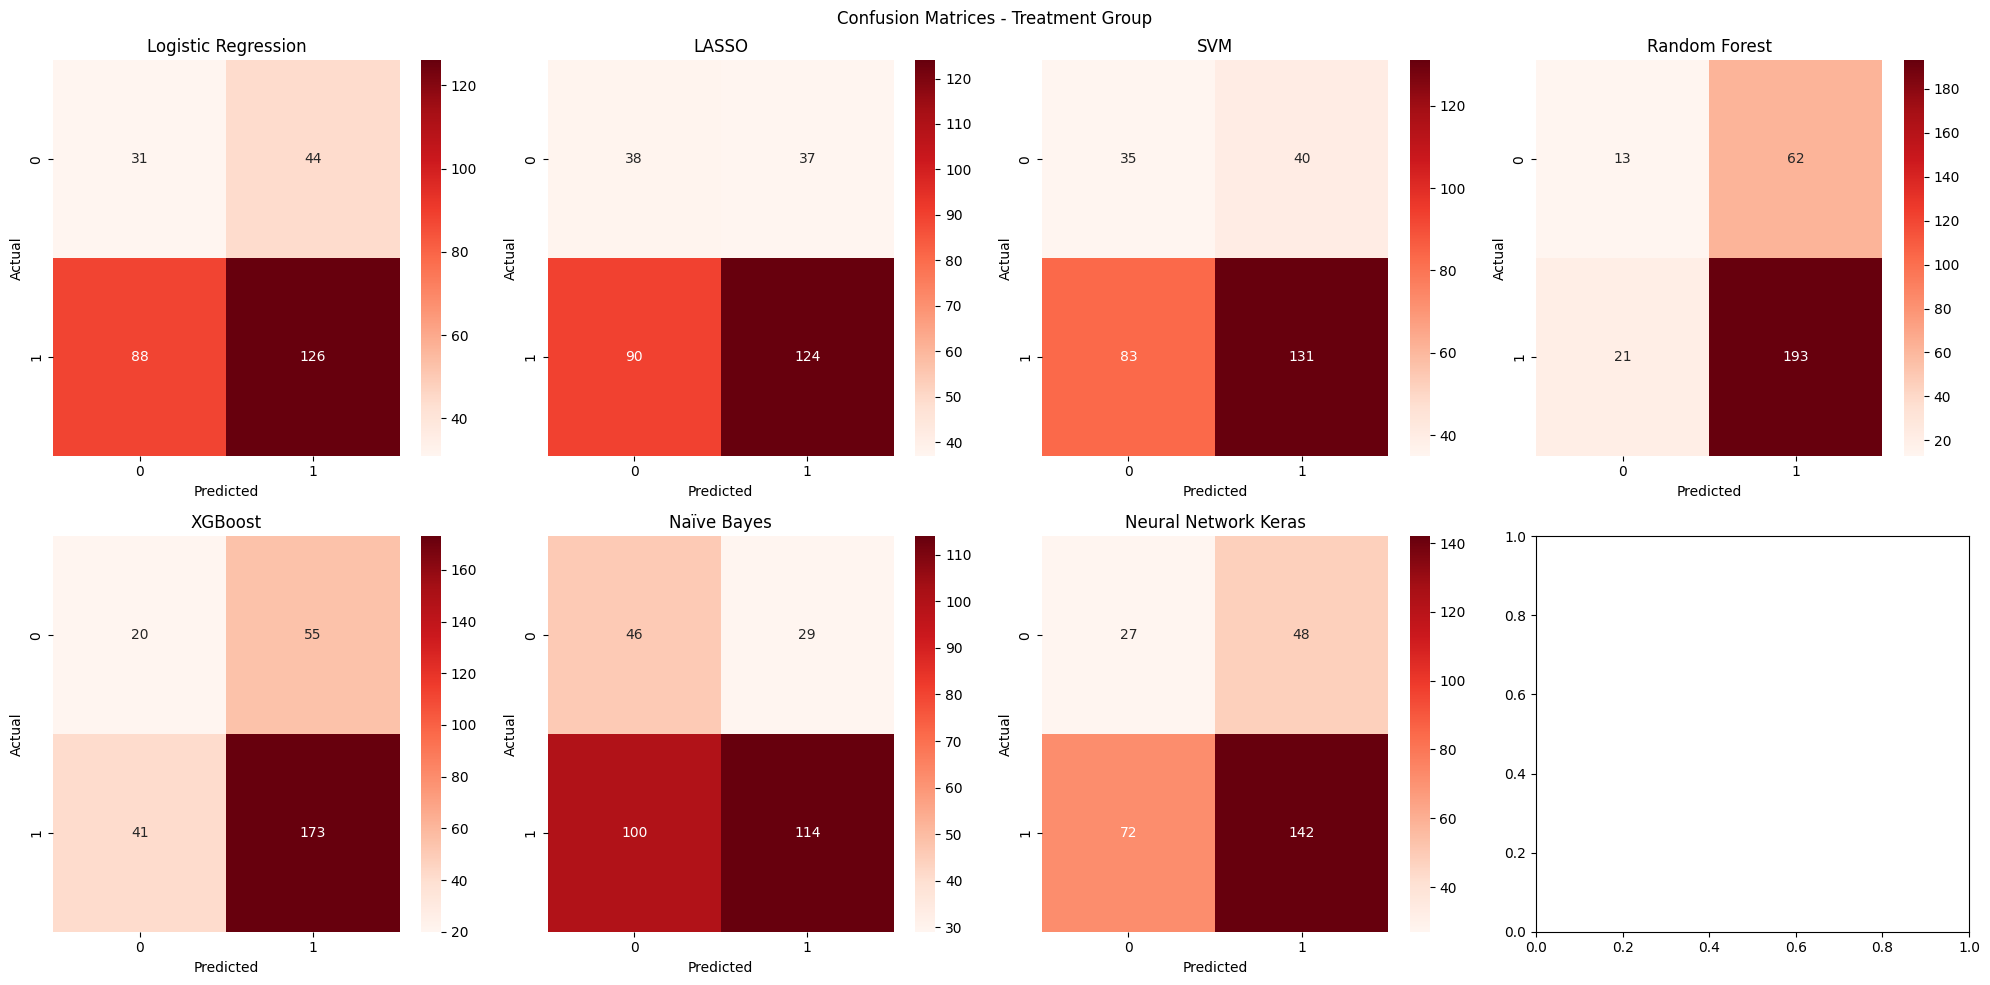

                  Model  Accuracy  Precision    Recall  F1 Score       AUC
3         Random Forest  0.712803   0.756863  0.901869  0.823028  0.602946
1                 LASSO  0.560554   0.770186  0.579439  0.661333  0.588040
4               XGBoost  0.667820   0.758772  0.808411  0.782805  0.582104
5           Naïve Bayes  0.553633   0.797203  0.532710  0.638655  0.574751
2                   SVM  0.574394   0.766082  0.612150  0.680519  0.554876
0   Logistic Regression  0.543253   0.741176  0.588785  0.656250  0.548143
6  Neural Network Keras  0.584775   0.747368  0.663551  0.702970  0.518117


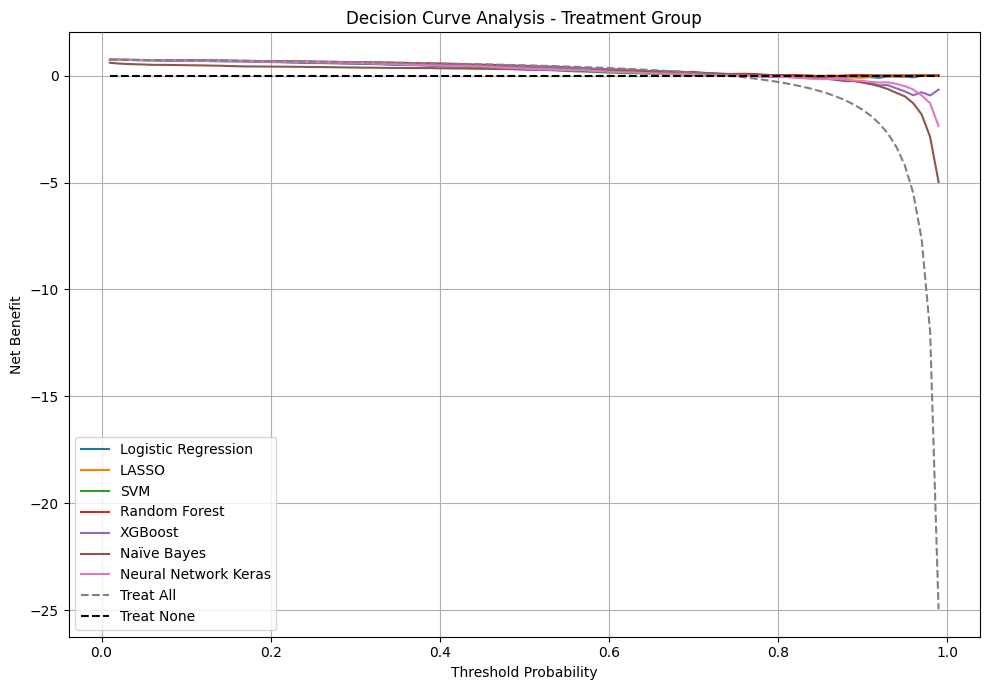


Training Neural Network with manual CV...
Fold 1...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Fold 2...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Fold 3...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 4...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 5...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


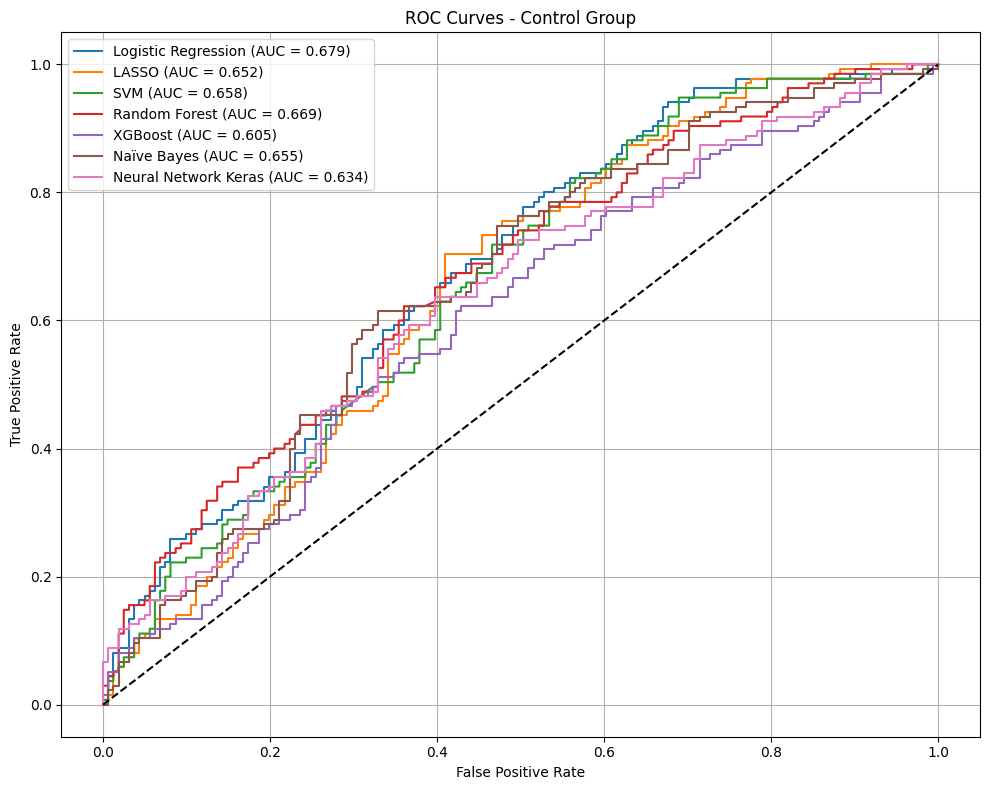

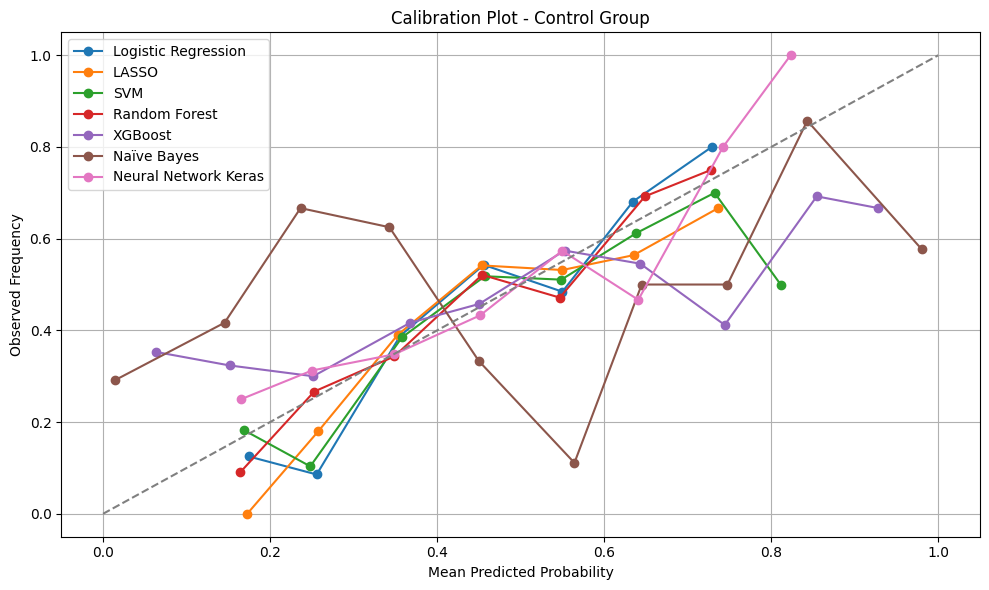

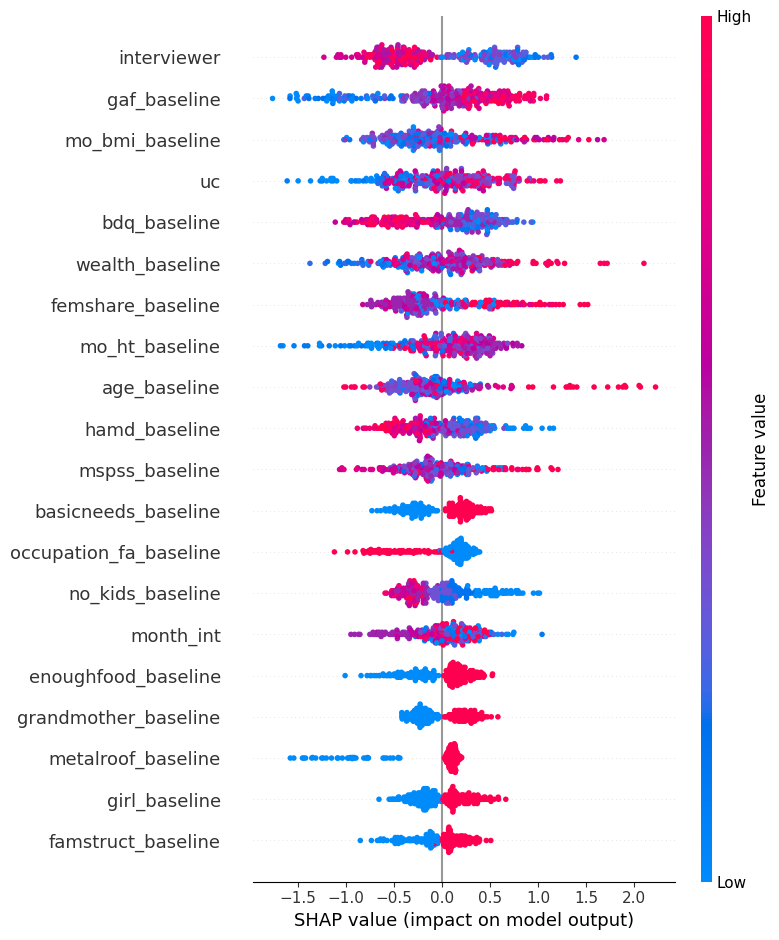

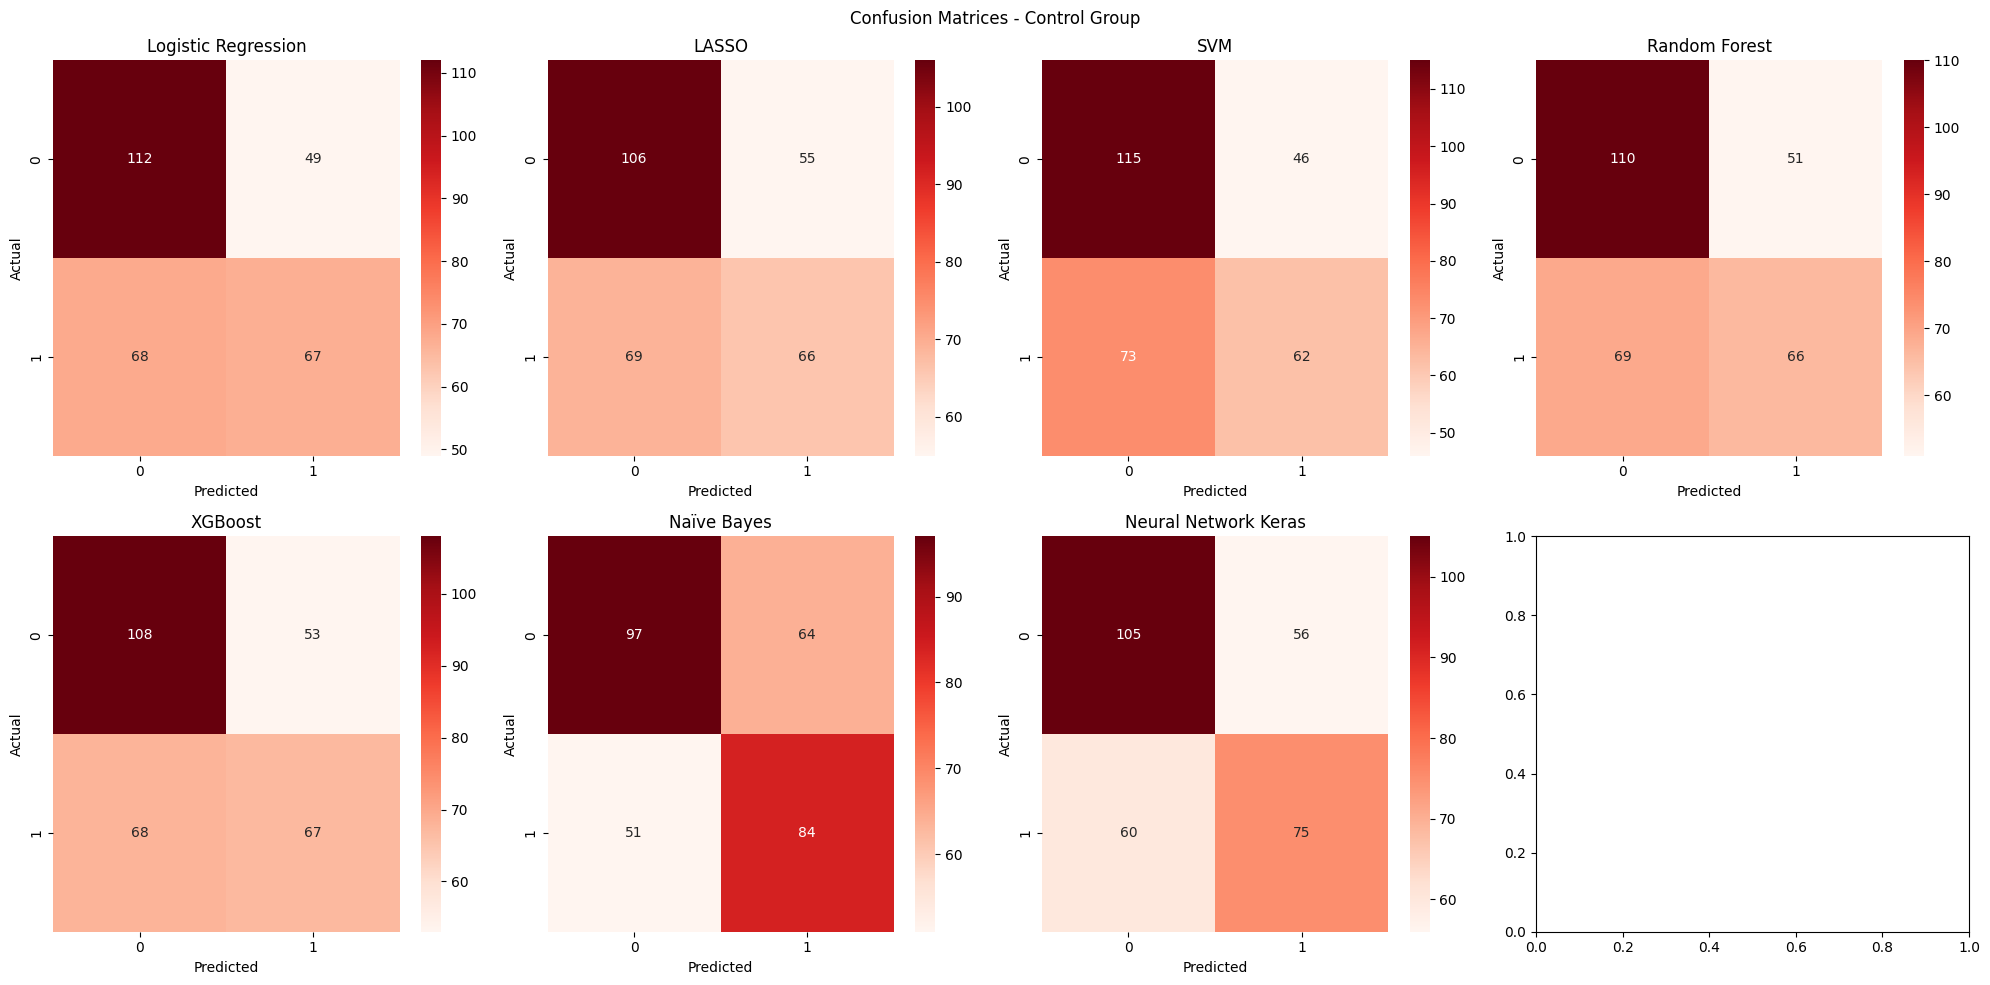

                  Model  Accuracy  Precision    Recall  F1 Score       AUC
0   Logistic Regression  0.604730   0.577586  0.496296  0.533865  0.679223
3         Random Forest  0.594595   0.564103  0.488889  0.523810  0.675593
2                   SVM  0.597973   0.574074  0.459259  0.510288  0.672068
1                 LASSO  0.581081   0.545455  0.488889  0.515625  0.662767
5           Naïve Bayes  0.611486   0.567568  0.622222  0.593640  0.657106
6  Neural Network Keras  0.608108   0.572519  0.555556  0.563910  0.644297
4               XGBoost  0.591216   0.558333  0.496296  0.525490  0.622447


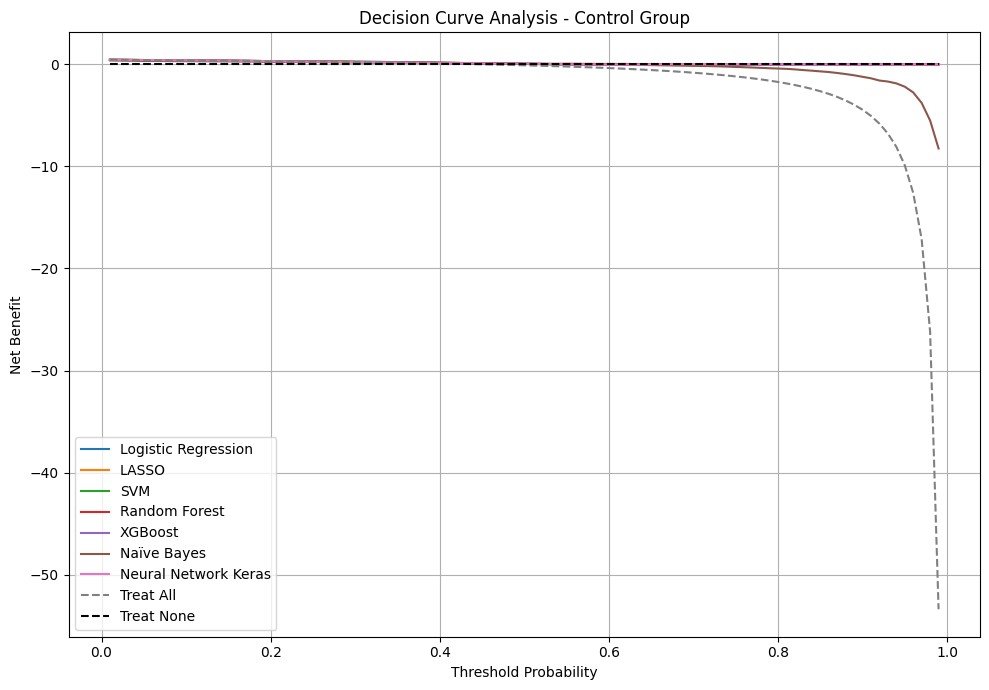

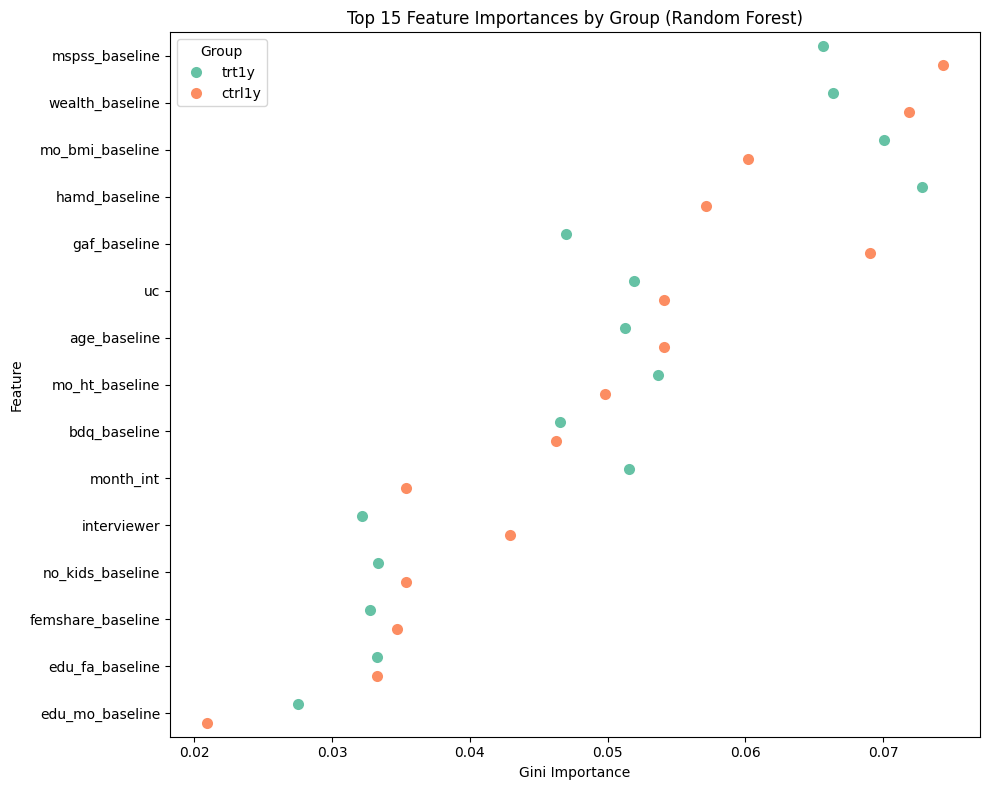

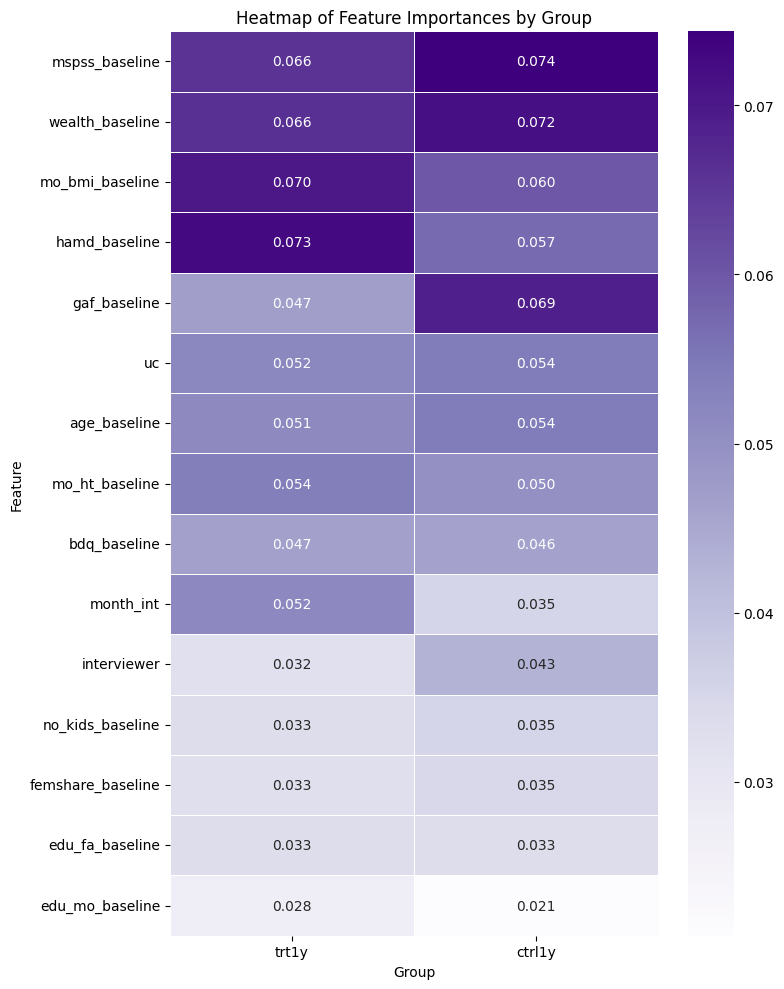

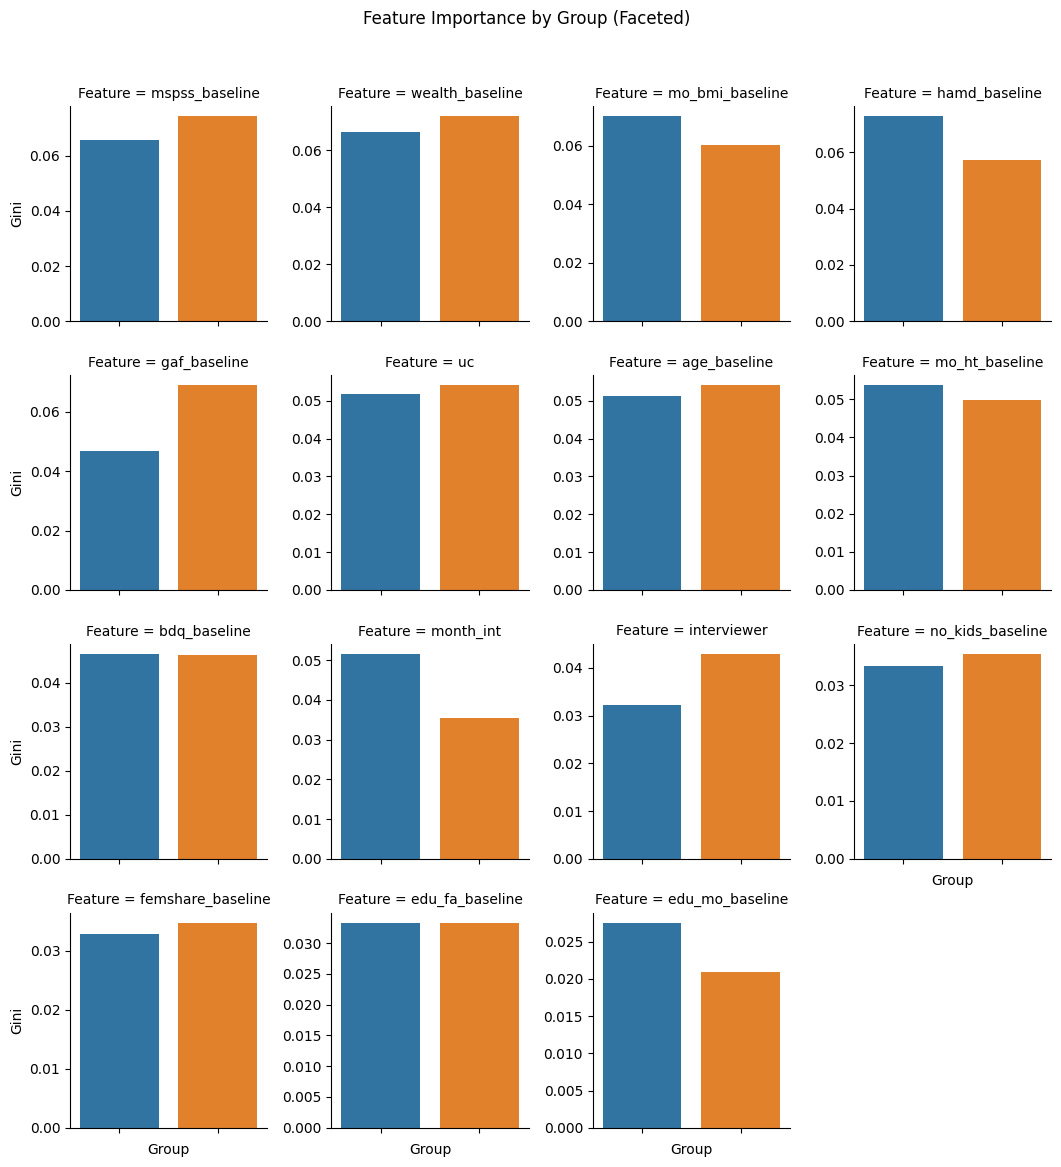

In [ ]:
# Remission at 6 months - wide dataset

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import shap

######## Remission at 6 months - wide dataset

# Data prep
exclude_outcomes = ["depindex_0", "depindex_0", "depindex_0_f"]

#### Treatment group - 6 months data
# Filter for treatment group and encode relapse outcome
# Note: 'treat' column indicates treatment group (1 for treatment, 0 for control) 
complete_data_trt = complete_data_6m[complete_data_6m['treat'] == 1].copy()
complete_data_trt['remission_6mo'] = LabelEncoder().fit_transform(complete_data_trt['remission_6mo'])
complete_data_trt.drop(columns=exclude_outcomes + ['treat'], inplace=True)

predictor_names = complete_data_trt.columns.drop(['newid', 'remission_6mo'])
X = complete_data_trt[predictor_names].values
y = complete_data_trt['remission_6mo'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Assess class imbalance
print("Original class distribution:")
print(pd.Series(y).value_counts())

# Nested CV setup
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Models and param grids
models_and_params = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "LASSO": (LogisticRegression(penalty='l1', solver='saga', max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "SVM": (SVC(kernel='linear', probability=True), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=123), {
        'n_estimators': [100, 500],
        'max_depth': [None, 5, 10]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    "Naïve Bayes": (GaussianNB(), {})
}

# Extract feature importance for RF
rf_model_trt = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=123)
rf_model_trt.fit(X, y)
rf_importances_trt = rf_model_trt.feature_importances_
rf_importance_df_trt = pd.DataFrame({
    'Feature': predictor_names,
    'trt1y': rf_importances_trt
})


# Nested CV Loop with SMOTE for Sklearn Models
performance_data = []
preds_all = {}
probs_all = {}

for name, (model, param_grid) in models_and_params.items():
    grid = GridSearchCV(model, param_grid, cv=inner_cv, scoring='roc_auc', error_score='raise')
    outer_scores = []
    y_probs = np.zeros_like(y, dtype=float)
    y_preds = np.zeros_like(y, dtype=int)
    
    # Outer CV loop
    for train_idx, test_idx in outer_cv.split(X, y):
        # Split training and testing data
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        
        # Apply SMOTE on the training data only
        sm = SMOTE(random_state=123)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
        
        # Fit grid search on the resampled training set
        grid.fit(X_train_res, y_train_res)
        
        # Predict probabilities on the original test set
        probas_ = grid.predict_proba(X_test)[:, 1]
        preds_ = (probas_ > 0.5).astype(int)
        
        # Store predictions in the appropriate test indices
        y_probs[test_idx] = probas_
        y_preds[test_idx] = preds_
        outer_scores.append(roc_auc_score(y_test, probas_))
    
    performance_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y, y_preds),
        "Precision": precision_score(y, y_preds),
        "Recall": recall_score(y, y_preds),
        "F1 Score": f1_score(y, y_preds),
        "AUC": np.mean(outer_scores)
    })
    preds_all[name] = y_preds
    probs_all[name] = y_probs


# Nested CV Loop with SMOTE for Keras Model
print("\nTraining Neural Network with manual CV (with SMOTE)...")
nn_outer_scores = []
nn_y_probs = np.zeros_like(y, dtype=float)
nn_y_preds = np.zeros_like(y, dtype=int)

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    print(f"Fold {fold}...")
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # Apply SMOTE on training data only
    sm = SMOTE(random_state=123)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    # Define and compile the Keras model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the resampled data
    model.fit(
        X_train_res, y_train_res,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )
    
    # Evaluate on the original test set
    y_pred_prob = model.predict(X_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    nn_y_probs[test_idx] = y_pred_prob
    nn_y_preds[test_idx] = y_pred
    nn_outer_scores.append(roc_auc_score(y_test, y_pred_prob))

# Decision curve analysis function
def decision_curve_analysis(y_true, y_prob, thresholds=np.linspace(0.01, 0.99, 99)):
    n = len(y_true)
    dca_data = []

    for pt in thresholds:
        preds = (y_prob >= pt).astype(int)
        tp = np.sum((preds == 1) & (y_true == 1))
        fp = np.sum((preds == 1) & (y_true == 0))

        net_benefit = (tp / n) - (fp / n) * (pt / (1 - pt))
        dca_data.append({
            'threshold': pt,
            'net_benefit': net_benefit
        })

    return pd.DataFrame(dca_data)

# Performance metrics
# Add Keras model performance to results
performance_data.append({
    "Model": "Neural Network Keras",
    "Accuracy": accuracy_score(y, nn_y_preds),
    "Precision": precision_score(y, nn_y_preds),
    "Recall": recall_score(y, nn_y_preds),
    "F1 Score": f1_score(y, nn_y_preds),
    "AUC": np.mean(nn_outer_scores)
})
preds_all["Neural Network Keras"] = nn_y_preds
probs_all["Neural Network Keras"] = nn_y_probs

# Compile performance results
performance_df = pd.DataFrame(performance_data)
print(performance_df.sort_values(by="AUC", ascending=False))

# ROC Curves
plt.figure(figsize=(10, 8))
for name in probs_all:
    fpr, tpr, _ = roc_curve(y, probs_all[name])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y, probs_all[name]):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Treatment Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Calibration Plots
plt.figure(figsize=(10, 6))
for name in probs_all:
    prob_true, prob_pred = calibration_curve(y, probs_all[name], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Plot - Treatment Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# SHAP for best model (e.g., XGBoost)
explainer = shap.Explainer(models_and_params['XGBoost'][0].fit(X, y))
shap_values = explainer(X)
shap.summary_plot(shap_values, features=X, feature_names=predictor_names)

# Confusion Matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for idx, name in enumerate(preds_all):
    cm = confusion_matrix(y, preds_all[name])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Reds')
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
plt.suptitle("Confusion Matrices - Treatment Group")
plt.tight_layout()
plt.show()

# Show performance
print(performance_df.sort_values(by="AUC", ascending=False))


# Decision Curve Analysis
plt.figure(figsize=(10, 7))

# Plot net benefit for each model
for name, probs in probs_all.items():
    dca_df = decision_curve_analysis(y, probs)
    plt.plot(dca_df['threshold'], dca_df['net_benefit'], label=name)

# Add "Treat All" and "Treat None" strategies
thresholds = np.linspace(0.01, 0.99, 99)
treat_all_nb = [np.mean(y) - (1 - np.mean(y)) * (pt / (1 - pt)) for pt in thresholds]
treat_none_nb = [0] * len(thresholds)

plt.plot(thresholds, treat_all_nb, linestyle='--', color='gray', label='Treat All')
plt.plot(thresholds, treat_none_nb, linestyle='--', color='black', label='Treat None')

plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.title("Decision Curve Analysis - Treatment Group")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





#### Control group - 6 months data
# Filter for control group and encode remission outcome
# Note: 'treat' column indicates treatment group (1 for treatment, 0 for control) 
complete_data_ctrl = complete_data_6m[complete_data_6m['treat'] == 0].copy()
complete_data_ctrl['remission_6mo'] = LabelEncoder().fit_transform(complete_data_ctrl['remission_6mo'])
complete_data_ctrl.drop(columns=exclude_outcomes + ['treat'], inplace=True)

predictor_names = complete_data_ctrl.columns.drop(['newid', 'remission_6mo'])
X = complete_data_ctrl[predictor_names].values
y = complete_data_ctrl['remission_6mo'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Assess class imbalance
print("Original class distribution:")
print(pd.Series(y).value_counts())

# Nested CV setup
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Models and param grids
models_and_params = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "LASSO": (LogisticRegression(penalty='l1', solver='saga', max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "SVM": (SVC(kernel='linear', probability=True), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=123), {
        'n_estimators': [100, 500],
        'max_depth': [None, 5, 10]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    "Naïve Bayes": (GaussianNB(), {})
}

# Extract feature importance for RF
rf_model_ctrl = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=123)
rf_model_ctrl.fit(X, y)
rf_importances_ctrl = rf_model_ctrl.feature_importances_
rf_importance_df_ctrl = pd.DataFrame({
    'Feature': predictor_names,
    'ctrl1y': rf_importances_ctrl
})

# Nested CV Loop with SMOTE for Sklearn Models
performance_data = []
preds_all = {}
probs_all = {}

for name, (model, param_grid) in models_and_params.items():
    grid = GridSearchCV(model, param_grid, cv=inner_cv, scoring='roc_auc', error_score='raise')
    outer_scores = []
    y_probs = np.zeros_like(y, dtype=float)
    y_preds = np.zeros_like(y, dtype=int)
    
    # Outer CV loop
    for train_idx, test_idx in outer_cv.split(X, y):
        # Split training and testing data
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        
        # Apply SMOTE on the training data only
        sm = SMOTE(random_state=123)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
        
        # Fit grid search on the resampled training set
        grid.fit(X_train_res, y_train_res)
        
        # Predict probabilities on the original test set
        probas_ = grid.predict_proba(X_test)[:, 1]
        preds_ = (probas_ > 0.5).astype(int)
        
        # Store predictions in the appropriate test indices
        y_probs[test_idx] = probas_
        y_preds[test_idx] = preds_
        outer_scores.append(roc_auc_score(y_test, probas_))
    
    performance_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y, y_preds),
        "Precision": precision_score(y, y_preds),
        "Recall": recall_score(y, y_preds),
        "F1 Score": f1_score(y, y_preds),
        "AUC": np.mean(outer_scores)
    })
    preds_all[name] = y_preds
    probs_all[name] = y_probs


# Nested CV Loop with SMOTE for Keras Model
print("\nTraining Neural Network with manual CV (with SMOTE)...")
nn_outer_scores = []
nn_y_probs = np.zeros_like(y, dtype=float)
nn_y_preds = np.zeros_like(y, dtype=int)

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    print(f"Fold {fold}...")
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # Apply SMOTE on training data only
    sm = SMOTE(random_state=123)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    # Define and compile the Keras model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the resampled data
    model.fit(
        X_train_res, y_train_res,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )
    
    # Evaluate on the original test set
    y_pred_prob = model.predict(X_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    nn_y_probs[test_idx] = y_pred_prob
    nn_y_preds[test_idx] = y_pred
    nn_outer_scores.append(roc_auc_score(y_test, y_pred_prob))

# Decision curve analysis function
def decision_curve_analysis(y_true, y_prob, thresholds=np.linspace(0.01, 0.99, 99)):
    n = len(y_true)
    dca_data = []

    for pt in thresholds:
        preds = (y_prob >= pt).astype(int)
        tp = np.sum((preds == 1) & (y_true == 1))
        fp = np.sum((preds == 1) & (y_true == 0))

        net_benefit = (tp / n) - (fp / n) * (pt / (1 - pt))
        dca_data.append({
            'threshold': pt,
            'net_benefit': net_benefit
        })

    return pd.DataFrame(dca_data)

# Performance metrics
# Add Keras model performance to results
performance_data.append({
    "Model": "Neural Network Keras",
    "Accuracy": accuracy_score(y, nn_y_preds),
    "Precision": precision_score(y, nn_y_preds),
    "Recall": recall_score(y, nn_y_preds),
    "F1 Score": f1_score(y, nn_y_preds),
    "AUC": np.mean(nn_outer_scores)
})
preds_all["Neural Network Keras"] = nn_y_preds
probs_all["Neural Network Keras"] = nn_y_probs

# Compile performance results
performance_df = pd.DataFrame(performance_data)
print(performance_df.sort_values(by="AUC", ascending=False))

# ROC Curves
plt.figure(figsize=(10, 8))
for name in probs_all:
    fpr, tpr, _ = roc_curve(y, probs_all[name])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y, probs_all[name]):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Control Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Calibration Plots
plt.figure(figsize=(10, 6))
for name in probs_all:
    prob_true, prob_pred = calibration_curve(y, probs_all[name], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Plot - Control Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# SHAP for best model (e.g., XGBoost)
explainer = shap.Explainer(models_and_params['XGBoost'][0].fit(X, y))
shap_values = explainer(X)
shap.summary_plot(shap_values, features=X, feature_names=predictor_names)

# Confusion Matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for idx, name in enumerate(preds_all):
    cm = confusion_matrix(y, preds_all[name])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Reds')
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
plt.suptitle("Confusion Matrices - Control Group")
plt.tight_layout()
plt.show()

# Show performance
print(performance_df.sort_values(by="AUC", ascending=False))


# Decision Curve Analysis
plt.figure(figsize=(10, 7))

# Plot net benefit for each model
for name, probs in probs_all.items():
    dca_df = decision_curve_analysis(y, probs)
    plt.plot(dca_df['threshold'], dca_df['net_benefit'], label=name)

# Add "Treat All" and "Treat None" strategies
thresholds = np.linspace(0.01, 0.99, 99)
treat_all_nb = [np.mean(y) - (1 - np.mean(y)) * (pt / (1 - pt)) for pt in thresholds]
treat_none_nb = [0] * len(thresholds)

plt.plot(thresholds, treat_all_nb, linestyle='--', color='gray', label='Treat All')
plt.plot(thresholds, treat_none_nb, linestyle='--', color='black', label='Treat None')

plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.title("Decision Curve Analysis - Control Group")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# ---------- Feature importance plots ---------- #

# Merge treatment and control importance
rf_importance_combined = pd.merge(rf_importance_df_trt, rf_importance_df_ctrl, on="Feature")

# Average importance and select top 15
rf_importance_combined['avg_gini'] = (rf_importance_combined['trt1y'] + rf_importance_combined['ctrl1y']) / 2
rf_importance_top15 = rf_importance_combined.sort_values(by='avg_gini', ascending=False).head(15)

# Long format for plotting
rf_importance_long = pd.melt(
    rf_importance_top15.drop(columns='avg_gini'),
    id_vars='Feature',
    var_name='Group',
    value_name='Gini'
)

# Dot plot
plt.figure(figsize=(10, 8))
sns.stripplot(data=rf_importance_long, x='Gini', y='Feature', hue='Group', dodge=True, size=8, palette="Set2")
plt.title("Top 15 Feature Importances by Group (Random Forest)")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

# Heat map
heatmap_data = rf_importance_top15.set_index('Feature')[['trt1y', 'ctrl1y']]
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, cmap='Purples', fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Feature Importances by Group")
plt.xlabel("Group")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Faceted bar chart
g = sns.catplot(
    data=rf_importance_long,
    x="Group", y="Gini", hue="Group",
    col="Feature", col_wrap=4,
    kind="bar", height=3, aspect=0.9, sharey=False
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Feature Importance by Group (Faceted)")
g.set_xticklabels(rotation=45)
plt.show()


Training Neural Network with manual CV...
Fold 1...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Fold 2...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Fold 3...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 4...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 5...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


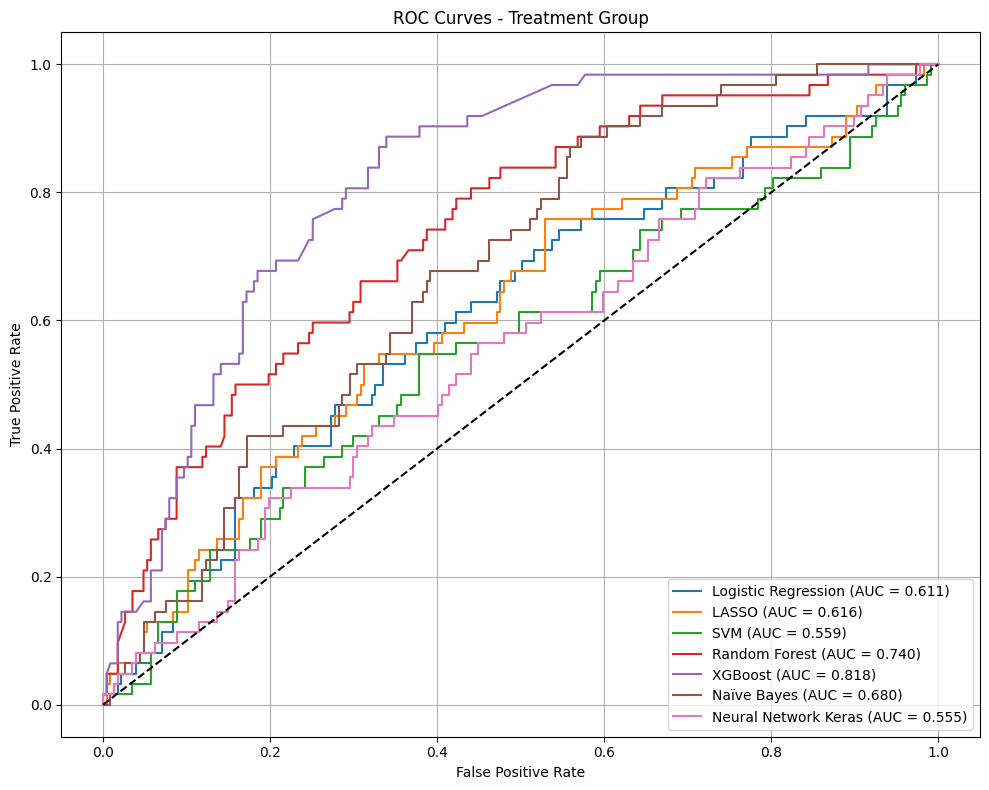

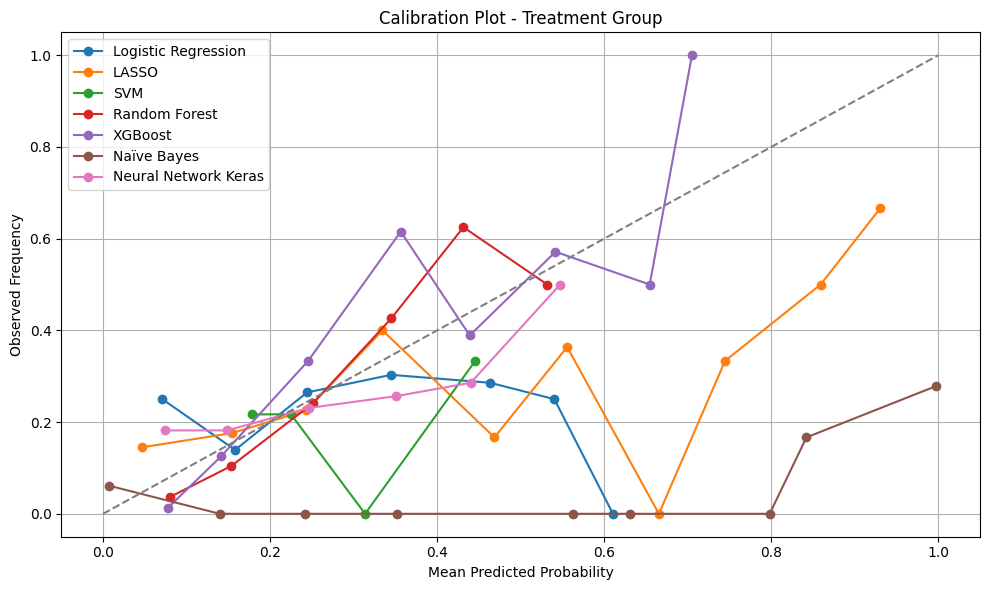

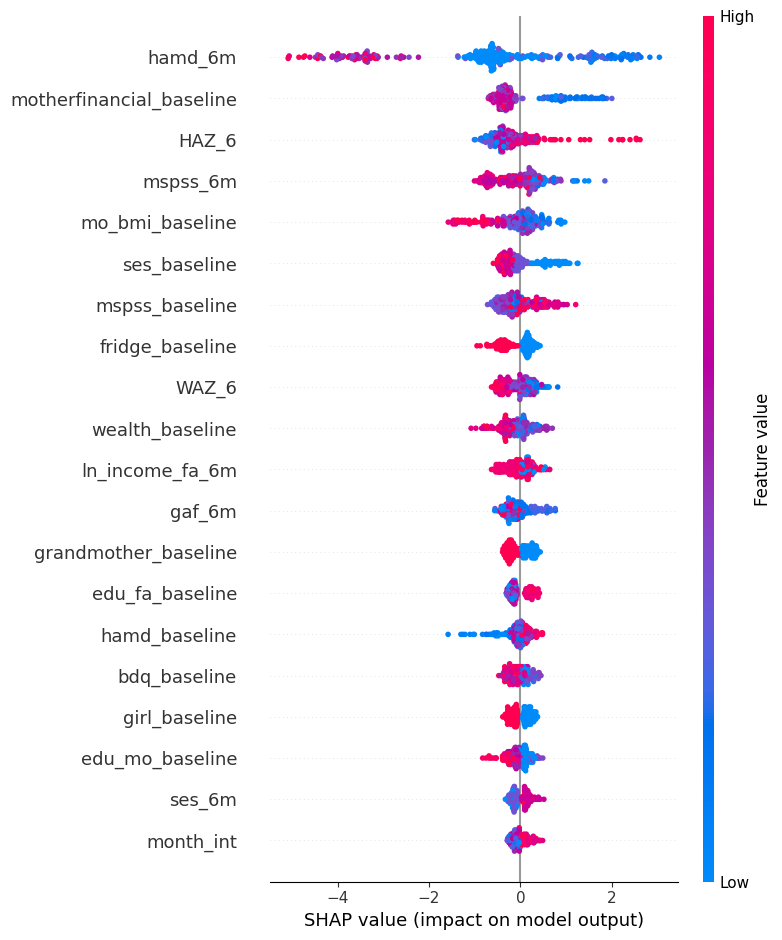

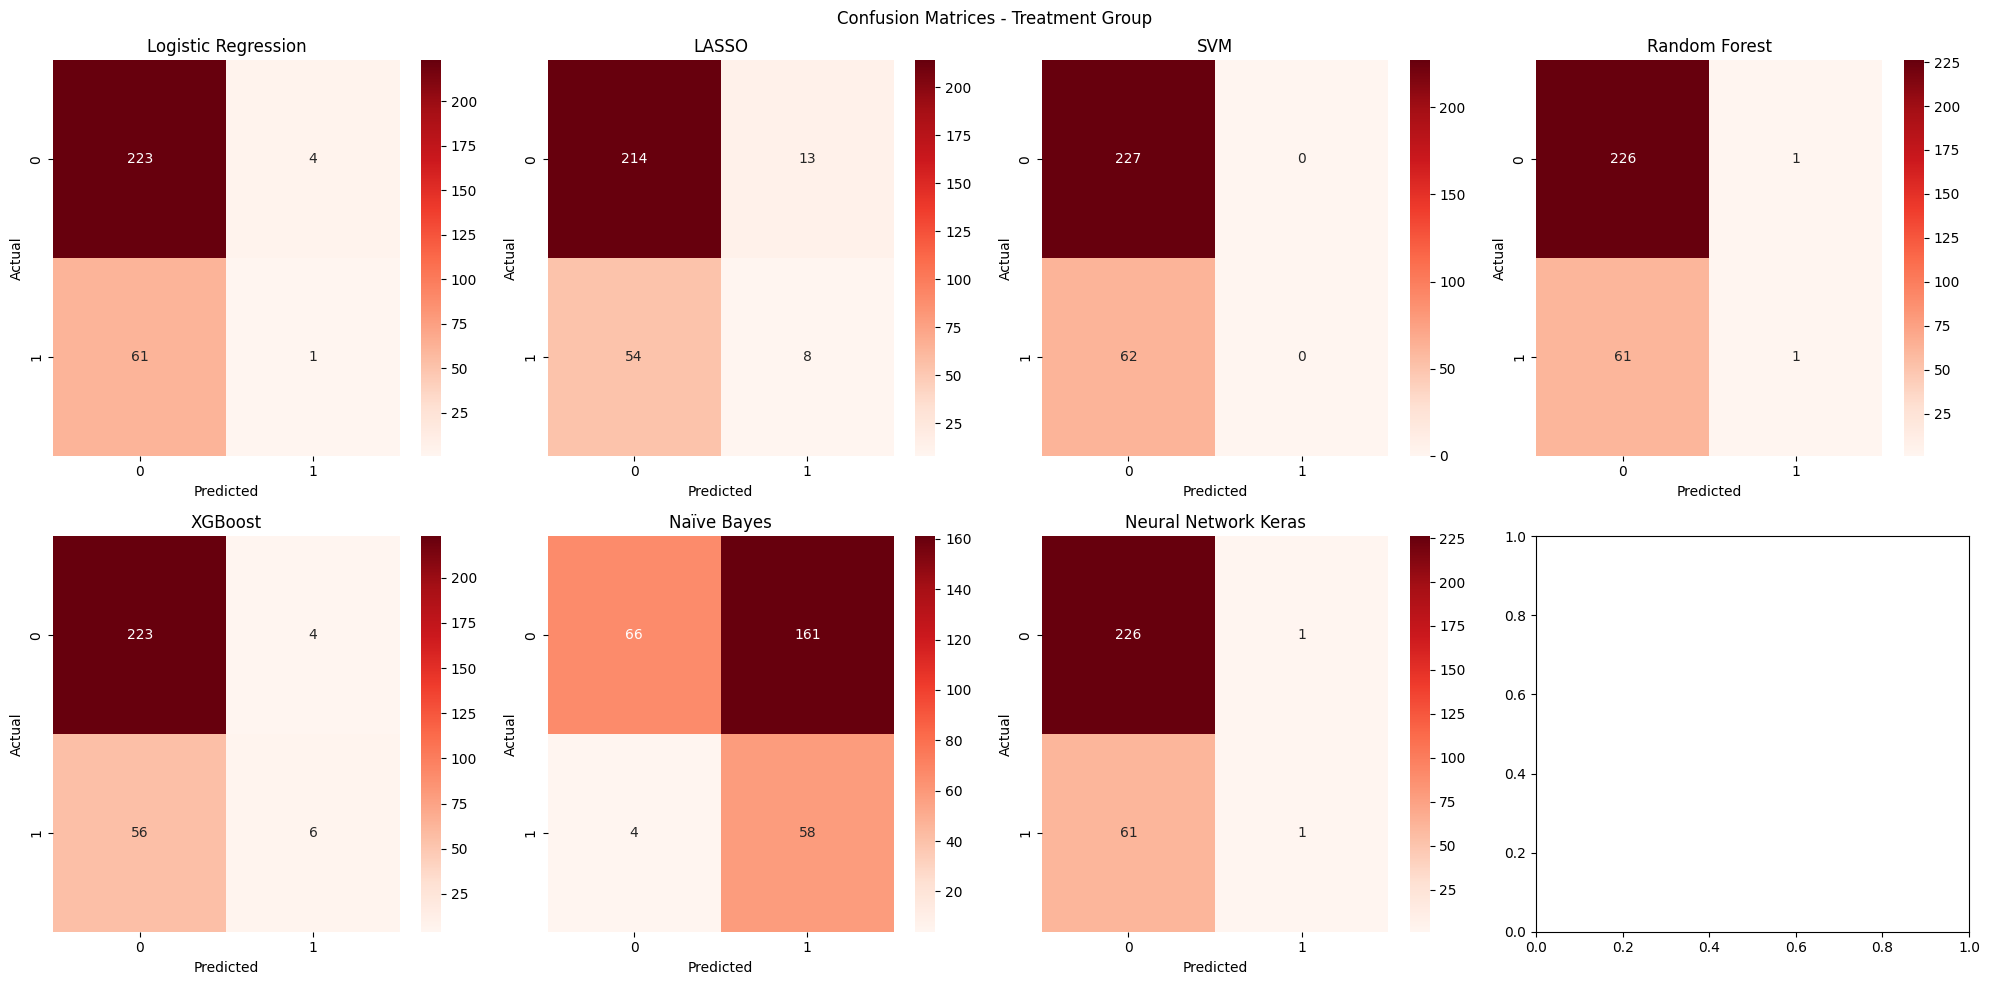

                  Model  Accuracy  Precision    Recall  F1 Score       AUC
4               XGBoost  0.792388   0.600000  0.096774  0.166667  0.822162
3         Random Forest  0.785467   0.500000  0.016129  0.031250  0.753000
5           Naïve Bayes  0.429066   0.264840  0.935484  0.412811  0.679171
0   Logistic Regression  0.775087   0.200000  0.016129  0.029851  0.628484
1                 LASSO  0.768166   0.380952  0.129032  0.192771  0.627089
2                   SVM  0.785467   0.000000  0.000000  0.000000  0.576892
6  Neural Network Keras  0.785467   0.500000  0.016129  0.031250  0.563990


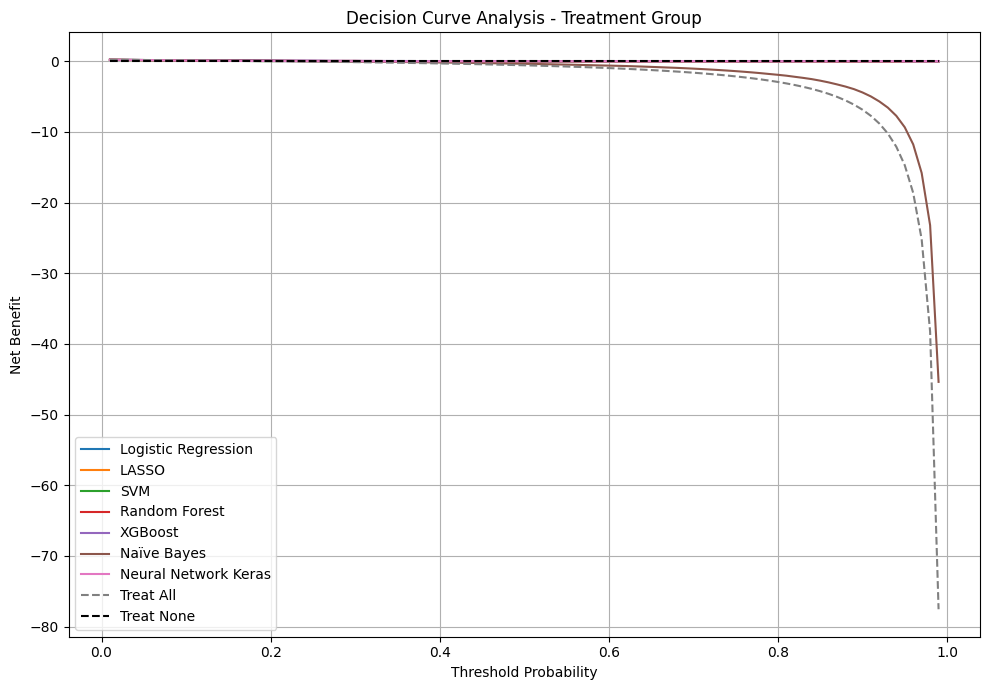


Training Neural Network with manual CV...
Fold 1...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 2...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 3...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 4...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 5...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


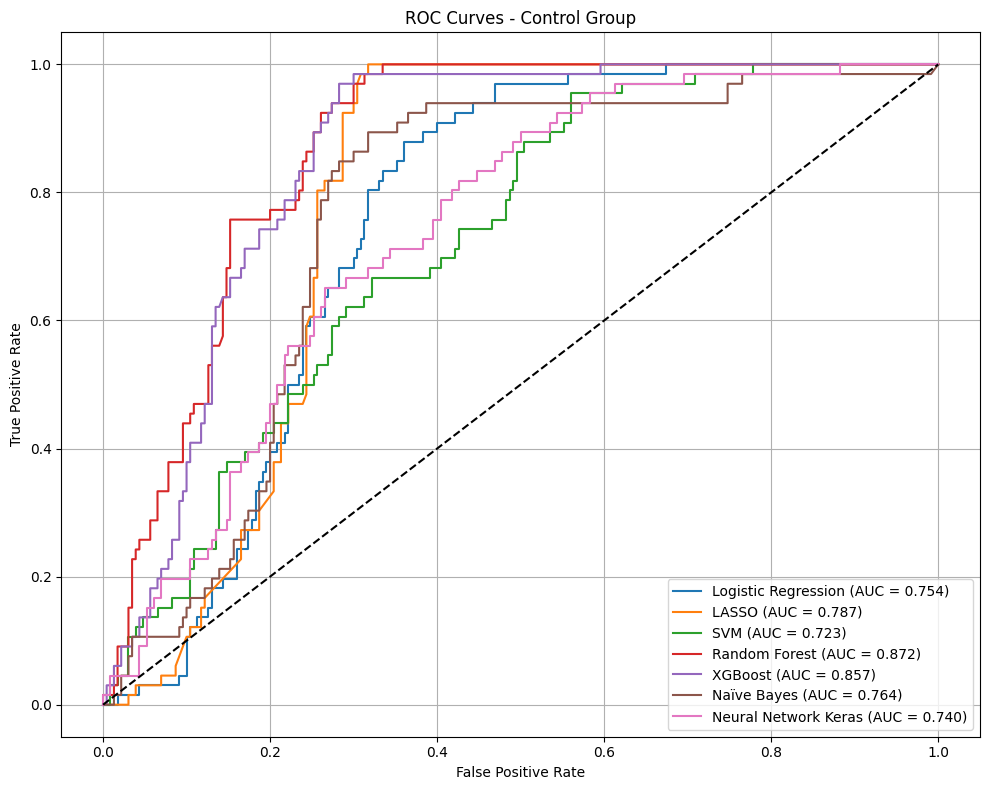

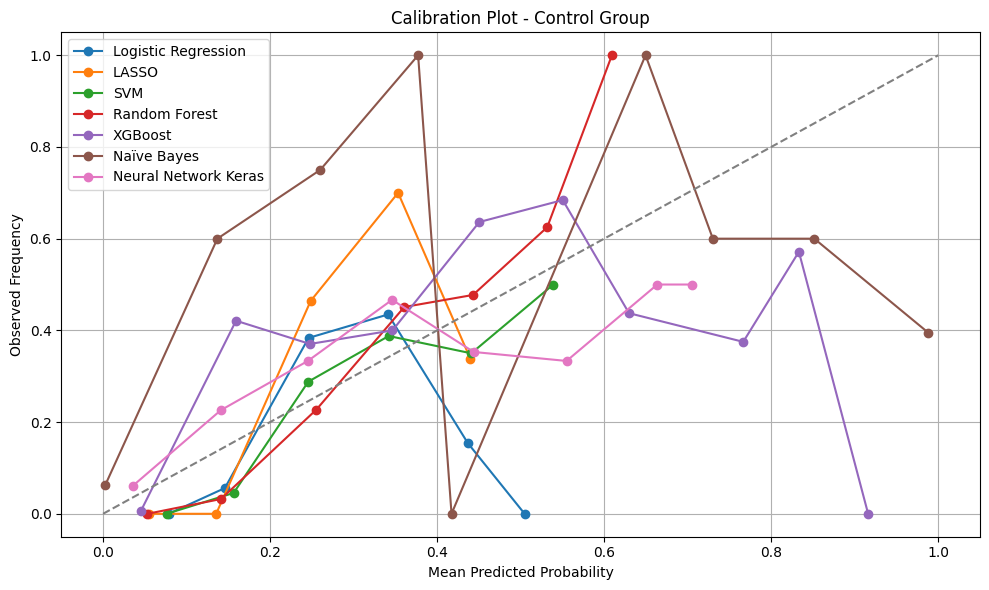

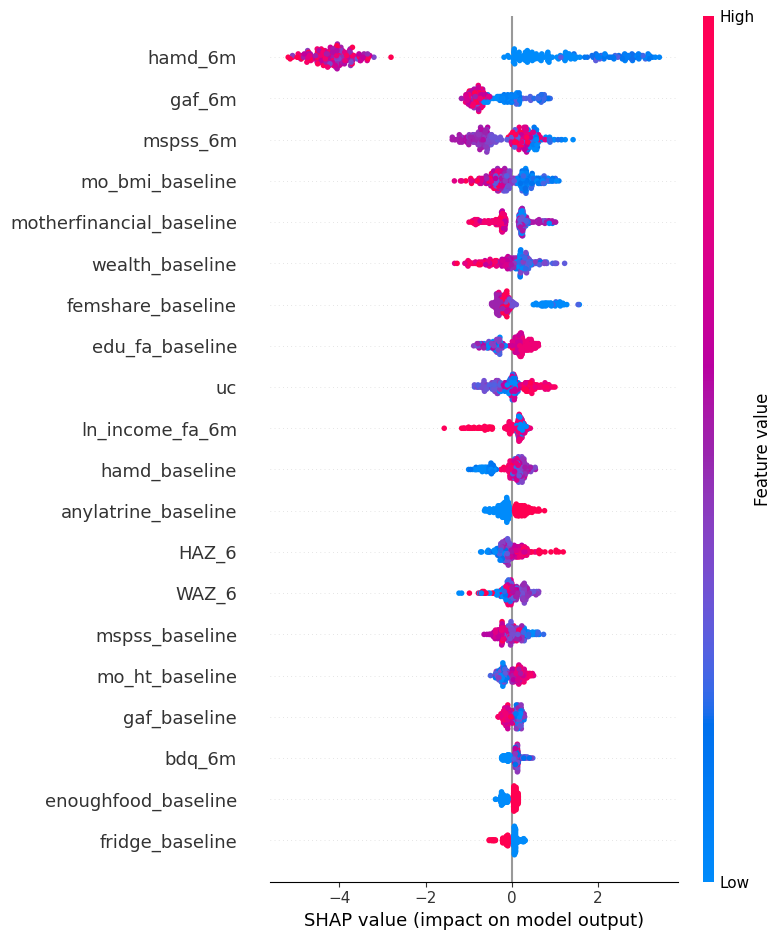

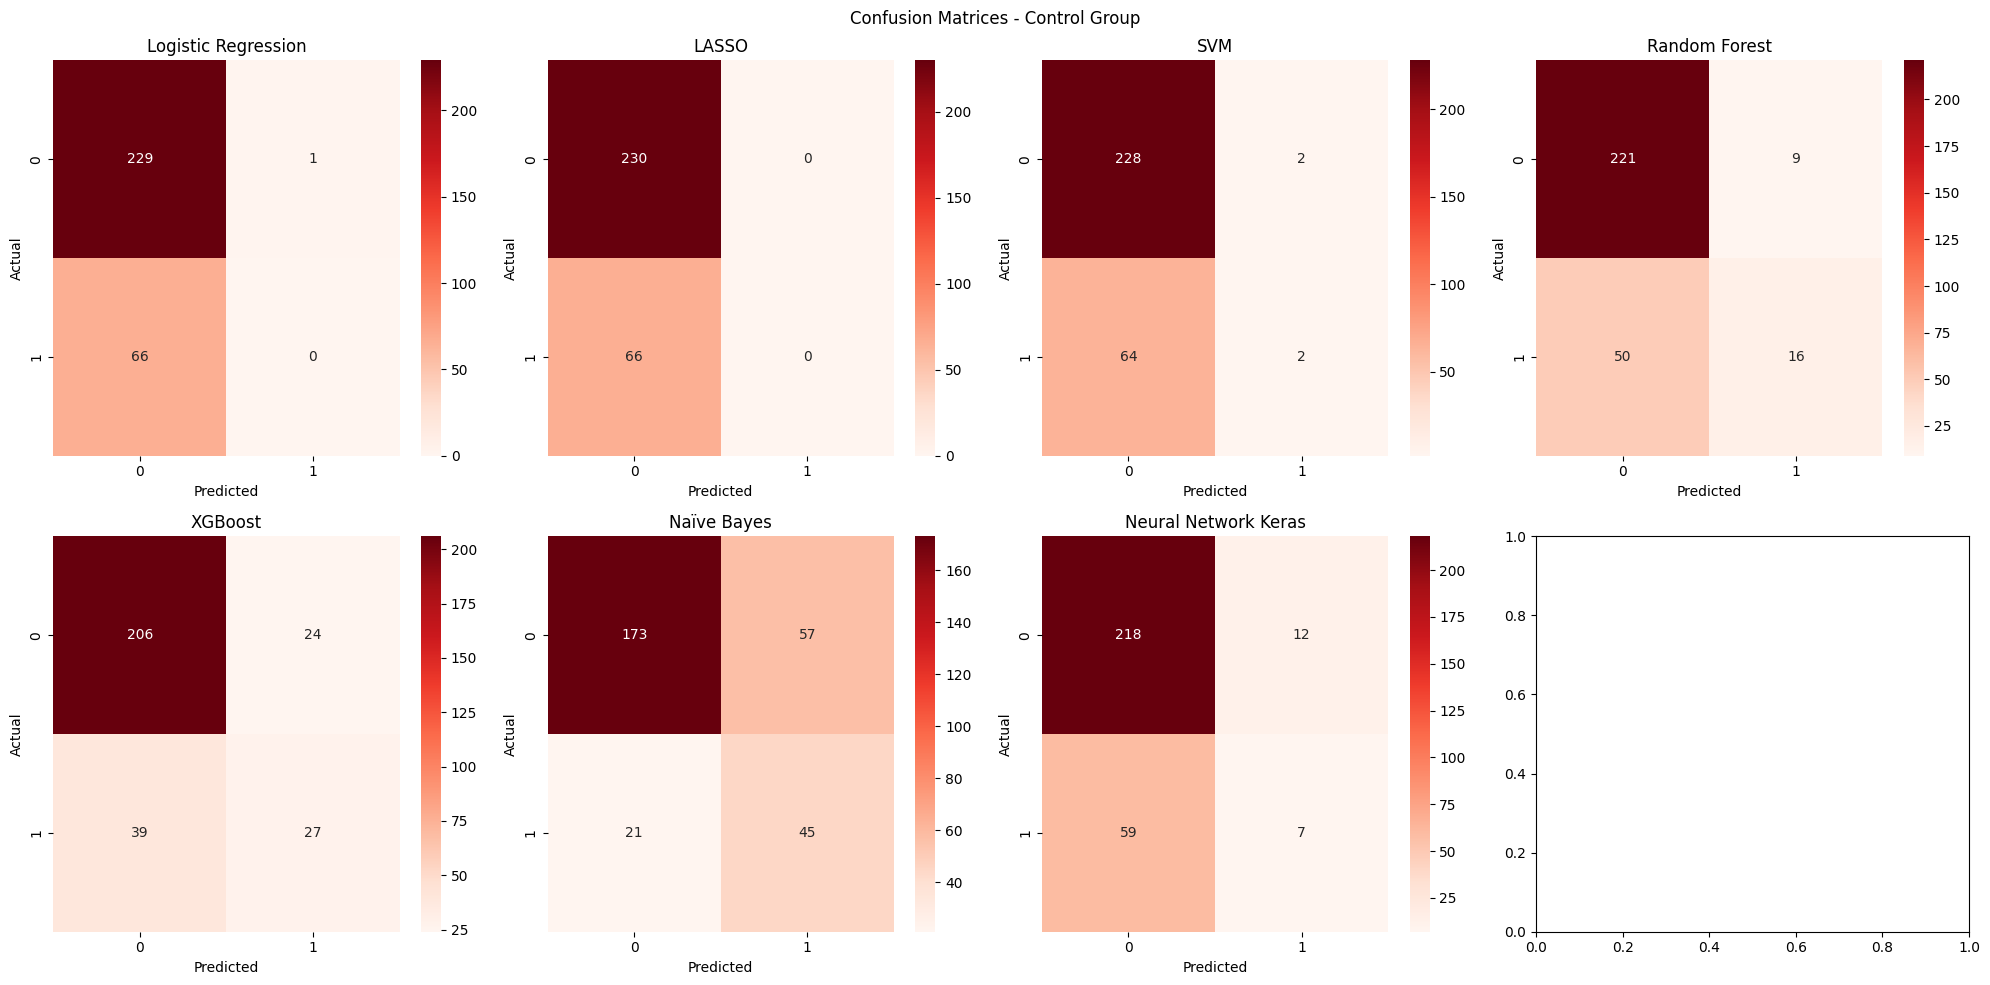

                  Model  Accuracy  Precision    Recall  F1 Score       AUC
4               XGBoost  0.787162   0.529412  0.409091  0.461538  0.868968
3         Random Forest  0.800676   0.640000  0.242424  0.351648  0.865886
1                 LASSO  0.777027   0.000000  0.000000  0.000000  0.791424
5           Naïve Bayes  0.736486   0.441176  0.681818  0.535714  0.765122
0   Logistic Regression  0.773649   0.000000  0.000000  0.000000  0.749570
6  Neural Network Keras  0.760135   0.368421  0.106061  0.164706  0.731438
2                   SVM  0.777027   0.500000  0.030303  0.057143  0.729169


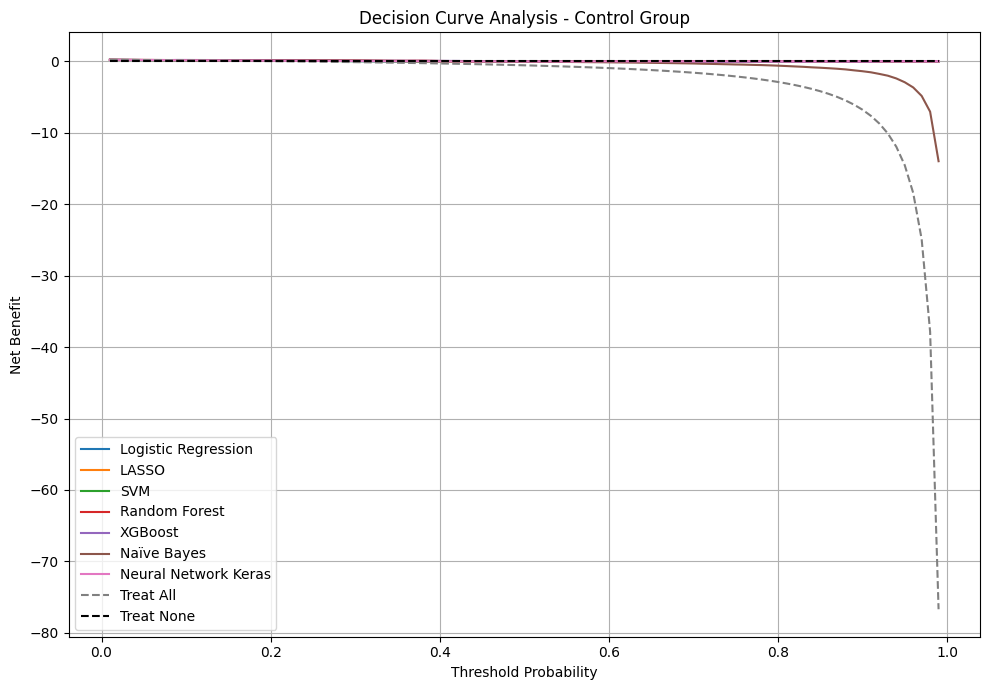

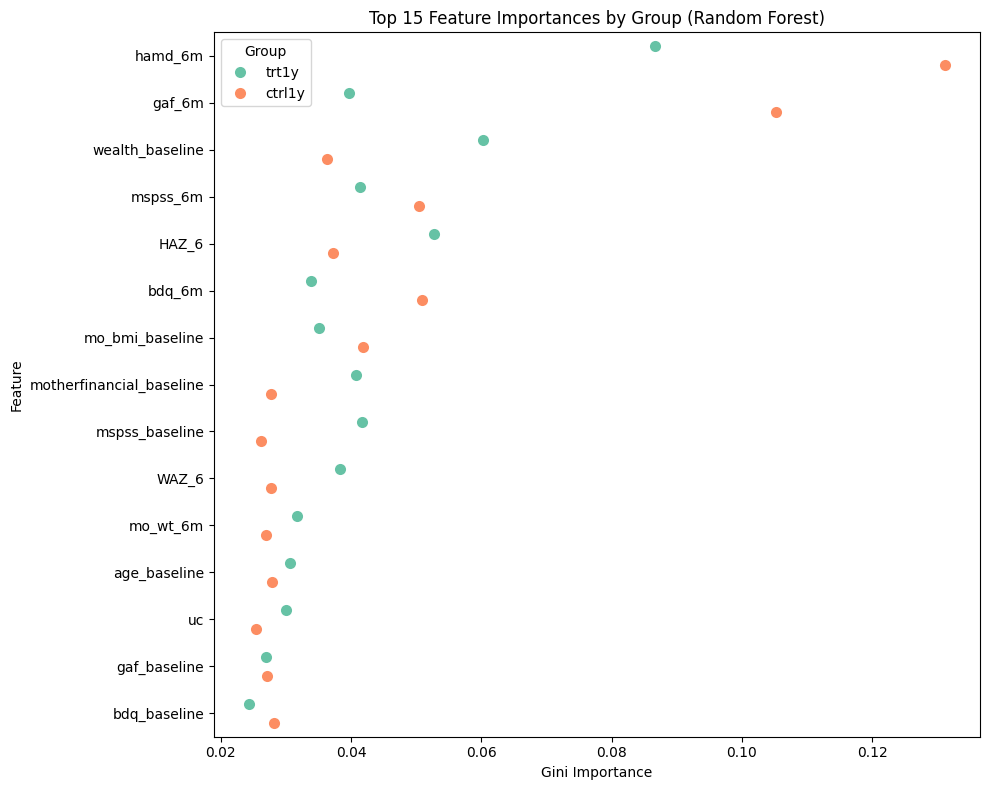

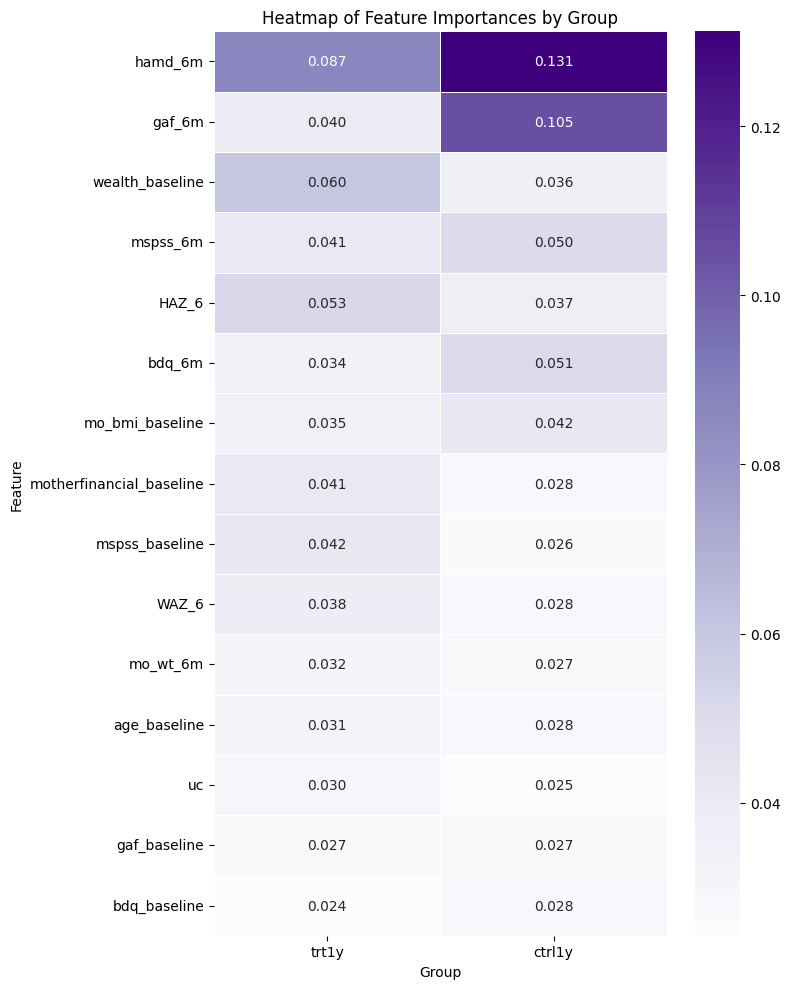

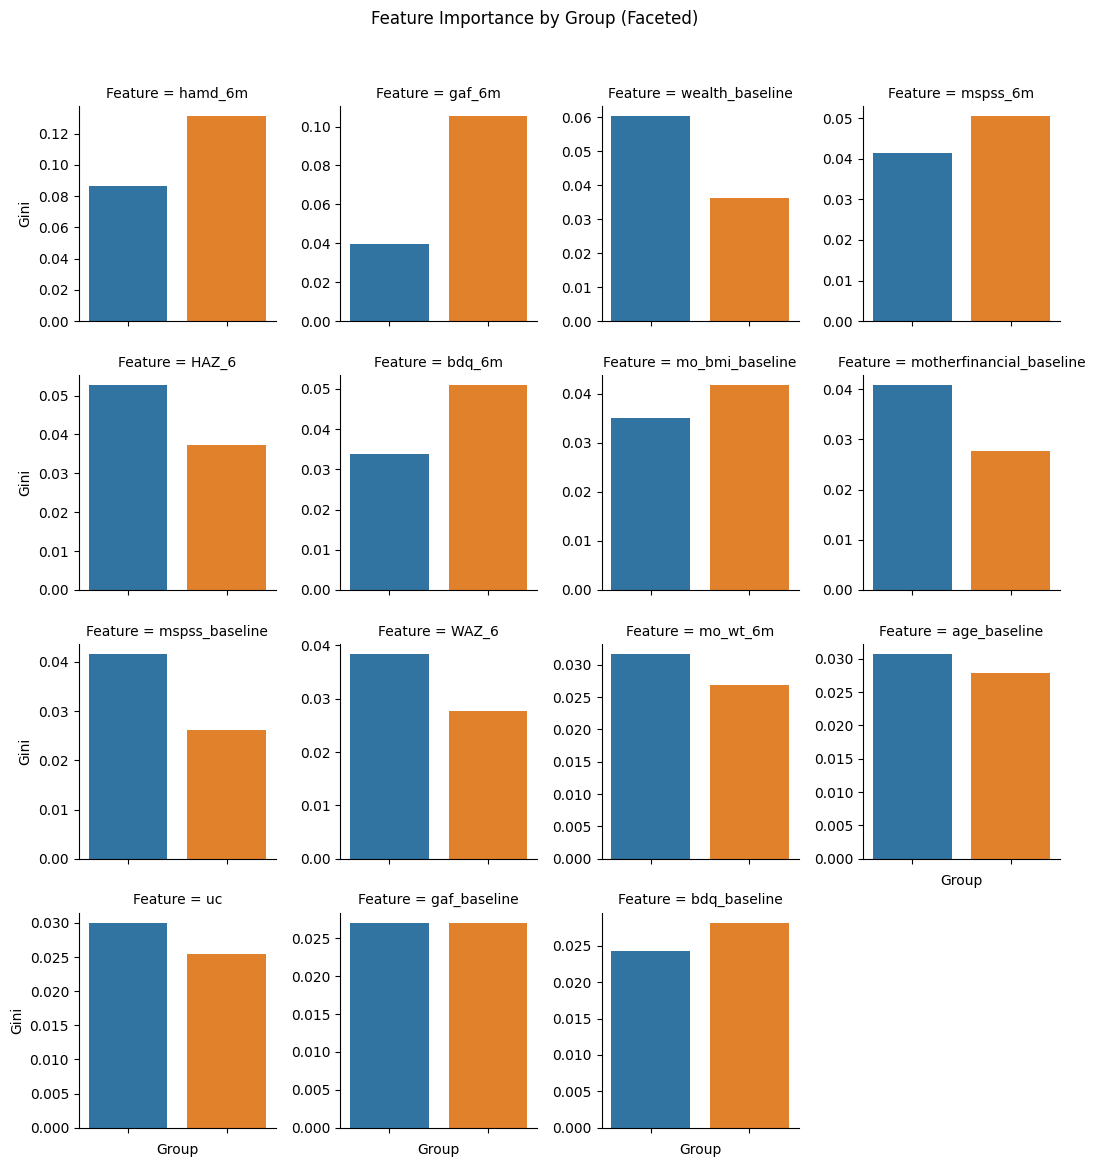

In [ ]:
# Relapse at 1 year - wide dataset

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import shap

######## Relapse at 1 year - wide dataset

# Data prep
exclude_outcomes = [
     "remission_6mo",
    "hamd_6m_percentchange_6m", 
    "response_6mo",
    "depindex_0", "depindex_6m",  "depindex_6m_f",
    "depressed_6m", "depindex_0_f"
]

#### Treatment group - 1 year data
# Filter for treatment group and encode relapse outcome
# Note: 'treat' column indicates treatment group (1 for treatment, 0 for control) 
complete_data_trt = complete_data_1y[complete_data_1y['treat'] == 1].copy()
complete_data_trt['relapse_1y'] = LabelEncoder().fit_transform(complete_data_trt['relapse_1y'])
# Drop columns only if they exist in the DataFrame
columns_to_drop = [col for col in exclude_outcomes + ['treat'] if col in complete_data_trt.columns]
complete_data_trt.drop(columns=columns_to_drop, inplace=True)

predictor_names = complete_data_trt.columns.drop(['newid', 'relapse_1y'])
X = complete_data_trt[predictor_names].values
y = complete_data_trt['relapse_1y'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Assess class imbalance
print("Original class distribution:")
print(pd.Series(y).value_counts())

# Nested CV setup
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Models and param grids
models_and_params = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "LASSO": (LogisticRegression(penalty='l1', solver='saga', max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "SVM": (SVC(kernel='linear', probability=True), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=123), {
        'n_estimators': [100, 500],
        'max_depth': [None, 5, 10]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    "Naïve Bayes": (GaussianNB(), {})
}

# Extract feature importance for RF
rf_model_trt = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=123)
rf_model_trt.fit(X, y)
rf_importances_trt = rf_model_trt.feature_importances_
rf_importance_df_trt = pd.DataFrame({
    'Feature': predictor_names,
    'trt1y': rf_importances_trt
})


# Nested CV Loop with SMOTE for Sklearn Models
performance_data = []
preds_all = {}
probs_all = {}

for name, (model, param_grid) in models_and_params.items():
    grid = GridSearchCV(model, param_grid, cv=inner_cv, scoring='roc_auc', error_score='raise')
    outer_scores = []
    y_probs = np.zeros_like(y, dtype=float)
    y_preds = np.zeros_like(y, dtype=int)
    
    # Outer CV loop
    for train_idx, test_idx in outer_cv.split(X, y):
        # Split training and testing data
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        
        # Apply SMOTE on the training data only
        sm = SMOTE(random_state=123)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
        
        # Fit grid search on the resampled training set
        grid.fit(X_train_res, y_train_res)
        
        # Predict probabilities on the original test set
        probas_ = grid.predict_proba(X_test)[:, 1]
        preds_ = (probas_ > 0.5).astype(int)
        
        # Store predictions in the appropriate test indices
        y_probs[test_idx] = probas_
        y_preds[test_idx] = preds_
        outer_scores.append(roc_auc_score(y_test, probas_))
    
    performance_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y, y_preds),
        "Precision": precision_score(y, y_preds),
        "Recall": recall_score(y, y_preds),
        "F1 Score": f1_score(y, y_preds),
        "AUC": np.mean(outer_scores)
    })
    preds_all[name] = y_preds
    probs_all[name] = y_probs


# Nested CV Loop with SMOTE for Keras Model
print("\nTraining Neural Network with manual CV (with SMOTE)...")
nn_outer_scores = []
nn_y_probs = np.zeros_like(y, dtype=float)
nn_y_preds = np.zeros_like(y, dtype=int)

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    print(f"Fold {fold}...")
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # Apply SMOTE on training data only
    sm = SMOTE(random_state=123)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    # Define and compile the Keras model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the resampled data
    model.fit(
        X_train_res, y_train_res,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )
    
    # Evaluate on the original test set
    y_pred_prob = model.predict(X_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    nn_y_probs[test_idx] = y_pred_prob
    nn_y_preds[test_idx] = y_pred
    nn_outer_scores.append(roc_auc_score(y_test, y_pred_prob))

# Add Keras model performance to results
performance_data.append({
    "Model": "Neural Network Keras",
    "Accuracy": accuracy_score(y, nn_y_preds),
    "Precision": precision_score(y, nn_y_preds),
    "Recall": recall_score(y, nn_y_preds),
    "F1 Score": f1_score(y, nn_y_preds),
    "AUC": np.mean(nn_outer_scores)
})
preds_all["Neural Network Keras"] = nn_y_preds
probs_all["Neural Network Keras"] = nn_y_probs

# Compile performance results
performance_df = pd.DataFrame(performance_data)
print(performance_df.sort_values(by="AUC", ascending=False))

# ROC Curves
plt.figure(figsize=(10, 8))
for name in probs_all:
    fpr, tpr, _ = roc_curve(y, probs_all[name])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y, probs_all[name]):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Treatment Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Calibration Plots
plt.figure(figsize=(10, 6))
for name in probs_all:
    prob_true, prob_pred = calibration_curve(y, probs_all[name], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Plot - Treatment Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# SHAP for best model (e.g., XGBoost)
explainer = shap.Explainer(models_and_params['XGBoost'][0].fit(X, y))
shap_values = explainer(X)
shap.summary_plot(shap_values, features=X, feature_names=predictor_names)

# Confusion Matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for idx, name in enumerate(preds_all):
    cm = confusion_matrix(y, preds_all[name])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Reds')
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
plt.suptitle("Confusion Matrices - Treatment Group")
plt.tight_layout()
plt.show()

# Show performance
print(performance_df.sort_values(by="AUC", ascending=False))


# Decision Curve Analysis
plt.figure(figsize=(10, 7))

# Plot net benefit for each model
for name, probs in probs_all.items():
    dca_df = decision_curve_analysis(y, probs)
    plt.plot(dca_df['threshold'], dca_df['net_benefit'], label=name)

# Add "Treat All" and "Treat None" strategies
thresholds = np.linspace(0.01, 0.99, 99)
treat_all_nb = [np.mean(y) - (1 - np.mean(y)) * (pt / (1 - pt)) for pt in thresholds]
treat_none_nb = [0] * len(thresholds)

plt.plot(thresholds, treat_all_nb, linestyle='--', color='gray', label='Treat All')
plt.plot(thresholds, treat_none_nb, linestyle='--', color='black', label='Treat None')

plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.title("Decision Curve Analysis - Treatment Group")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





#### Control group - 1 year data
# Filter for control group and encode relapse outcome
# Note: 'treat' column indicates treatment group (1 for treatment, 0 for control) 
complete_data_ctrl = complete_data_1y[complete_data_1y['treat'] == 0].copy()
complete_data_ctrl['relapse_1y'] = LabelEncoder().fit_transform(complete_data_ctrl['relapse_1y'])

# Drop columns only if they exist in the DataFrame
columns_to_drop = [col for col in exclude_outcomes + ['treat'] if col in complete_data_ctrl.columns]
complete_data_ctrl.drop(columns=columns_to_drop, inplace=True)

predictor_names = complete_data_ctrl.columns.drop(['newid', 'relapse_1y'])
X = complete_data_ctrl[predictor_names].values
y = complete_data_ctrl['relapse_1y'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Assess class imbalance
print("Original class distribution:")
print(pd.Series(y).value_counts())

# Nested CV setup
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Models and param grids
models_and_params = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "LASSO": (LogisticRegression(penalty='l1', solver='saga', max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "SVM": (SVC(kernel='linear', probability=True), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=123), {
        'n_estimators': [100, 500],
        'max_depth': [None, 5, 10]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    "Naïve Bayes": (GaussianNB(), {})
}

# Extract feature importance for RF
rf_model_ctrl = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=123)
rf_model_ctrl.fit(X, y)
rf_importances_ctrl = rf_model_ctrl.feature_importances_
rf_importance_df_ctrl = pd.DataFrame({
    'Feature': predictor_names,
    'ctrl1y': rf_importances_ctrl
})

# Nested CV Loop with SMOTE for Sklearn Models
performance_data = []
preds_all = {}
probs_all = {}

for name, (model, param_grid) in models_and_params.items():
    grid = GridSearchCV(model, param_grid, cv=inner_cv, scoring='roc_auc', error_score='raise')
    outer_scores = []
    y_probs = np.zeros_like(y, dtype=float)
    y_preds = np.zeros_like(y, dtype=int)
    
    # Outer CV loop
    for train_idx, test_idx in outer_cv.split(X, y):
        # Split training and testing data
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        
        # Apply SMOTE on the training data only
        sm = SMOTE(random_state=123)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
        
        # Fit grid search on the resampled training set
        grid.fit(X_train_res, y_train_res)
        
        # Predict probabilities on the original test set
        probas_ = grid.predict_proba(X_test)[:, 1]
        preds_ = (probas_ > 0.5).astype(int)
        
        # Store predictions in the appropriate test indices
        y_probs[test_idx] = probas_
        y_preds[test_idx] = preds_
        outer_scores.append(roc_auc_score(y_test, probas_))
    
    performance_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y, y_preds),
        "Precision": precision_score(y, y_preds),
        "Recall": recall_score(y, y_preds),
        "F1 Score": f1_score(y, y_preds),
        "AUC": np.mean(outer_scores)
    })
    preds_all[name] = y_preds
    probs_all[name] = y_probs


# Nested CV Loop with SMOTE for Keras Model
print("\nTraining Neural Network with manual CV (with SMOTE)...")
nn_outer_scores = []
nn_y_probs = np.zeros_like(y, dtype=float)
nn_y_preds = np.zeros_like(y, dtype=int)

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    print(f"Fold {fold}...")
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # Apply SMOTE on training data only
    sm = SMOTE(random_state=123)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    # Define and compile the Keras model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the resampled data
    model.fit(
        X_train_res, y_train_res,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )
    
    # Evaluate on the original test set
    y_pred_prob = model.predict(X_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    nn_y_probs[test_idx] = y_pred_prob
    nn_y_preds[test_idx] = y_pred
    nn_outer_scores.append(roc_auc_score(y_test, y_pred_prob))

# Add Keras model performance to results
performance_data.append({
    "Model": "Neural Network Keras",
    "Accuracy": accuracy_score(y, nn_y_preds),
    "Precision": precision_score(y, nn_y_preds),
    "Recall": recall_score(y, nn_y_preds),
    "F1 Score": f1_score(y, nn_y_preds),
    "AUC": np.mean(nn_outer_scores)
})
preds_all["Neural Network Keras"] = nn_y_preds
probs_all["Neural Network Keras"] = nn_y_probs

# Compile performance results
performance_df = pd.DataFrame(performance_data)
print(performance_df.sort_values(by="AUC", ascending=False))

# ROC Curves
plt.figure(figsize=(10, 8))
for name in probs_all:
    fpr, tpr, _ = roc_curve(y, probs_all[name])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y, probs_all[name]):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Control Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Calibration Plots
plt.figure(figsize=(10, 6))
for name in probs_all:
    prob_true, prob_pred = calibration_curve(y, probs_all[name], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Plot - Control Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# SHAP for best model (e.g., XGBoost)
explainer = shap.Explainer(models_and_params['XGBoost'][0].fit(X, y))
shap_values = explainer(X)
shap.summary_plot(shap_values, features=X, feature_names=predictor_names)

# Confusion Matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for idx, name in enumerate(preds_all):
    cm = confusion_matrix(y, preds_all[name])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Reds')
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
plt.suptitle("Confusion Matrices - Control Group")
plt.tight_layout()
plt.show()

# Show performance
print(performance_df.sort_values(by="AUC", ascending=False))


# Decision Curve Analysis
plt.figure(figsize=(10, 7))

# Plot net benefit for each model
for name, probs in probs_all.items():
    dca_df = decision_curve_analysis(y, probs)
    plt.plot(dca_df['threshold'], dca_df['net_benefit'], label=name)

# Add "Treat All" and "Treat None" strategies
thresholds = np.linspace(0.01, 0.99, 99)
treat_all_nb = [np.mean(y) - (1 - np.mean(y)) * (pt / (1 - pt)) for pt in thresholds]
treat_none_nb = [0] * len(thresholds)

plt.plot(thresholds, treat_all_nb, linestyle='--', color='gray', label='Treat All')
plt.plot(thresholds, treat_none_nb, linestyle='--', color='black', label='Treat None')

plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.title("Decision Curve Analysis - Control Group")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# ---------- Feature importance plots ---------- #

# Merge treatment and control importance
rf_importance_combined = pd.merge(rf_importance_df_trt, rf_importance_df_ctrl, on="Feature")

# Average importance and select top 15
rf_importance_combined['avg_gini'] = (rf_importance_combined['trt1y'] + rf_importance_combined['ctrl1y']) / 2
rf_importance_top15 = rf_importance_combined.sort_values(by='avg_gini', ascending=False).head(15)

# Long format for plotting
rf_importance_long = pd.melt(
    rf_importance_top15.drop(columns='avg_gini'),
    id_vars='Feature',
    var_name='Group',
    value_name='Gini'
)

# Dot plot
plt.figure(figsize=(10, 8))
sns.stripplot(data=rf_importance_long, x='Gini', y='Feature', hue='Group', dodge=True, size=8, palette="Set2")
plt.title("Top 15 Feature Importances by Group (Random Forest)")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

# Heat map
heatmap_data = rf_importance_top15.set_index('Feature')[['trt1y', 'ctrl1y']]
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, cmap='Purples', fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Feature Importances by Group")
plt.xlabel("Group")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Faceted bar chart
g = sns.catplot(
    data=rf_importance_long,
    x="Group", y="Gini", hue="Group",
    col="Feature", col_wrap=4,
    kind="bar", height=3, aspect=0.9, sharey=False
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Feature Importance by Group (Faceted)")
g.set_xticklabels(rotation=45)
plt.show()


Training Neural Network with manual CV...
Fold 1...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 2...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 3...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 4...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 5...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


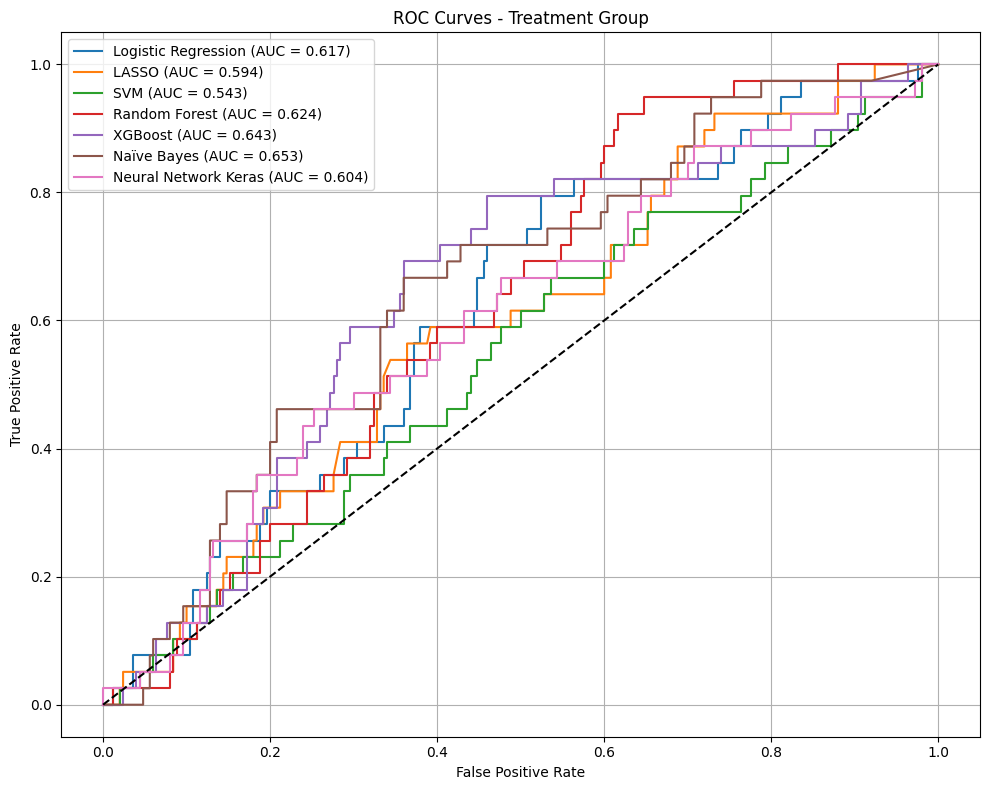

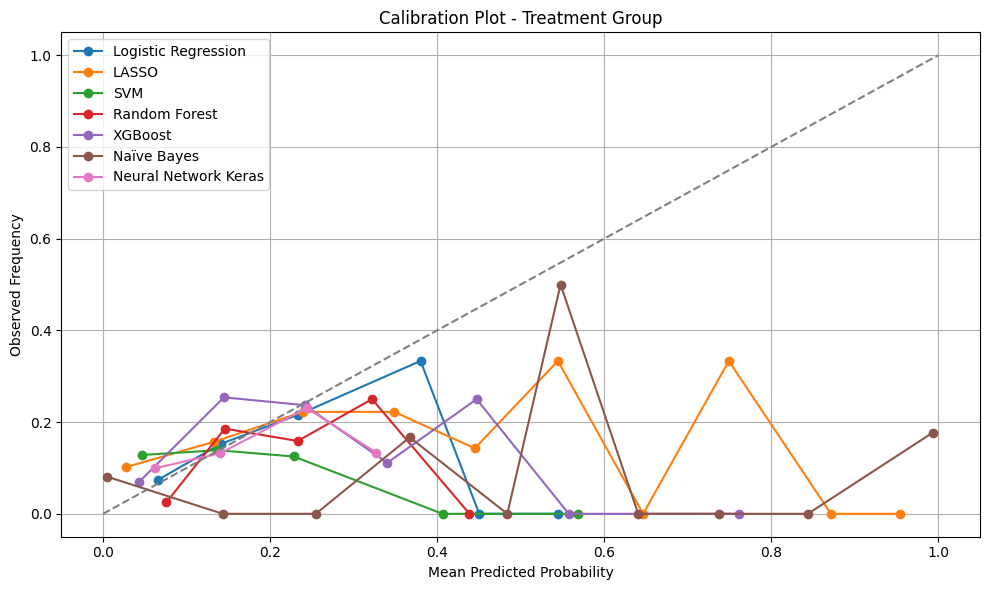

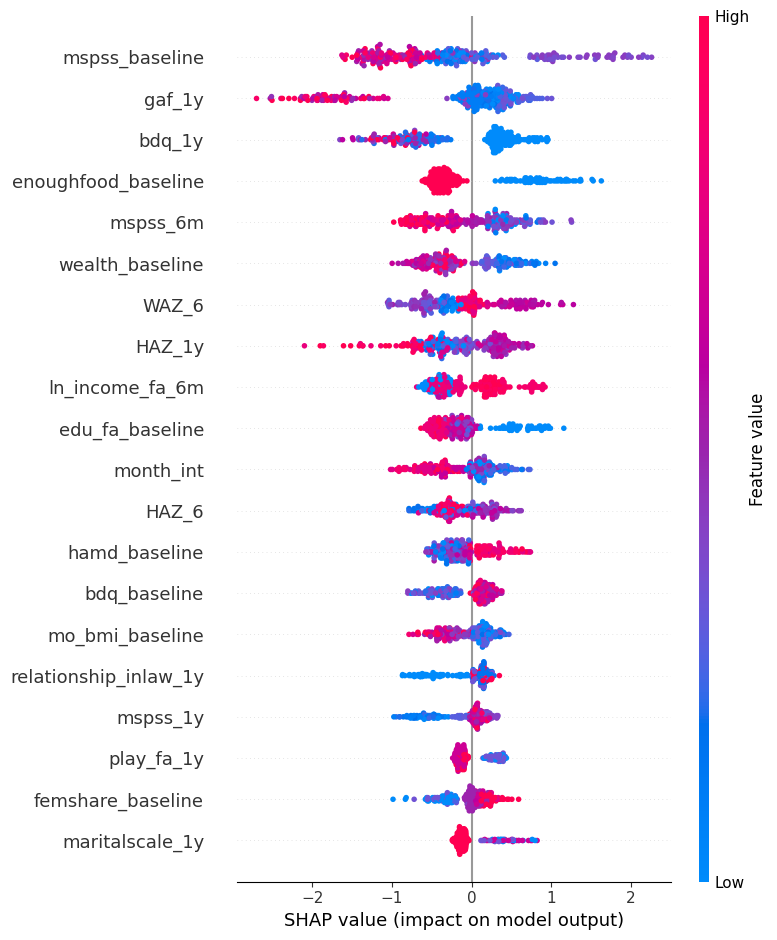

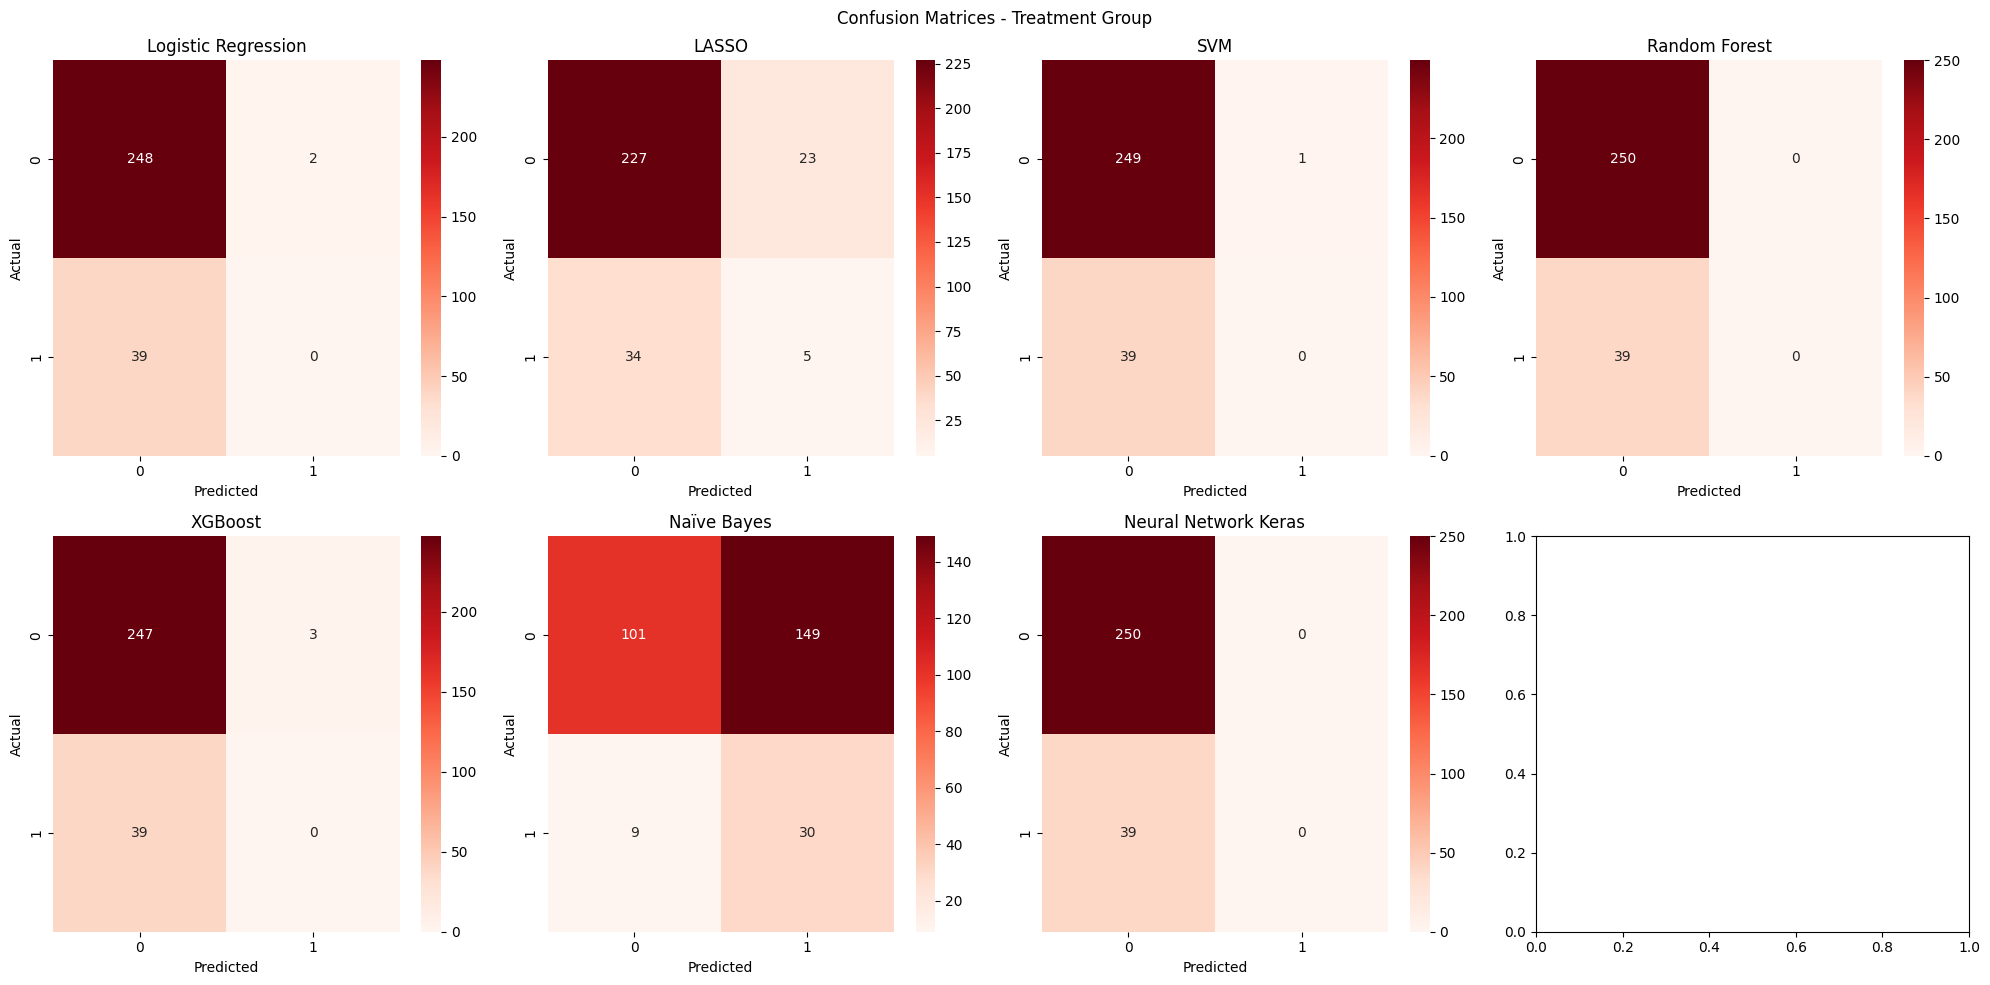

                  Model  Accuracy  Precision    Recall  F1 Score       AUC
4               XGBoost  0.854671   0.000000  0.000000  0.000000  0.704857
5           Naïve Bayes  0.453287   0.167598  0.769231  0.275229  0.665571
3         Random Forest  0.865052   0.000000  0.000000  0.000000  0.642714
0   Logistic Regression  0.858131   0.000000  0.000000  0.000000  0.617500
6  Neural Network Keras  0.865052   0.000000  0.000000  0.000000  0.616071
1                 LASSO  0.802768   0.178571  0.128205  0.149254  0.609750
2                   SVM  0.861592   0.000000  0.000000  0.000000  0.558571


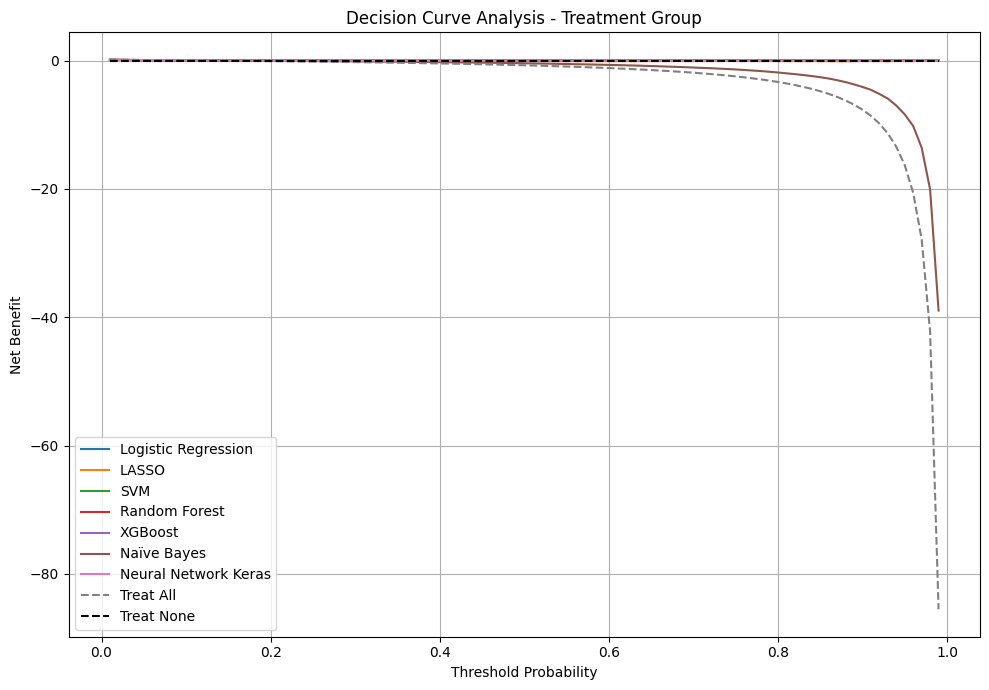


Training Neural Network with manual CV...
Fold 1...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Fold 2...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Fold 3...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Fold 4...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Fold 5...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


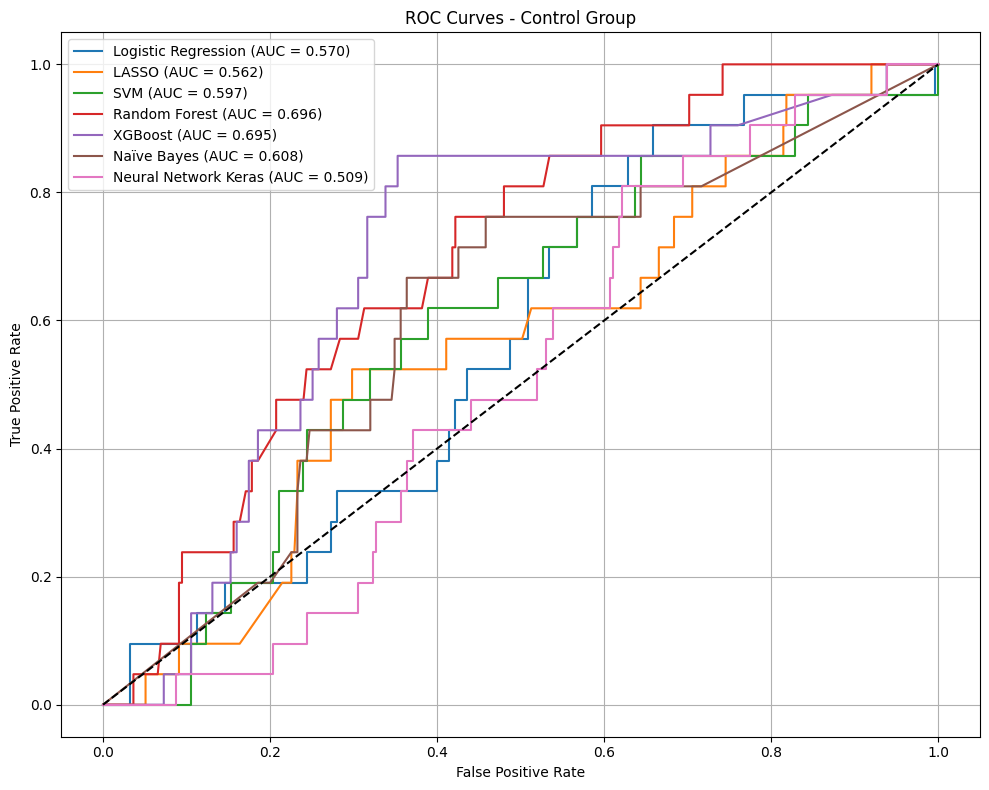

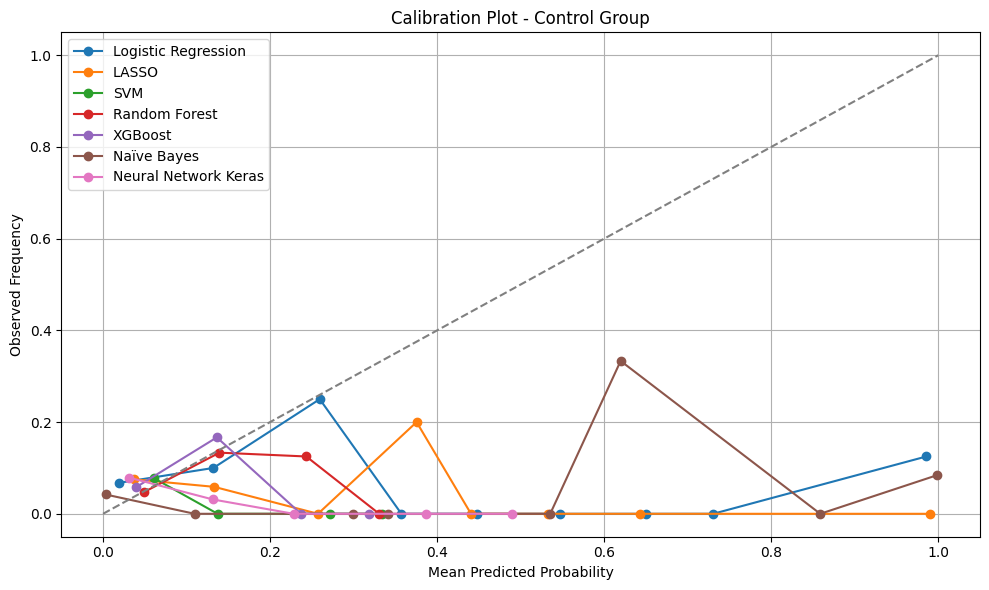

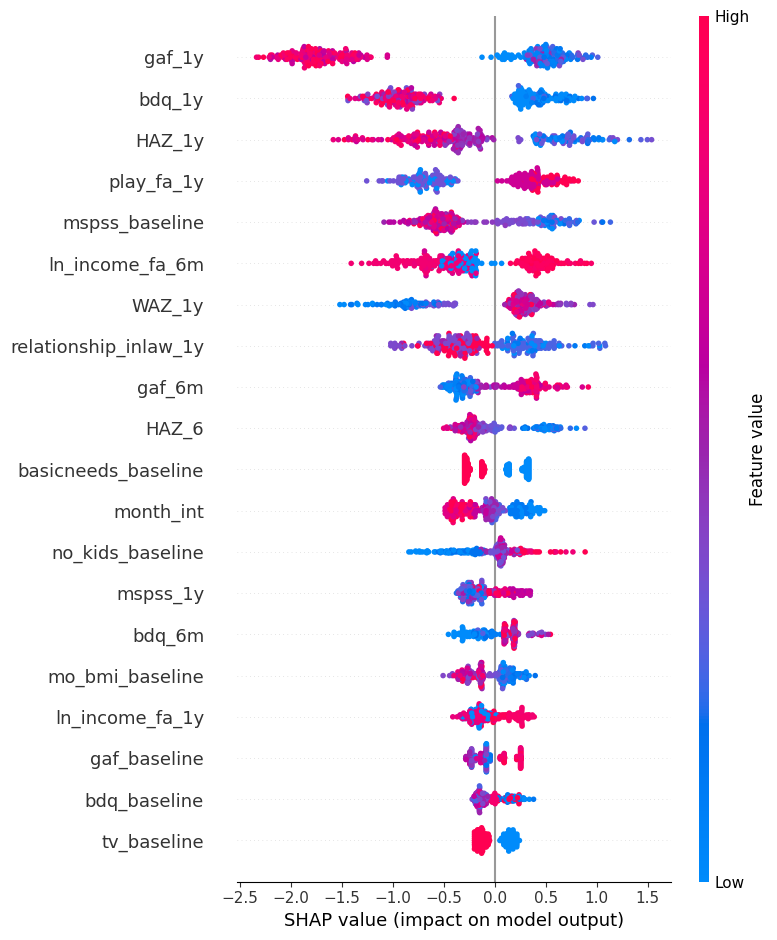

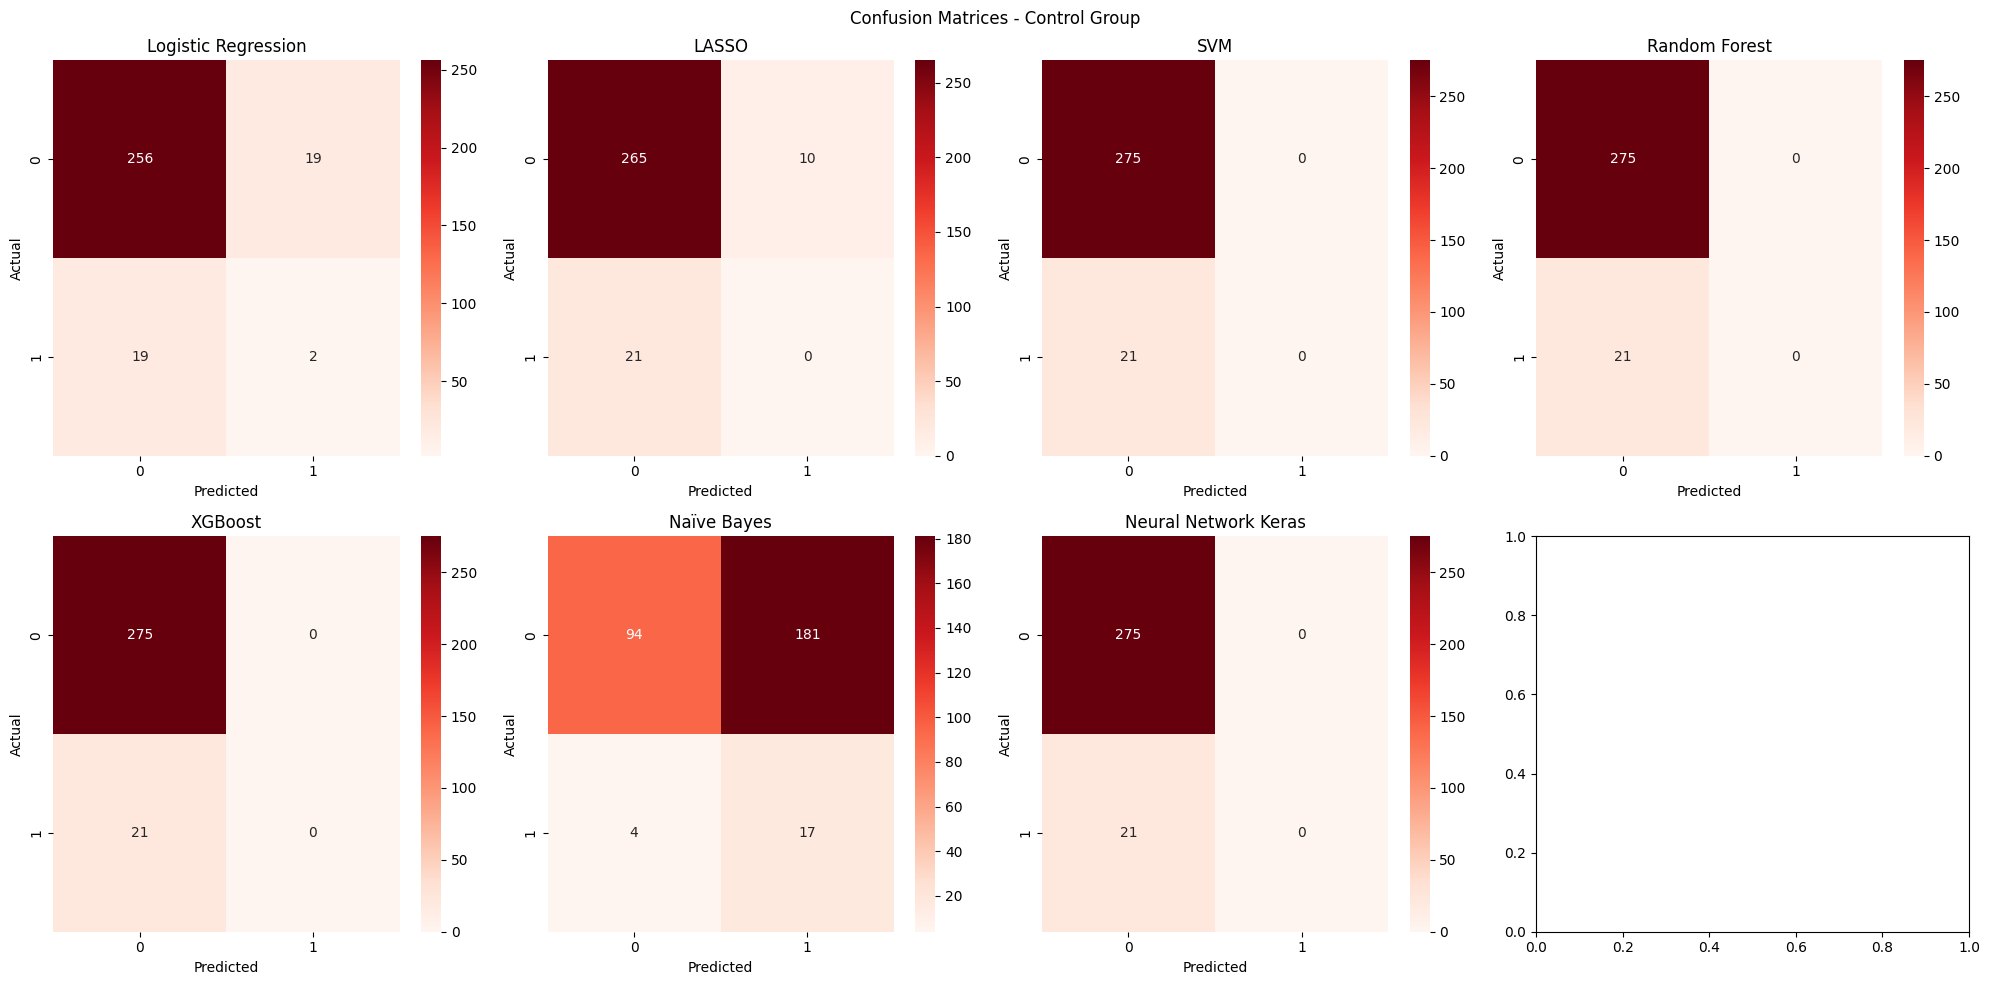

                  Model  Accuracy  Precision    Recall  F1 Score       AUC
4               XGBoost  0.929054   0.000000  0.000000  0.000000  0.724545
3         Random Forest  0.929054   0.000000  0.000000  0.000000  0.692182
5           Naïve Bayes  0.375000   0.085859  0.809524  0.155251  0.640818
1                 LASSO  0.895270   0.000000  0.000000  0.000000  0.626000
2                   SVM  0.929054   0.000000  0.000000  0.000000  0.613818
0   Logistic Regression  0.871622   0.095238  0.095238  0.095238  0.605455
6  Neural Network Keras  0.929054   0.000000  0.000000  0.000000  0.515455


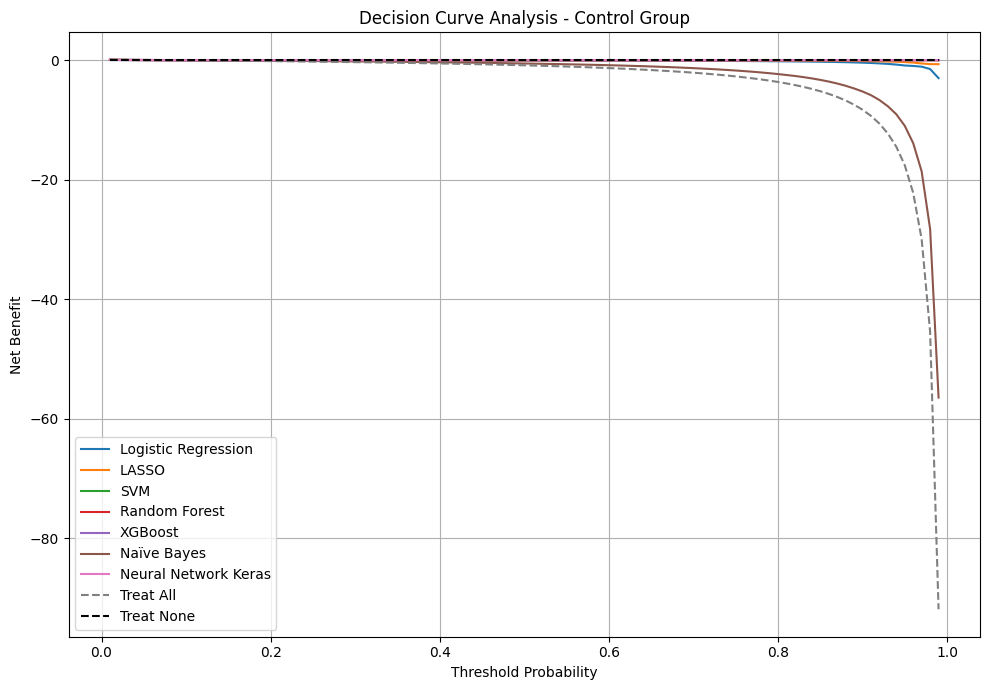

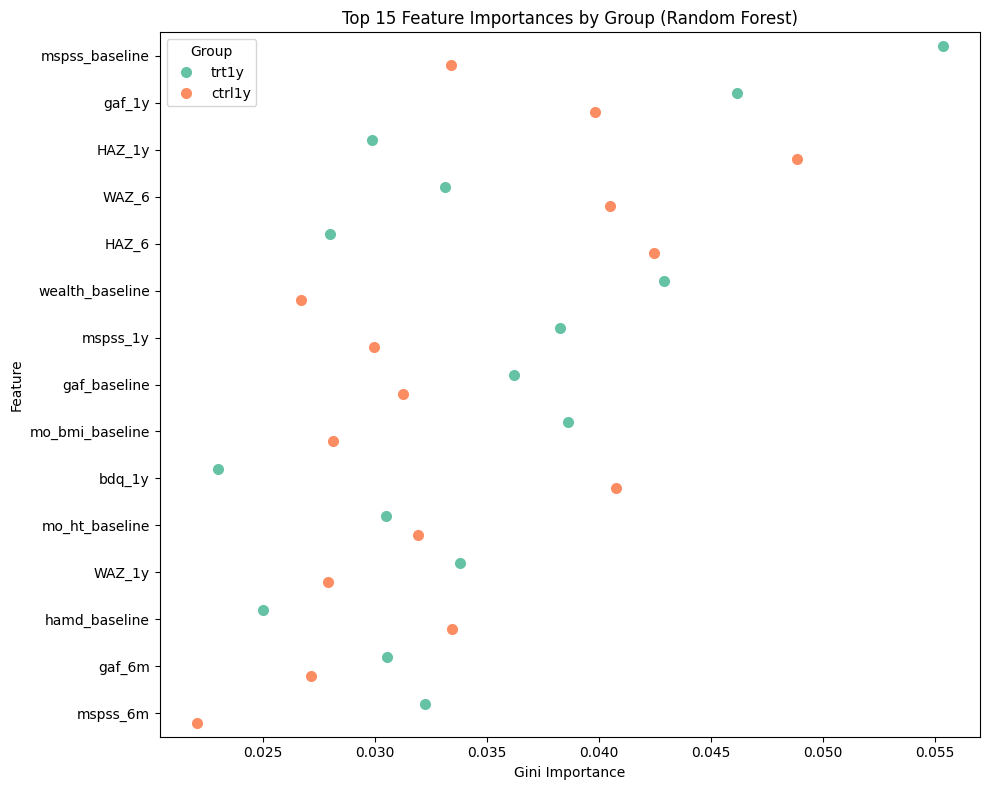

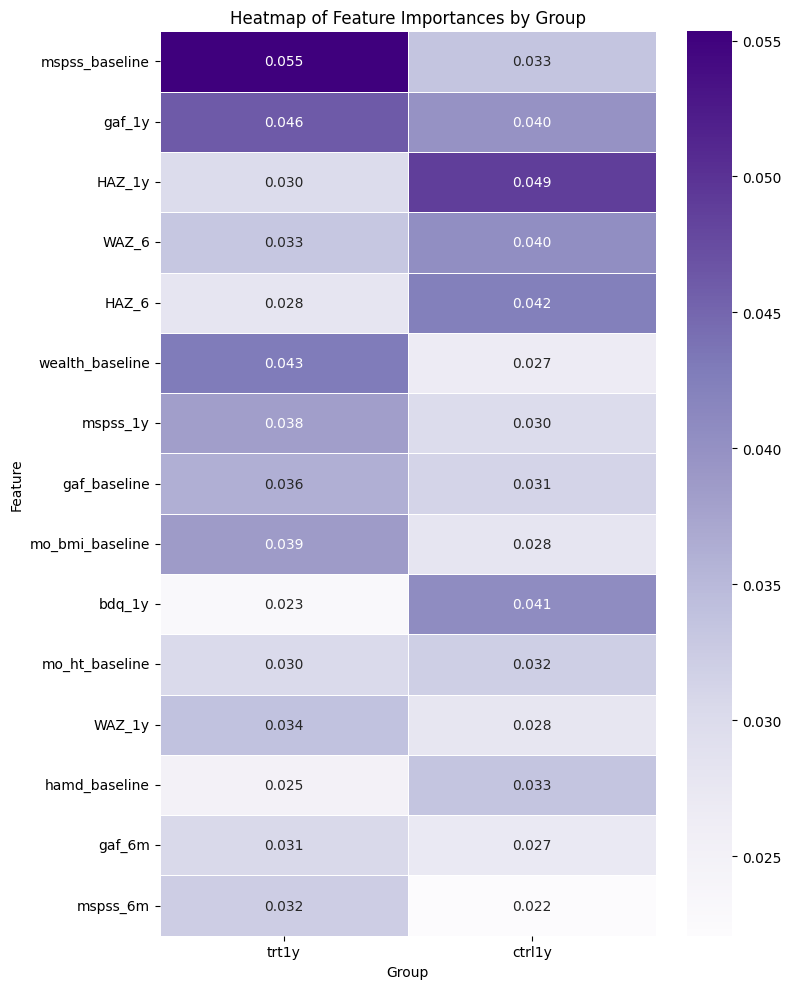

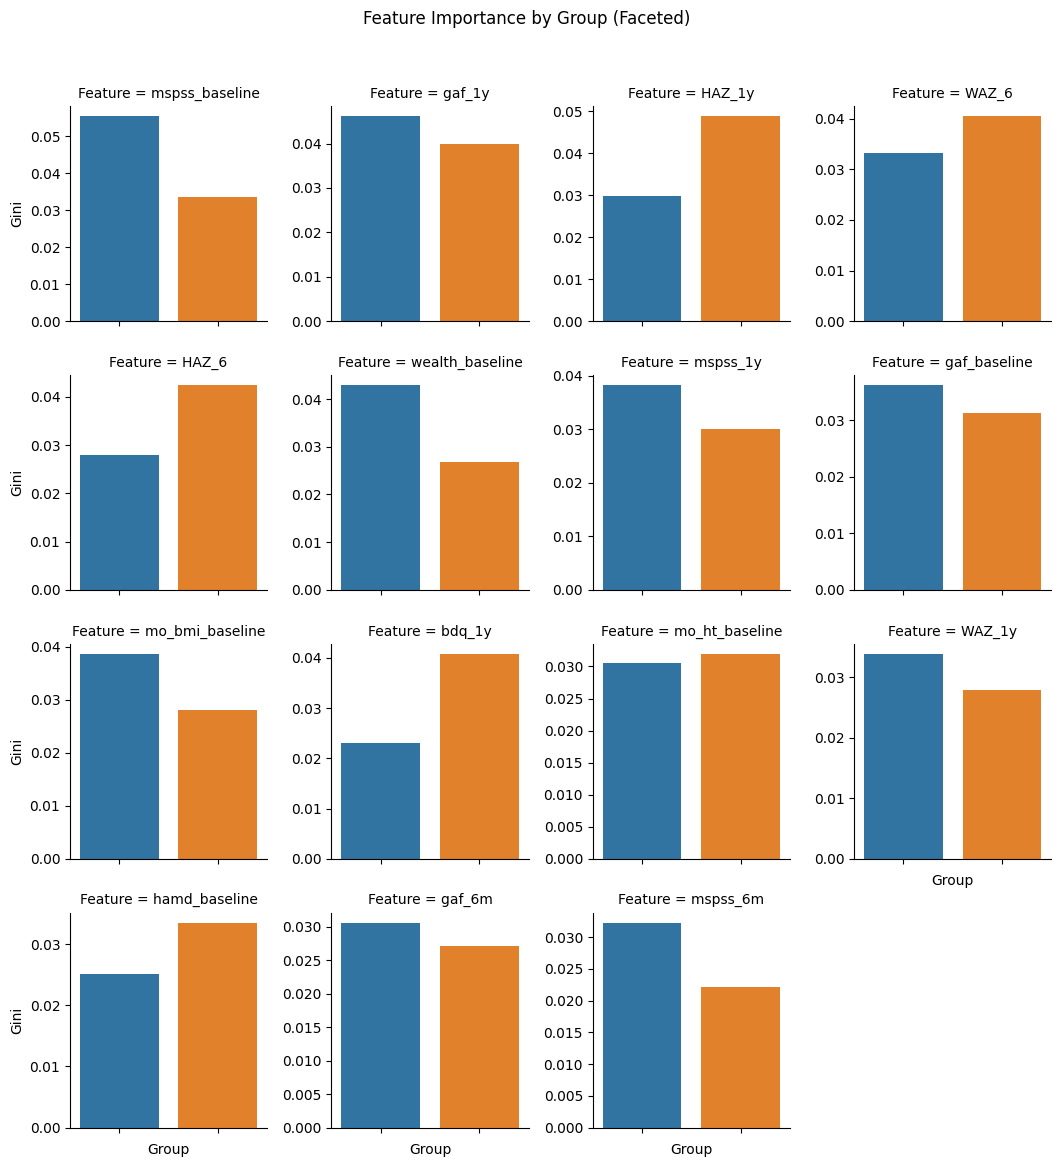

In [ ]:
# Recurrence at 7 years - wide dataset

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import shap

######## Recurrence at 7 years - wide dataset

# Data prep
exclude_outcomes = ["recurrence_1y",  "remission_1y", 
                      "remission_6mo", "hamd_6m_percentchange_6m", "hamd_6m", "hamd_1y", "hamd_1y_percentchange_1y", "hamd_1y_percentchange_prev_1y",
                      "response_6mo", "response_1y", "recovery_1y", "depindex_0", "depindex_6m", "depindex_1y", 
                       "depindex_6m_f", "notdep2013", "depressed_6m", "depressed_1y", 
                      "depindex_0", "depindex_0_f", "depindex_6m", "depindex_6m_f", 
                      "depindex_1y", "depindex_1y_f", 
                      "notdep1213_2", "notdep", "notdep2011", "notdep2012", 
                      "notdep2013", "dur_notdep", "notdep1213", "notdepressed"
]

#### Treatment group - 7 year data
# Filter for treatment group and encode relapse outcome
# Note: 'treat' column indicates treatment group (1 for treatment, 0 for control) 
complete_data_trt = complete_data_7y[complete_data_7y['treat'] == 1].copy()
complete_data_trt['recurrence_7y'] = LabelEncoder().fit_transform(complete_data_trt['recurrence_7y'])
complete_data_trt.drop(columns=exclude_outcomes + ['treat'], inplace=True)

predictor_names = complete_data_trt.columns.drop(['newid', 'recurrence_7y'])
X = complete_data_trt[predictor_names].values
y = complete_data_trt['recurrence_7y'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Assess class imbalance
print("Original class distribution:")
print(pd.Series(y).value_counts())

# Nested CV setup
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Models and param grids
models_and_params = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "LASSO": (LogisticRegression(penalty='l1', solver='saga', max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "SVM": (SVC(kernel='linear', probability=True), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=123), {
        'n_estimators': [100, 500],
        'max_depth': [None, 5, 10]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    "Naïve Bayes": (GaussianNB(), {})
}

# Extract feature importance for RF
rf_model_trt = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=123)
rf_model_trt.fit(X, y)
rf_importances_trt = rf_model_trt.feature_importances_
rf_importance_df_trt = pd.DataFrame({
    'Feature': predictor_names,
    'trt1y': rf_importances_trt
})

# Nested CV Loop with SMOTE for Sklearn Models
performance_data = []
preds_all = {}
probs_all = {}

for name, (model, param_grid) in models_and_params.items():
    grid = GridSearchCV(model, param_grid, cv=inner_cv, scoring='roc_auc', error_score='raise')
    outer_scores = []
    y_probs = np.zeros_like(y, dtype=float)
    y_preds = np.zeros_like(y, dtype=int)
    
    # Outer CV loop
    for train_idx, test_idx in outer_cv.split(X, y):
        # Split training and testing data
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        
        # Apply SMOTE on the training data only
        sm = SMOTE(random_state=123)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
        
        # Fit grid search on the resampled training set
        grid.fit(X_train_res, y_train_res)
        
        # Predict probabilities on the original test set
        probas_ = grid.predict_proba(X_test)[:, 1]
        preds_ = (probas_ > 0.5).astype(int)
        
        # Store predictions in the appropriate test indices
        y_probs[test_idx] = probas_
        y_preds[test_idx] = preds_
        outer_scores.append(roc_auc_score(y_test, probas_))
    
    performance_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y, y_preds),
        "Precision": precision_score(y, y_preds),
        "Recall": recall_score(y, y_preds),
        "F1 Score": f1_score(y, y_preds),
        "AUC": np.mean(outer_scores)
    })
    preds_all[name] = y_preds
    probs_all[name] = y_probs


# Nested CV Loop with SMOTE for Keras Model
print("\nTraining Neural Network with manual CV (with SMOTE)...")
nn_outer_scores = []
nn_y_probs = np.zeros_like(y, dtype=float)
nn_y_preds = np.zeros_like(y, dtype=int)

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    print(f"Fold {fold}...")
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # Apply SMOTE on training data only
    sm = SMOTE(random_state=123)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    # Define and compile the Keras model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the resampled data
    model.fit(
        X_train_res, y_train_res,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )
    
    # Evaluate on the original test set
    y_pred_prob = model.predict(X_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    nn_y_probs[test_idx] = y_pred_prob
    nn_y_preds[test_idx] = y_pred
    nn_outer_scores.append(roc_auc_score(y_test, y_pred_prob))

# Add Keras model performance to results
performance_data.append({
    "Model": "Neural Network Keras",
    "Accuracy": accuracy_score(y, nn_y_preds),
    "Precision": precision_score(y, nn_y_preds),
    "Recall": recall_score(y, nn_y_preds),
    "F1 Score": f1_score(y, nn_y_preds),
    "AUC": np.mean(nn_outer_scores)
})
preds_all["Neural Network Keras"] = nn_y_preds
probs_all["Neural Network Keras"] = nn_y_probs

# Compile performance results
performance_df = pd.DataFrame(performance_data)
print(performance_df.sort_values(by="AUC", ascending=False))


# ROC Curves
plt.figure(figsize=(10, 8))
for name in probs_all:
    fpr, tpr, _ = roc_curve(y, probs_all[name])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y, probs_all[name]):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Treatment Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Calibration Plots
plt.figure(figsize=(10, 6))
for name in probs_all:
    prob_true, prob_pred = calibration_curve(y, probs_all[name], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Plot - Treatment Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# SHAP for best model (e.g., XGBoost)
explainer = shap.Explainer(models_and_params['XGBoost'][0].fit(X, y))
shap_values = explainer(X)
shap.summary_plot(shap_values, features=X, feature_names=predictor_names)

# Confusion Matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for idx, name in enumerate(preds_all):
    cm = confusion_matrix(y, preds_all[name])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Reds')
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
plt.suptitle("Confusion Matrices - Treatment Group")
plt.tight_layout()
plt.show()

# Show performance
print(performance_df.sort_values(by="AUC", ascending=False))


# Decision Curve Analysis
plt.figure(figsize=(10, 7))

# Plot net benefit for each model
for name, probs in probs_all.items():
    dca_df = decision_curve_analysis(y, probs)
    plt.plot(dca_df['threshold'], dca_df['net_benefit'], label=name)

# Add "Treat All" and "Treat None" strategies
thresholds = np.linspace(0.01, 0.99, 99)
treat_all_nb = [np.mean(y) - (1 - np.mean(y)) * (pt / (1 - pt)) for pt in thresholds]
treat_none_nb = [0] * len(thresholds)

plt.plot(thresholds, treat_all_nb, linestyle='--', color='gray', label='Treat All')
plt.plot(thresholds, treat_none_nb, linestyle='--', color='black', label='Treat None')

plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.title("Decision Curve Analysis - Treatment Group")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





#### Control group - 7 year data
# Filter for control group and encode relapse outcome
# Note: 'treat' column indicates treatment group (1 for treatment, 0 for control) 
complete_data_ctrl = complete_data_7y[complete_data_7y['treat'] == 0].copy()
complete_data_ctrl['recurrence_7y'] = LabelEncoder().fit_transform(complete_data_ctrl['recurrence_7y'])
complete_data_ctrl.drop(columns=exclude_outcomes + ['treat'], inplace=True)

predictor_names = complete_data_ctrl.columns.drop(['newid', 'recurrence_7y'])
X = complete_data_ctrl[predictor_names].values
y = complete_data_ctrl['recurrence_7y'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Assess class imbalance
print("Original class distribution:")
print(pd.Series(y).value_counts())

# Nested CV setup
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Models and param grids
models_and_params = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "LASSO": (LogisticRegression(penalty='l1', solver='saga', max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "SVM": (SVC(kernel='linear', probability=True), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=123), {
        'n_estimators': [100, 500],
        'max_depth': [None, 5, 10]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    "Naïve Bayes": (GaussianNB(), {})
}

# Extract feature importance for RF
rf_model_ctrl = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=123)
rf_model_ctrl.fit(X, y)
rf_importances_ctrl = rf_model_ctrl.feature_importances_
rf_importance_df_ctrl = pd.DataFrame({
    'Feature': predictor_names,
    'ctrl1y': rf_importances_ctrl
})

# Nested CV Loop with SMOTE for Sklearn Models
performance_data = []
preds_all = {}
probs_all = {}

for name, (model, param_grid) in models_and_params.items():
    grid = GridSearchCV(model, param_grid, cv=inner_cv, scoring='roc_auc', error_score='raise')
    outer_scores = []
    y_probs = np.zeros_like(y, dtype=float)
    y_preds = np.zeros_like(y, dtype=int)
    
    # Outer CV loop
    for train_idx, test_idx in outer_cv.split(X, y):
        # Split training and testing data
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        
        # Apply SMOTE on the training data only
        sm = SMOTE(random_state=123)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
        
        # Fit grid search on the resampled training set
        grid.fit(X_train_res, y_train_res)
        
        # Predict probabilities on the original test set
        probas_ = grid.predict_proba(X_test)[:, 1]
        preds_ = (probas_ > 0.5).astype(int)
        
        # Store predictions in the appropriate test indices
        y_probs[test_idx] = probas_
        y_preds[test_idx] = preds_
        outer_scores.append(roc_auc_score(y_test, probas_))
    
    performance_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y, y_preds),
        "Precision": precision_score(y, y_preds),
        "Recall": recall_score(y, y_preds),
        "F1 Score": f1_score(y, y_preds),
        "AUC": np.mean(outer_scores)
    })
    preds_all[name] = y_preds
    probs_all[name] = y_probs


# Nested CV Loop with SMOTE for Keras Model
print("\nTraining Neural Network with manual CV (with SMOTE)...")
nn_outer_scores = []
nn_y_probs = np.zeros_like(y, dtype=float)
nn_y_preds = np.zeros_like(y, dtype=int)

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
    print(f"Fold {fold}...")
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # Apply SMOTE on training data only
    sm = SMOTE(random_state=123)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    # Define and compile the Keras model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the resampled data
    model.fit(
        X_train_res, y_train_res,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )
    
    # Evaluate on the original test set
    y_pred_prob = model.predict(X_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    nn_y_probs[test_idx] = y_pred_prob
    nn_y_preds[test_idx] = y_pred
    nn_outer_scores.append(roc_auc_score(y_test, y_pred_prob))

# Add Keras model performance to results
performance_data.append({
    "Model": "Neural Network Keras",
    "Accuracy": accuracy_score(y, nn_y_preds),
    "Precision": precision_score(y, nn_y_preds),
    "Recall": recall_score(y, nn_y_preds),
    "F1 Score": f1_score(y, nn_y_preds),
    "AUC": np.mean(nn_outer_scores)
})
preds_all["Neural Network Keras"] = nn_y_preds
probs_all["Neural Network Keras"] = nn_y_probs

# Compile performance results
performance_df = pd.DataFrame(performance_data)
print(performance_df.sort_values(by="AUC", ascending=False))

# ROC Curves
plt.figure(figsize=(10, 8))
for name in probs_all:
    fpr, tpr, _ = roc_curve(y, probs_all[name])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y, probs_all[name]):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Control Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Calibration Plots
plt.figure(figsize=(10, 6))
for name in probs_all:
    prob_true, prob_pred = calibration_curve(y, probs_all[name], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Plot - Control Group")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# SHAP for best model (e.g., XGBoost)
explainer = shap.Explainer(models_and_params['XGBoost'][0].fit(X, y))
shap_values = explainer(X)
shap.summary_plot(shap_values, features=X, feature_names=predictor_names)

# Confusion Matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for idx, name in enumerate(preds_all):
    cm = confusion_matrix(y, preds_all[name])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Reds')
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
plt.suptitle("Confusion Matrices - Control Group")
plt.tight_layout()
plt.show()

# Show performance
print(performance_df.sort_values(by="AUC", ascending=False))


# Decision Curve Analysis
plt.figure(figsize=(10, 7))

# Plot net benefit for each model
for name, probs in probs_all.items():
    dca_df = decision_curve_analysis(y, probs)
    plt.plot(dca_df['threshold'], dca_df['net_benefit'], label=name)

# Add "Treat All" and "Treat None" strategies
thresholds = np.linspace(0.01, 0.99, 99)
treat_all_nb = [np.mean(y) - (1 - np.mean(y)) * (pt / (1 - pt)) for pt in thresholds]
treat_none_nb = [0] * len(thresholds)

plt.plot(thresholds, treat_all_nb, linestyle='--', color='gray', label='Treat All')
plt.plot(thresholds, treat_none_nb, linestyle='--', color='black', label='Treat None')

plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.title("Decision Curve Analysis - Control Group")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# ---------- Feature importance plots ---------- #

# Merge treatment and control importance
rf_importance_combined = pd.merge(rf_importance_df_trt, rf_importance_df_ctrl, on="Feature")

# Average importance and select top 15
rf_importance_combined['avg_gini'] = (rf_importance_combined['trt1y'] + rf_importance_combined['ctrl1y']) / 2
rf_importance_top15 = rf_importance_combined.sort_values(by='avg_gini', ascending=False).head(15)

# Long format for plotting
rf_importance_long = pd.melt(
    rf_importance_top15.drop(columns='avg_gini'),
    id_vars='Feature',
    var_name='Group',
    value_name='Gini'
)

# Dot plot
plt.figure(figsize=(10, 8))
sns.stripplot(data=rf_importance_long, x='Gini', y='Feature', hue='Group', dodge=True, size=8, palette="Set2")
plt.title("Top 15 Feature Importances by Group (Random Forest)")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

# Heat map
heatmap_data = rf_importance_top15.set_index('Feature')[['trt1y', 'ctrl1y']]
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, cmap='Purples', fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Feature Importances by Group")
plt.xlabel("Group")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Faceted bar chart
g = sns.catplot(
    data=rf_importance_long,
    x="Group", y="Gini", hue="Group",
    col="Feature", col_wrap=4,
    kind="bar", height=3, aspect=0.9, sharey=False
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Feature Importance by Group (Faceted)")
g.set_xticklabels(rotation=45)
plt.show()

In [145]:
# Recurrence at 7 years - wide dataset IMPROVED CODE

# ========= Imports =========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Handling class imbalance using oversampling
# Ensure compatible versions of scikit-learn and scikeras
%pip install -U scikit-learn scikeras tensorflow
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Modeling and evaluation
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier  # Updated: using latest API (no use_label_encoder)
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, roc_curve, 
                             balanced_accuracy_score)

# Neural network
!pip install scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

# SHAP for model explanation
import shap

# Calibration plots and additional metrics
from sklearn.calibration import calibration_curve

import warnings
warnings.filterwarnings('ignore')


# ========= Functions =========

def preprocess_data(df, treat_value, target_col, exclude_cols, id_col):
    """
    Preprocess the data:
      - Filter rows based on treatment group (treat_value)
      - Label-encode the target variable
      - Drop specified columns (including the treatment indicator)
      - Impute missing values (using mean imputation)
      - Standardize features
    """
    # Filter data based on treatment group
    data = df[df['treat'] == treat_value].copy()
    
    # Encode the target variable
    data[target_col] = LabelEncoder().fit_transform(data[target_col])
    
    # Drop outcome-related columns and the treatment indicator
    data.drop(columns=exclude_cols + ['treat'], inplace=True)
    
    # Separate predictors (dropping ID and target) and target
    X = data.drop(columns=[id_col, target_col])
    y = data[target_col].values
    
    # Impute missing values with the mean
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)
    
    return X_scaled, y, X.columns


def select_features(X, y, k=10):
    """
    Use SelectKBest with the ANOVA F-test to select the top k features.
    Returns the transformed feature array and indices of selected features.
    """
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    selected_indices = selector.get_support(indices=True)
    return X_selected, selected_indices


def run_nested_cv(model, param_distributions, X, y, n_iter=10, outer_splits=5, inner_splits=3, scoring='roc_auc'):
    """
    Perform nested cross-validation using RandomizedSearchCV.
    Returns performance metrics, predictions, and probabilities.
    Assumes the input X and y have already been balanced.
    """
    outer_cv = StratifiedKFold(n_splits=outer_splits, shuffle=True, random_state=123)
    inner_cv = StratifiedKFold(n_splits=inner_splits, shuffle=True, random_state=123)
    
    outer_scores = []
    y_preds = np.zeros_like(y)
    y_probs = np.zeros_like(y, dtype=float)
    
    # Hyperparameter tuning with RandomizedSearchCV
    search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=inner_cv, 
                                  scoring=scoring, random_state=123, error_score='raise')
    
    for train_idx, test_idx in outer_cv.split(X, y):
        search.fit(X[train_idx], y[train_idx])
        best_model = search.best_estimator_
        probas = best_model.predict_proba(X[test_idx])[:, 1]
        preds = (probas > 0.5).astype(int)
        y_probs[test_idx] = probas
        y_preds[test_idx] = preds
        outer_scores.append(roc_auc_score(y[test_idx], probas))
    
    metrics = {
        "Accuracy": accuracy_score(y, y_preds),
        "Balanced Accuracy": balanced_accuracy_score(y, y_preds),
        "Precision": precision_score(y, y_preds),
        "Recall": recall_score(y, y_preds),
        "F1 Score": f1_score(y, y_preds),
        "AUC": np.mean(outer_scores)
    }
    
    return metrics, y_preds, y_probs


def create_nn_model(input_dim, neurons1=64, neurons2=32, dropout_rate=0.3, learning_rate=0.001):
    """
    Build and compile a neural network model with tunable hyperparameters.
    """
    model = Sequential()
    model.add(Dense(neurons1, activation='relu', input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model


def run_nested_cv_nn(X, y, outer_splits=5, inner_splits=3, epochs=50, batch_size=32, n_iter=5):
    """
    Perform nested CV for a neural network using KerasClassifier and RandomizedSearchCV.
    Returns performance metrics, predictions, and probabilities.
    Assumes the input X and y have already been balanced.
    """
    outer_cv = StratifiedKFold(n_splits=outer_splits, shuffle=True, random_state=123)
    inner_cv = StratifiedKFold(n_splits=inner_splits, shuffle=True, random_state=123)
    
    nn_y_preds = np.zeros_like(y)
    nn_y_probs = np.zeros_like(y, dtype=float)
    outer_scores = []
    
    def build_model(neurons1=64, neurons2=32, dropout_rate=0.3, learning_rate=0.001):
        return create_nn_model(X.shape[1], neurons1, neurons2, dropout_rate, learning_rate)
    
    model = KerasClassifier(build_fn=build_model, epochs=epochs, batch_size=batch_size, verbose=0)
    
    param_distributions = {
        'neurons1': [32, 64, 128],
        'neurons2': [16, 32, 64],
        'dropout_rate': [0.2, 0.3, 0.4],
        'learning_rate': [0.001, 0.01]
    }
    
    for train_idx, test_idx in outer_cv.split(X, y):
        search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, 
                                    n_iter=n_iter, cv=inner_cv, scoring='roc_auc', random_state=123)
        search.fit(X[train_idx], y[train_idx],
           fit__callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])
        best_nn = search.best_estimator_
        probas = best_nn.predict_proba(X[test_idx])[:, 1]
        preds = (probas > 0.5).astype(int)
        nn_y_probs[test_idx] = probas
        nn_y_preds[test_idx] = preds
        outer_scores.append(roc_auc_score(y[test_idx], probas))
    
    metrics = {
        "Accuracy": accuracy_score(y, nn_y_preds),
        "Balanced Accuracy": balanced_accuracy_score(y, nn_y_preds),
        "Precision": precision_score(y, nn_y_preds),
        "Recall": recall_score(y, nn_y_preds),
        "F1 Score": f1_score(y, nn_y_preds),
        "AUC": np.mean(outer_scores)
    }
    
    return metrics, nn_y_preds, nn_y_probs


def decision_curve_analysis(y_true, y_prob, thresholds=np.linspace(0.01, 0.99, 99)):
    """
    Compute net benefit at different threshold probabilities.
    """
    n = len(y_true)
    dca_data = []
    for pt in thresholds:
        preds = (y_prob >= pt).astype(int)
        tp = np.sum((preds == 1) & (y_true == 1))
        fp = np.sum((preds == 1) & (y_true == 0))
        net_benefit = (tp / n) - (fp / n) * (pt / (1 - pt))
        dca_data.append({'threshold': pt, 'net_benefit': net_benefit})
    return pd.DataFrame(dca_data)


def run_pipeline_group(df, treat_value, target_col, id_col, exclude_outcomes, k_features=10):
    """
    Run the full pipeline for a given treatment group (treat_value).
    Includes preprocessing, SMOTE, feature selection, nested CV (for several models and NN),
    and extraction of RF feature importances.
    """
    # Preprocessing
    X_raw, y, feature_names = preprocess_data(df, treat_value, target_col, exclude_outcomes, id_col)
    group = "Treatment" if treat_value == 1 else "Control"
    print(f"\n--- Processing {group} Group ---")
    print("Original class distribution:")
    print(pd.Series(y).value_counts())
    
    # Balance classes using SMOTE
    sm = SMOTE(random_state=123)
    X_bal, y_bal = sm.fit_resample(X_raw, y)
    print("After SMOTE, class distribution:")
    print(pd.Series(y_bal).value_counts())
    
    # Feature selection
    X_selected, selected_idx = select_features(X_bal, y_bal, k=k_features)
    selected_feature_names = feature_names[selected_idx]
    print("Selected Features:", list(selected_feature_names))
    
    # Define models and hyperparameter spaces (shared across groups)
    models_and_params = {
        "Logistic Regression": (
            LogisticRegression(max_iter=1000, class_weight='balanced'),
            {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
        ),
        "SVM": (
            SVC(kernel='linear', probability=True, class_weight='balanced'),
            {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
        ),
        "Random Forest": (
            RandomForestClassifier(random_state=123, class_weight='balanced'),
            {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10, 20]}
        ),
        "XGBoost": (
            XGBClassifier(eval_metric='logloss'),
            {'n_estimators': [100, 300, 500], 'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 5, 7]}
        ),
        "Naïve Bayes": (
            GaussianNB(),
            {}  # No hyperparameters to tune typically
        )
    }
    
    results = {}
    predictions = {}
    probabilities = {}
    
    for name, (model, param_dist) in models_and_params.items():
        print(f"\nRunning nested CV for {name}...")
        metrics, y_pred, y_prob = run_nested_cv(model, param_dist, X_selected, y_bal, n_iter=10)
        results[name] = metrics
        predictions[name] = y_pred
        probabilities[name] = y_prob
        
    # Neural Network CV
    print("\nRunning nested CV for Neural Network...")
    nn_metrics, nn_preds, nn_probs = run_nested_cv_nn(X_selected, y_bal, epochs=50, batch_size=32, n_iter=5)
    results["Neural Network"] = nn_metrics
    predictions["Neural Network"] = nn_preds
    probabilities["Neural Network"] = nn_probs
    
    # Compute feature importances using Random Forest
    rf_model = RandomForestClassifier(n_estimators=200, random_state=123, class_weight='balanced')
    rf_model.fit(X_selected, y_bal)
    rf_importances = rf_model.feature_importances_
    rf_importance_df = pd.DataFrame({
        'Feature': list(selected_feature_names),
        'Gini': rf_importances
    })
    
    return {
        "results": results,
        "predictions": predictions,
        "probabilities": probabilities,
        "rf_importance_df": rf_importance_df,
        "X_selected": X_selected,
        "y_bal": y_bal,
        "selected_feature_names": selected_feature_names
    }


# ========= Main Usage =========

# Define outcome and columns
target_col = "recurrence_7y"
id_col = "newid"
exclude_outcomes = [
    "recurrence_1y",  "remission_1y", 
    "remission_6mo", "hamd_6m_percentchange_6m", "hamd_6m", "hamd_1y", "hamd_1y_percentchange_1y", "hamd_1y_percentchange_prev_1y",
    "response_6mo", "response_1y", "recovery_1y", "depindex_0", "depindex_6m", "depindex_1y", 
    "depindex_6m_f", "notdep2013", "depressed_6m", "depressed_1y", 
    "depindex_0", "depindex_0_f", "depindex_6m", "depindex_6m_f", 
    "depindex_1y", "depindex_1y_f", 
    "notdep1213_2", "notdep", "notdep2011", "notdep2012", 
    "notdep2013", "dur_notdep", "notdep1213", "notdepressed"
]


# Process both Treatment (treat==1) and Control (treat==0) groups
groups = {"Treatment": 1, "Control": 0}
group_results = {}

for group_name, treat_value in groups.items():
    group_results[group_name] = run_pipeline_group(complete_data_7y, treat_value, target_col, id_col, exclude_outcomes, k_features=10)


# ========= Plotting =========

# 1. ROC Curves and Calibration Plots for each group
for group_name, results_dict in group_results.items():
    y_bal = results_dict["y_bal"]
    probabilities = results_dict["probabilities"]
    
    # ROC Curves
    plt.figure(figsize=(10, 8))
    for name, probs in probabilities.items():
        fpr, tpr, _ = roc_curve(y_bal, probs)
        auc_val = roc_auc_score(y_bal, probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.3f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves - {group_name} Group")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Calibration Plots
    plt.figure(figsize=(10, 6))
    for name, probs in probabilities.items():
        prob_true, prob_pred = calibration_curve(y_bal, probs, n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label=name)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Observed Frequency")
    plt.title(f"Calibration Plot - {group_name} Group")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 2. Confusion Matrices for each group
for group_name, results_dict in group_results.items():
    y_bal = results_dict["y_bal"]
    predictions = results_dict["predictions"]
    num_models = len(predictions)
    cols = 3
    rows = int(np.ceil(num_models / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
    axes = axes.flatten()
    for idx, (name, preds) in enumerate(predictions.items()):
        cm = confusion_matrix(y_bal, preds)
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Reds')
        axes[idx].set_title(f"{name} - {group_name}")
        axes[idx].set_xlabel("Predicted")
        axes[idx].set_ylabel("Actual")
    for ax in axes[num_models:]:
        ax.remove()
    plt.suptitle(f"Confusion Matrices - {group_name} Group")
    plt.tight_layout()
    plt.show()


# 3. Decision Curve Analysis (DCA) for each group
for group_name, results_dict in group_results.items():
    y_bal = results_dict["y_bal"]
    probabilities = results_dict["probabilities"]
    plt.figure(figsize=(10, 7))
    for name, probs in probabilities.items():
        dca_df = decision_curve_analysis(y_bal, probs)
        plt.plot(dca_df['threshold'], dca_df['net_benefit'], label=name)
    thresholds = np.linspace(0.01, 0.99, 99)
    treat_all_nb = [np.mean(y_bal) - (1 - np.mean(y_bal)) * (pt / (1 - pt)) for pt in thresholds]
    treat_none_nb = [0] * len(thresholds)
    plt.plot(thresholds, treat_all_nb, linestyle='--', color='gray', label='Treat All')
    plt.plot(thresholds, treat_none_nb, linestyle='--', color='black', label='Treat None')
    plt.xlabel("Threshold Probability")
    plt.ylabel("Net Benefit")
    plt.title(f"Decision Curve Analysis - {group_name} Group")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 4. Combined Feature Importance Plots (from Random Forest)
# Assume both groups used the same number (k) of features; merge on the 'Feature' column.
rf_trt = group_results["Treatment"]["rf_importance_df"]
rf_ctrl = group_results["Control"]["rf_importance_df"]
combined_rf = pd.merge(rf_trt, rf_ctrl, on="Feature", how="outer", suffixes=("_trt", "_ctrl"))
combined_rf["avg_gini"] = (combined_rf["Gini_trt"] + combined_rf["Gini_ctrl"]) / 2

# Dot Plot
plt.figure(figsize=(10, 8))
sns.stripplot(data=combined_rf, x='avg_gini', y='Feature', size=8, palette="Set2")
plt.title("Combined Feature Importances (Average Gini) - Treatment vs. Control")
plt.xlabel("Average Gini Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Heat Map
heatmap_data = combined_rf.set_index('Feature')[['Gini_trt', 'Gini_ctrl']]
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, cmap='Purples', fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Feature Importances by Group")
plt.xlabel("Group")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Bar Chart for feature importances
plt.figure(figsize=(8, 6))
sns.barplot(data=combined_rf, x='Gini', y='Feature', palette="viridis")
plt.title("Feature Importances (Random Forest) by Group")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


531300.17s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


531306.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


531312.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



--- Processing Treatment Group ---
Original class distribution:
0    250
1     39
Name: count, dtype: int64
After SMOTE, class distribution:
0    250
1    250
Name: count, dtype: int64
Selected Features: ['mo_bmi_baseline', 'bdq_1y', 'gaf_1y', 'ses_6m', 'edu_fa_baseline', 'occupation_fa_baseline', 'aircon_baseline', 'wellwater_baseline', 'enoughfood_baseline', 'mspss_baseline']

Running nested CV for Logistic Regression...

Running nested CV for SVM...

Running nested CV for Random Forest...

Running nested CV for XGBoost...

Running nested CV for Naïve Bayes...

Running nested CV for Neural Network...


AttributeError: 'super' object has no attribute '__sklearn_tags__'

Shape before filtering: (170, 98)
Valid rows remaining: 170
Any NaNs before filtering? False
Any Infs before filtering? False
Any NaNs in X_long before scaling: False
XGBoost nested CV AUC scores: [0.6798418972332017, 0.7075098814229249, 0.7312252964426879, 0.7803030303030303, 0.75]
Mean AUC: 0.730, Std: 0.035
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step

--- XGBoost ---
Accuracy: 0.6470588235294118
Precision: 0.46938775510204084
Recall: 0.40350877192982454
F1 Score: 0.4339622641509434
AUC: 0.7244216736531595
Brier Score: 0.20364602450815894

--- Logistic Regression ---
Accuracy: 0.6647058823529411
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.7506598354292812
Brier Score: 0.22194002197899002

--- LSTM ---
Accuracy: 0.5882352941176471
Precision: 0.2
Recall: 0.09090909090909091
F1 Score: 0.125
AUC: 0.5098814229249011
Brier Score: 0.24369645956850428


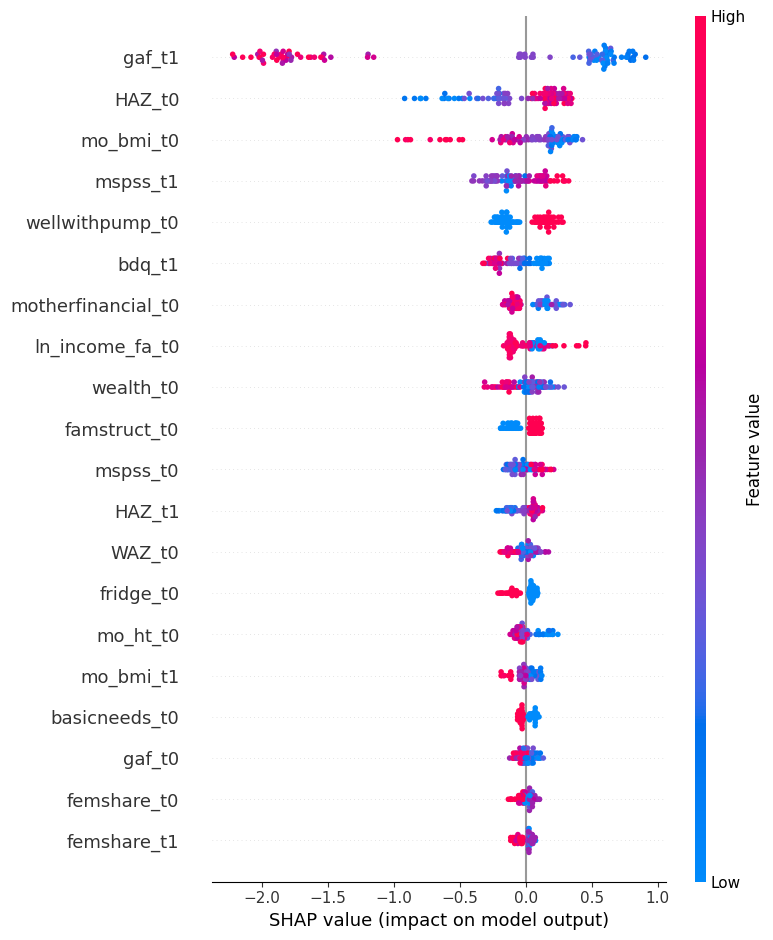

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


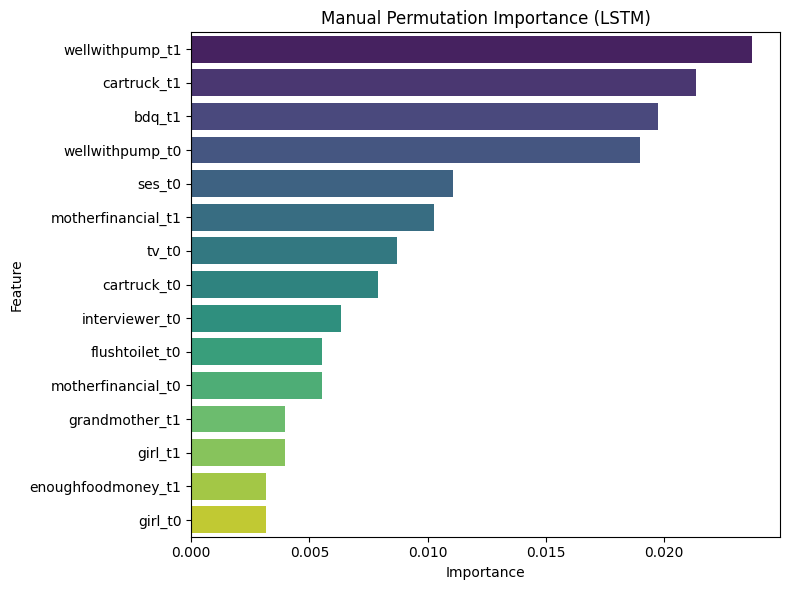

Shape before filtering: (244, 98)
Valid rows remaining: 244
Any NaNs before filtering? False
Any Infs before filtering? False
Any NaNs in X_long before scaling: False
XGBoost nested CV AUC scores: [0.9786324786324787, 0.9038461538461539, 0.9252136752136753, 0.9487179487179488, 0.9791666666666666]
Mean AUC: 0.947, Std: 0.030
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

--- XGBoost ---
Accuracy: 0.8811475409836066
Precision: 0.7692307692307693
Recall: 0.78125
F1 Score: 0.7751937984496124
AUC: 0.9397569444444445
Brier Score: 0.08715871035932059

--- Logistic Regression ---
Accuracy: 0.9467213114754098
Precision: 0.9047619047619048
Recall: 0.890625
F1 Score: 0.8976377952755905
AUC: 0.9855034722222222
Brier Score: 0.04585176961488787

--- LSTM ---
Accuracy: 0.673469387755102
Precision: 0.36363636363636365
Recall: 0.3076923076923077
F1 Score: 0.3333333333333333
AUC: 0.4401709401709401
Brier Score: 0.24176308170224073


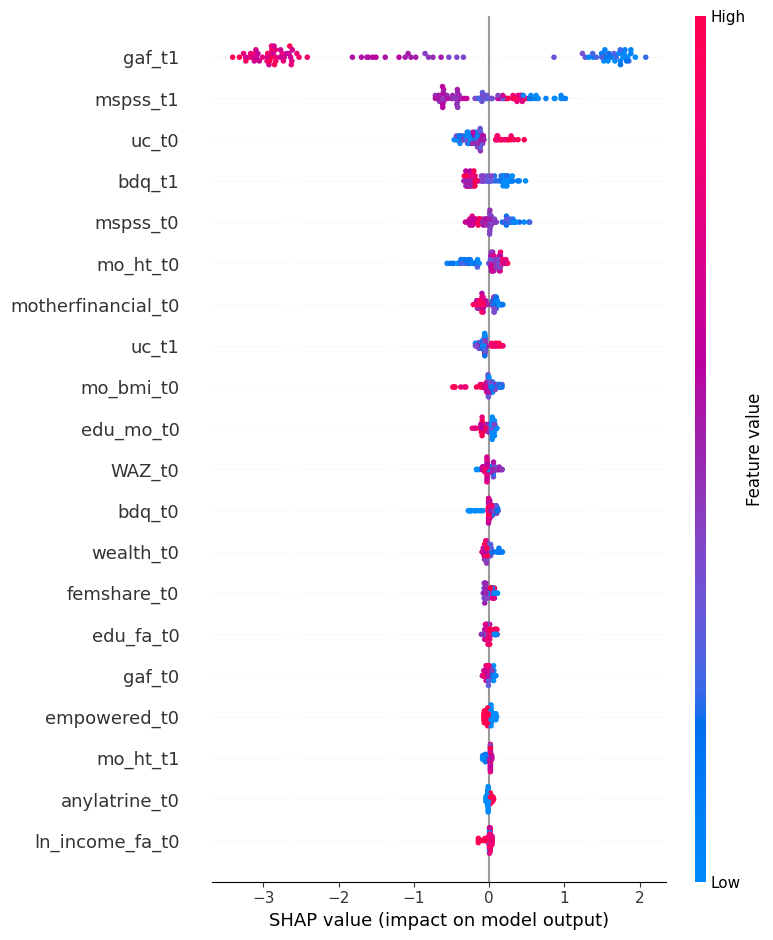

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


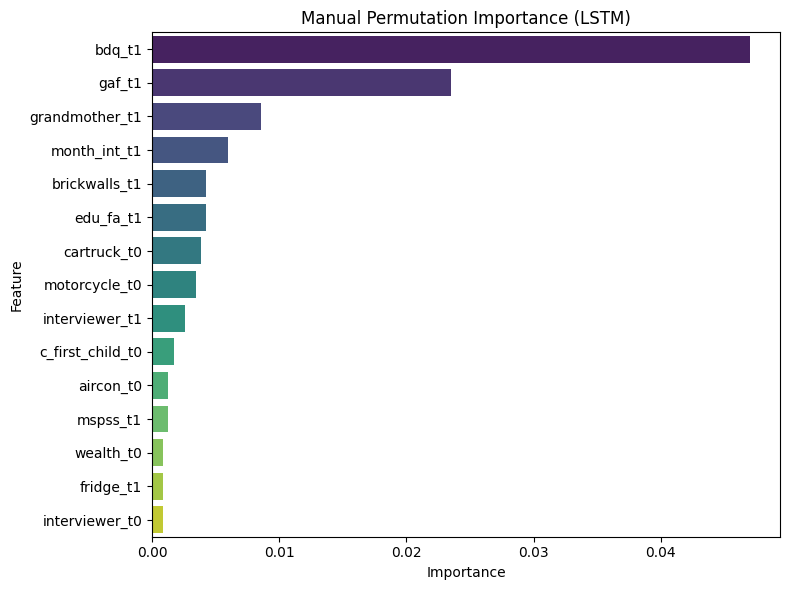

In [138]:
# Relapse at 1 year - long dataset

# Longitudinal ML modeling in Python for intervention group

# ------------------------ Imports ------------------------ #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    roc_curve, brier_score_loss
)
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier

import shap
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier

######### Intervention group

# ------------------------ Load and Prepare Data ------------------------ #
exclude_outcomes = [
    "recurrence", "remission", "hamd", "hamd_6m_percentchange",
    "response", "recovery"
]

# Copy and filter dataset
data = dat_ml_long_1y.copy()
data = data[data["treat"] == 1].drop(columns=exclude_outcomes + ["treat"])

# Encode target
data["relapse"] = data["relapse"].fillna(0).astype(int)

# Identify and encode categorical features
non_numeric_cols = [col for col in data.columns if data[col].dtype == 'object' or str(data[col].dtype).startswith('category')]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = pd.DataFrame(encoder.fit_transform(data[non_numeric_cols]))
encoded.columns = encoder.get_feature_names_out(non_numeric_cols)

# Combine numeric and encoded categorical
data = pd.concat([data.drop(columns=non_numeric_cols), encoded], axis=1)

# Sort and group by subject and time
data = data.sort_values(by=["newid", "time_index"])
grouped = data.groupby("newid")
time_steps = grouped.size().max()
feature_cols = [col for col in data.columns if col not in ["newid", "relapse", "time_index"]]
n_features = len(feature_cols)

# Pad sequences and extract last outcome
X_list, y_list = [], []
for newid, group in grouped:
    group = group.copy()
    for col in feature_cols:
        median_val = group[col].median()
        if pd.isna(median_val):
            median_val = data[col].median()  # fallback to global median
        group[col] = group[col].fillna(median_val)
    X_group = group[feature_cols].to_numpy()
    X_padded = np.pad(X_group, ((0, time_steps - X_group.shape[0]), (0, 0)), mode='constant')
    X_list.append(X_padded)
    y_list.append(group.sort_values("time_index")["relapse"].iloc[-1])

X_long = np.stack(X_list)
y = np.array(y_list)

# Time-step normalization
X_long_scaled = np.zeros_like(X_long)
for i in range(n_features):
    mean = np.mean(X_long[:, :, i])
    std = np.std(X_long[:, :, i])
    X_long_scaled[:, :, i] = (X_long[:, :, i] - mean) / std

# Flatten for non-sequential models
X_flat = X_long_scaled.reshape(X_long_scaled.shape[0], -1)
flat_feature_names = [f"{feat}_t{t}" for t in range(time_steps) for feat in feature_cols]

print("Shape before filtering:", X_flat.shape)

# Remove NaNs and Infs
valid_idx = ~np.isnan(X_flat).any(axis=1) & ~np.isinf(X_flat).any(axis=1)

print("Valid rows remaining:", valid_idx.sum())

if valid_idx.sum() == 0:
    raise ValueError("No valid rows remaining after filtering. Please check the preprocessing steps.")

print("Any NaNs before filtering?", np.isnan(X_flat).any())
print("Any Infs before filtering?", np.isinf(X_flat).any())
print("Any NaNs in X_long before scaling:", np.isnan(X_long).any())

X_flat = X_flat[valid_idx]
y = y[valid_idx]
X_long_scaled = X_long_scaled[valid_idx]

# ------------------------ Nested CV for XGBoost ------------------------ #
def nested_cv_model(X, y, model, param_grid, model_name):
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring="roc_auc")
    auc_scores, models = [], []
    oof_preds = np.zeros_like(y, dtype=float)

    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred_prob = best_model.predict_proba(X_test)[:, 1]

        auc_scores.append(roc_auc_score(y_test, y_pred_prob))
        oof_preds[test_idx] = y_pred_prob
        models.append(best_model)

    print(f"{model_name} nested CV AUC scores:", auc_scores)
    print(f"Mean AUC: {np.mean(auc_scores):.3f}, Std: {np.std(auc_scores):.3f}")
    return models[-1], oof_preds

xgb_params = {
    "n_estimators": [100, 300],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8],
    "colsample_bytree": [0.8]
}

xgb_model_final, xgb_oof_pred = nested_cv_model(
    X_flat, y,
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    xgb_params,
    "XGBoost"
)

# ------------------------ Logistic Regression (baseline) ------------------------ #
logit_model = LogisticRegressionCV(cv=5, max_iter=1000).fit(X_flat, y)
logit_pred = logit_model.predict_proba(X_flat)[:, 1]

# ------------------------ Bidirectional LSTM ------------------------ #
X_train, X_test, y_train, y_test = train_test_split(X_long_scaled, y, test_size=0.2, stratify=y, random_state=123)

lstm_input = Input(shape=(time_steps, n_features))
x = Bidirectional(LSTM(32, return_sequences=False))(lstm_input)
x = Dropout(0.3)(x)
lstm_output = Dense(1, activation='sigmoid')(x)
lstm_model = Model(inputs=lstm_input, outputs=lstm_output)

lstm_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=0,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

lstm_pred_prob = lstm_model.predict(X_test).flatten()
lstm_pred = (lstm_pred_prob > 0.5).astype(int)

# ------------------------ Evaluation ------------------------ #
def print_metrics(y_true, y_pred, y_prob, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("AUC:", roc_auc_score(y_true, y_prob))
    print("Brier Score:", brier_score_loss(y_true, y_prob))

print_metrics(y, (xgb_oof_pred > 0.5).astype(int), xgb_oof_pred, "XGBoost")
print_metrics(y, (logit_pred > 0.5).astype(int), logit_pred, "Logistic Regression")
print_metrics(y_test, lstm_pred, lstm_pred_prob, "LSTM")


## Performance results for visualization
performance_results_treat = pd.DataFrame([
    ["XGBoost", accuracy_score(y, (xgb_oof_pred > 0.5).astype(int)), precision_score(y, (xgb_oof_pred > 0.5).astype(int)), recall_score(y, (xgb_oof_pred > 0.5).astype(int)), f1_score(y, (xgb_oof_pred > 0.5).astype(int)), roc_auc_score(y, xgb_oof_pred), brier_score_loss(y, xgb_oof_pred)],
    ["Logistic Regression", accuracy_score(y, (logit_pred > 0.5).astype(int)), precision_score(y, (logit_pred > 0.5).astype(int)), recall_score(y, (logit_pred > 0.5).astype(int)), f1_score(y, (logit_pred > 0.5).astype(int)), roc_auc_score(y, logit_pred), brier_score_loss(y, logit_pred)],
    ["LSTM", accuracy_score(y_test, lstm_pred), precision_score(y_test, lstm_pred), recall_score(y_test, lstm_pred), f1_score(y_test, lstm_pred), roc_auc_score(y_test, lstm_pred_prob), brier_score_loss(y_test, lstm_pred_prob)]
], columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC", "Brier Score"])
performance_results_treat["Group"] = "Treatment"

# ------------------------ SHAP Summary Plot (XGBoost) ------------------------ #
explainer = shap.Explainer(xgb_model_final)
shap_values = explainer(X_flat[:100])
shap.summary_plot(shap_values, features=X_flat[:100], feature_names=flat_feature_names)

# ------------------------ LSTM Permutation Importance ------------------------ #
def compute_permutation_importance_lstm(model, X, y, n_repeats=10, scoring='roc_auc'):
    """
    Compute permutation importance manually for LSTM on 3D input.
    """
    from sklearn.metrics import roc_auc_score
    baseline_score = roc_auc_score(y, model.predict(X).flatten())
    importances = np.zeros(X.shape[2] * X.shape[1])  # time_steps * features

    for i in range(X.shape[2]):  # each feature
        for t in range(X.shape[1]):  # each time step
            scores = []
            for _ in range(n_repeats):
                X_permuted = X.copy()
                X_permuted[:, t, i] = np.random.permutation(X[:, t, i])
                perm_score = roc_auc_score(y, model.predict(X_permuted).flatten())
                scores.append(baseline_score - perm_score)  # importance = performance drop
            importances[t * X.shape[2] + i] = np.mean(scores)

    return importances

# Run permutation importance
importances = compute_permutation_importance_lstm(
    model=lstm_model,
    X=X_test,
    y=y_test,
    n_repeats=5  # set to 10+ for final version
)

# Format feature names
flat_feature_names = [f"{feat}_t{t}" for t in range(time_steps) for feat in feature_cols]

perm_importance_df_treat = pd.DataFrame({
    "Feature": flat_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Show and plot
print(perm_importance_df_treat.head(20))

plt.figure(figsize=(8, 6))
sns.barplot(data=perm_importance_df_treat.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("Manual Permutation Importance (LSTM)")
plt.tight_layout()
plt.show()







######### Control group

# ------------------------ Load and Prepare Data ------------------------ #
exclude_outcomes = [
    "recurrence", "remission", "hamd", "hamd_6m_percentchange",
    "response", "recovery"
]

# Copy and filter dataset
data = dat_ml_long_1y.copy()
data = data[data["treat"] == 0].drop(columns=exclude_outcomes + ["treat"])

# Encode target
data["relapse"] = data["relapse"].fillna(0).astype(int)

# Identify and encode categorical features
non_numeric_cols = [col for col in data.columns if data[col].dtype == 'object' or str(data[col].dtype).startswith('category')]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = pd.DataFrame(encoder.fit_transform(data[non_numeric_cols]))
encoded.columns = encoder.get_feature_names_out(non_numeric_cols)

# Combine numeric and encoded categorical
data = pd.concat([data.drop(columns=non_numeric_cols), encoded], axis=1)

# Sort and group by subject and time
data = data.sort_values(by=["newid", "time_index"])
grouped = data.groupby("newid")
time_steps = grouped.size().max()
feature_cols = [col for col in data.columns if col not in ["newid", "relapse", "time_index"]]
n_features = len(feature_cols)

# Pad sequences and extract last outcome
X_list, y_list = [], []
for newid, group in grouped:
    group = group.copy()
    for col in feature_cols:
        median_val = group[col].median()
        if pd.isna(median_val):
            median_val = data[col].median()  # fallback to global median
        group[col] = group[col].fillna(median_val)
    X_group = group[feature_cols].to_numpy()
    X_padded = np.pad(X_group, ((0, time_steps - X_group.shape[0]), (0, 0)), mode='constant')
    X_list.append(X_padded)
    y_list.append(group.sort_values("time_index")["relapse"].iloc[-1])

X_long = np.stack(X_list)
y = np.array(y_list)

# Time-step normalization
X_long_scaled = np.zeros_like(X_long)
for i in range(n_features):
    mean = np.mean(X_long[:, :, i])
    std = np.std(X_long[:, :, i])
    X_long_scaled[:, :, i] = (X_long[:, :, i] - mean) / std

# Flatten for non-sequential models
X_flat = X_long_scaled.reshape(X_long_scaled.shape[0], -1)
flat_feature_names = [f"{feat}_t{t}" for t in range(time_steps) for feat in feature_cols]

print("Shape before filtering:", X_flat.shape)

# Remove NaNs and Infs
valid_idx = ~np.isnan(X_flat).any(axis=1) & ~np.isinf(X_flat).any(axis=1)

print("Valid rows remaining:", valid_idx.sum())

if valid_idx.sum() == 0:
    raise ValueError("No valid rows remaining after filtering. Please check the preprocessing steps.")

print("Any NaNs before filtering?", np.isnan(X_flat).any())
print("Any Infs before filtering?", np.isinf(X_flat).any())
print("Any NaNs in X_long before scaling:", np.isnan(X_long).any())

X_flat = X_flat[valid_idx]
y = y[valid_idx]
X_long_scaled = X_long_scaled[valid_idx]

# ------------------------ Nested CV for XGBoost ------------------------ #
def nested_cv_model(X, y, model, param_grid, model_name):
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring="roc_auc")
    auc_scores, models = [], []
    oof_preds = np.zeros_like(y, dtype=float)

    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred_prob = best_model.predict_proba(X_test)[:, 1]

        auc_scores.append(roc_auc_score(y_test, y_pred_prob))
        oof_preds[test_idx] = y_pred_prob
        models.append(best_model)

    print(f"{model_name} nested CV AUC scores:", auc_scores)
    print(f"Mean AUC: {np.mean(auc_scores):.3f}, Std: {np.std(auc_scores):.3f}")
    return models[-1], oof_preds

xgb_params = {
    "n_estimators": [100, 300],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8],
    "colsample_bytree": [0.8]
}

xgb_model_final, xgb_oof_pred = nested_cv_model(
    X_flat, y,
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    xgb_params,
    "XGBoost"
)

# ------------------------ Logistic Regression (baseline) ------------------------ #
logit_model = LogisticRegressionCV(cv=5, max_iter=1000).fit(X_flat, y)
logit_pred = logit_model.predict_proba(X_flat)[:, 1]

# ------------------------ Bidirectional LSTM ------------------------ #
X_train, X_test, y_train, y_test = train_test_split(X_long_scaled, y, test_size=0.2, stratify=y, random_state=123)

lstm_input = Input(shape=(time_steps, n_features))
x = Bidirectional(LSTM(32, return_sequences=False))(lstm_input)
x = Dropout(0.3)(x)
lstm_output = Dense(1, activation='sigmoid')(x)
lstm_model = Model(inputs=lstm_input, outputs=lstm_output)

lstm_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=0,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

lstm_pred_prob = lstm_model.predict(X_test).flatten()
lstm_pred = (lstm_pred_prob > 0.5).astype(int)

# ------------------------ Evaluation ------------------------ #
def print_metrics(y_true, y_pred, y_prob, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("AUC:", roc_auc_score(y_true, y_prob))
    print("Brier Score:", brier_score_loss(y_true, y_prob))

print_metrics(y, (xgb_oof_pred > 0.5).astype(int), xgb_oof_pred, "XGBoost")
print_metrics(y, (logit_pred > 0.5).astype(int), logit_pred, "Logistic Regression")
print_metrics(y_test, lstm_pred, lstm_pred_prob, "LSTM")


## Performance results for visualization
performance_results_control = pd.DataFrame([
    ["XGBoost", accuracy_score(y, (xgb_oof_pred > 0.5).astype(int)), precision_score(y, (xgb_oof_pred > 0.5).astype(int)), recall_score(y, (xgb_oof_pred > 0.5).astype(int)), f1_score(y, (xgb_oof_pred > 0.5).astype(int)), roc_auc_score(y, xgb_oof_pred), brier_score_loss(y, xgb_oof_pred)],
    ["Logistic Regression", accuracy_score(y, (logit_pred > 0.5).astype(int)), precision_score(y, (logit_pred > 0.5).astype(int)), recall_score(y, (logit_pred > 0.5).astype(int)), f1_score(y, (logit_pred > 0.5).astype(int)), roc_auc_score(y, logit_pred), brier_score_loss(y, logit_pred)],
    ["LSTM", accuracy_score(y_test, lstm_pred), precision_score(y_test, lstm_pred), recall_score(y_test, lstm_pred), f1_score(y_test, lstm_pred), roc_auc_score(y_test, lstm_pred_prob), brier_score_loss(y_test, lstm_pred_prob)]
], columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC", "Brier Score"])
performance_results_control["Group"] = "Control"

# ------------------------ SHAP Summary Plot (XGBoost) ------------------------ #
explainer = shap.Explainer(xgb_model_final)
shap_values = explainer(X_flat[:100])
shap.summary_plot(shap_values, features=X_flat[:100], feature_names=flat_feature_names)

# ------------------------ LSTM Permutation Importance ------------------------ #
def compute_permutation_importance_lstm(model, X, y, n_repeats=10, scoring='roc_auc'):
    """
    Compute permutation importance manually for LSTM on 3D input.
    """
    from sklearn.metrics import roc_auc_score
    baseline_score = roc_auc_score(y, model.predict(X).flatten())
    importances = np.zeros(X.shape[2] * X.shape[1])  # time_steps * features

    for i in range(X.shape[2]):  # each feature
        for t in range(X.shape[1]):  # each time step
            scores = []
            for _ in range(n_repeats):
                X_permuted = X.copy()
                X_permuted[:, t, i] = np.random.permutation(X[:, t, i])
                perm_score = roc_auc_score(y, model.predict(X_permuted).flatten())
                scores.append(baseline_score - perm_score)  # importance = performance drop
            importances[t * X.shape[2] + i] = np.mean(scores)

    return importances

# Run permutation importance
importances = compute_permutation_importance_lstm(
    model=lstm_model,
    X=X_test,
    y=y_test,
    n_repeats=5  # set to 10+ for final version
)

# Format feature names
flat_feature_names = [f"{feat}_t{t}" for t in range(time_steps) for feat in feature_cols]

perm_importance_df_control = pd.DataFrame({
    "Feature": flat_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Show and plot
print(perm_importance_df_control.head(20))

plt.figure(figsize=(8, 6))
sns.barplot(data=perm_importance_df_control.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("Manual Permutation Importance (LSTM)")
plt.tight_layout()
plt.show()




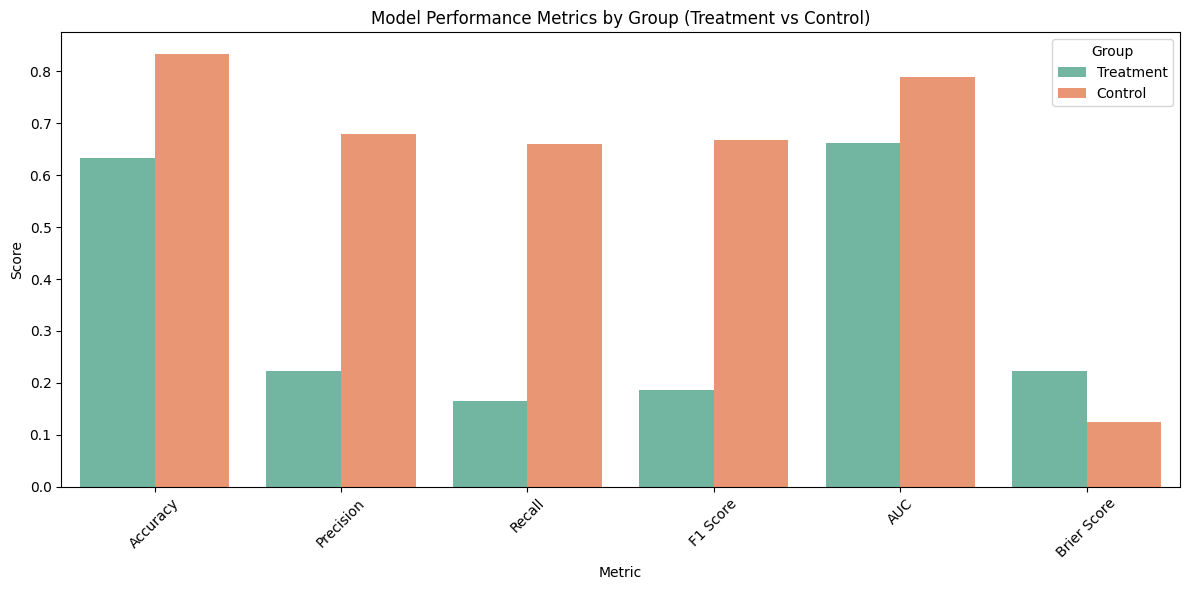

Saved combined performance results to 'model_performance_comparison_all.csv'


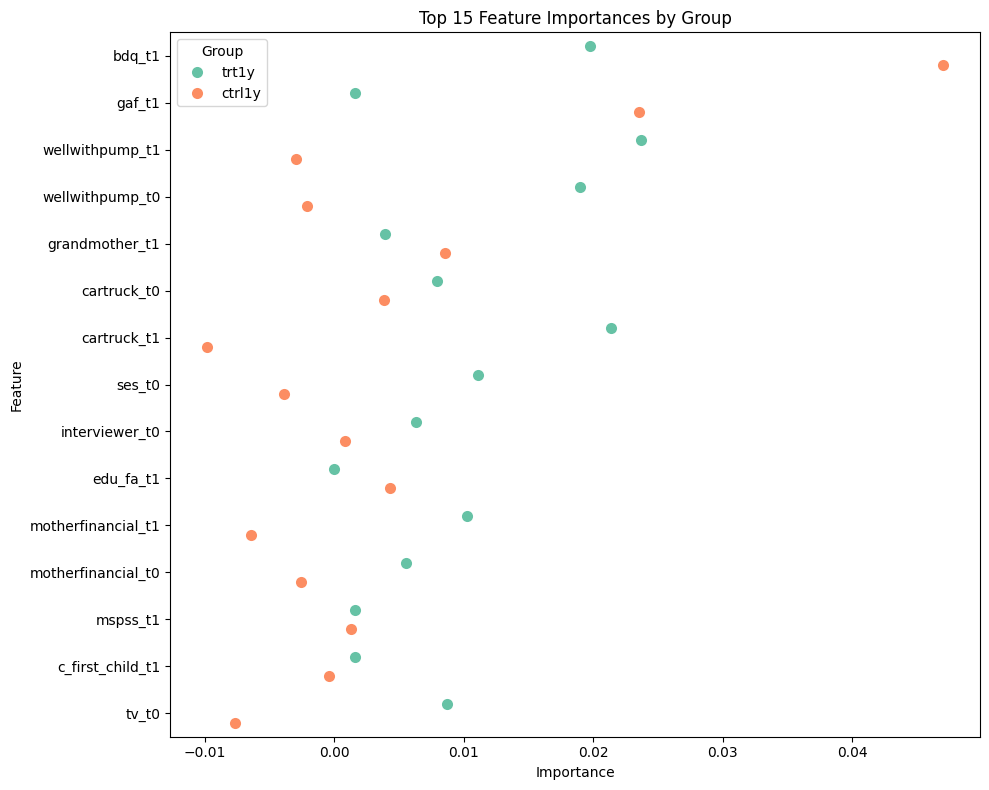

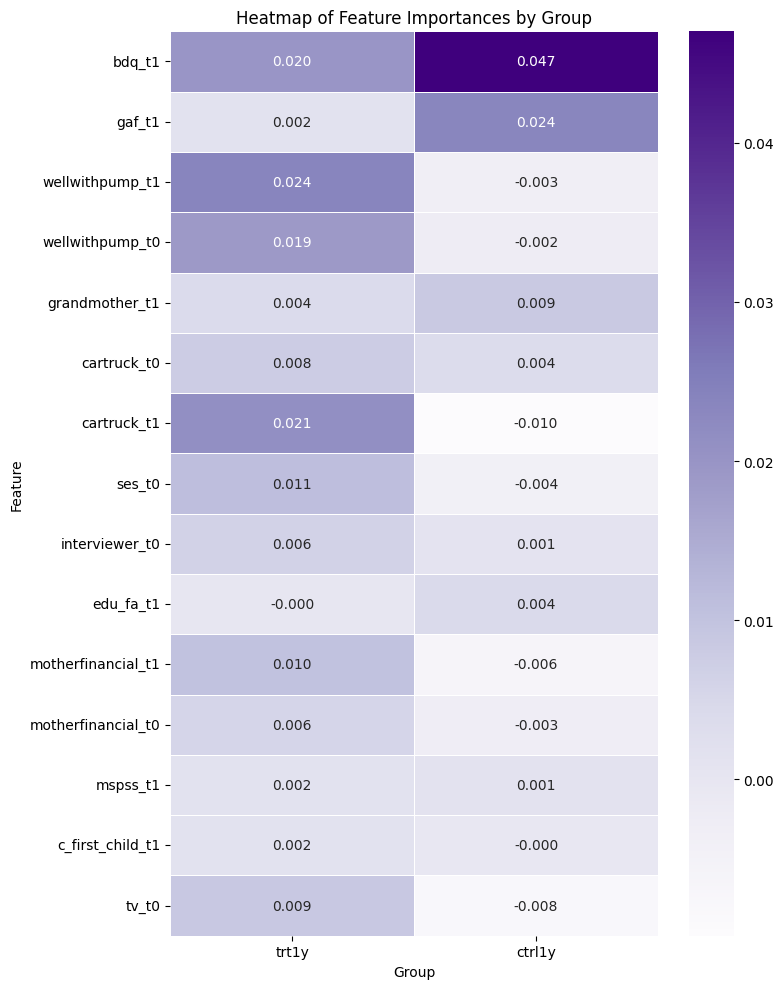

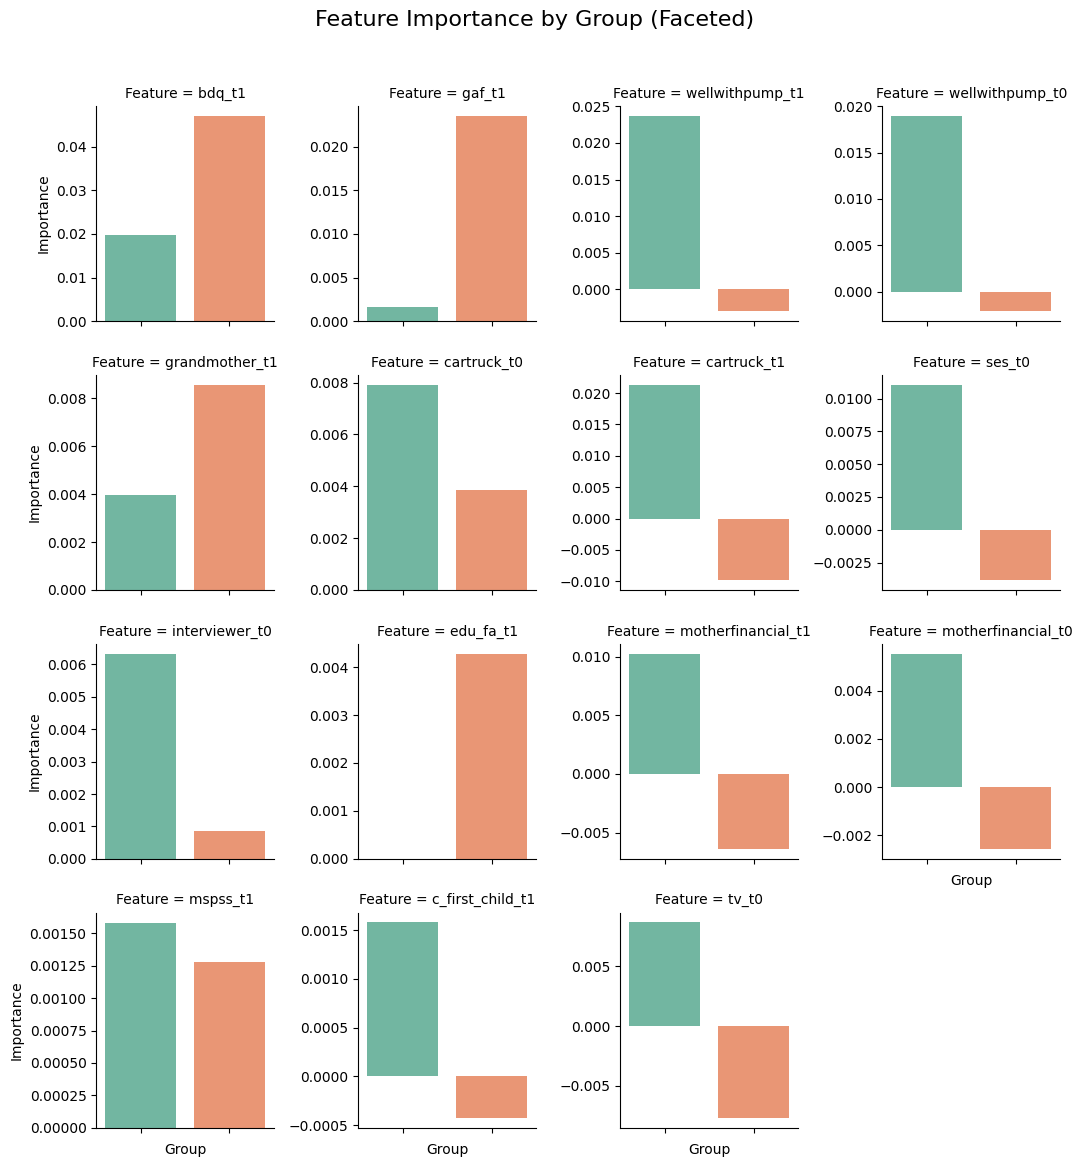

In [139]:
# ------------------------ Exportable + Visual Performance Results for both groups ------------------------ #

# Merge and reshape performance results for plotting
perf_all = pd.concat([performance_results_treat, performance_results_control], axis=0)
perf_long = perf_all.melt(id_vars=["Model", "Group"], var_name="Metric", value_name="Score")

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=perf_long, x="Metric", y="Score", hue="Group", ci=None, palette="Set2", dodge=True)
plt.title("Model Performance Metrics by Group (Treatment vs Control)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Group")
plt.tight_layout()
plt.show()

# Optional: save merged table
perf_all.to_csv("model_performance_comparison_all.csv", index=False)
print("Saved combined performance results to 'model_performance_comparison_all.csv'")


# ---------- Feature importance plots ---------- #

# Rename for merge
importance_df_trt = perm_importance_df_treat.rename(columns={"Importance": "trt1y"})
importance_df_ctrl = perm_importance_df_control.rename(columns={"Importance": "ctrl1y"})

# Merge
importance_combined = pd.merge(importance_df_trt, importance_df_ctrl, on="Feature")

# Average importance
importance_combined['avg_importance'] = (importance_combined['trt1y'] + importance_combined['ctrl1y']) / 2

# Top 15 features by average importance
importance_top15 = importance_combined.sort_values(by='avg_importance', ascending=False).head(15)

# Long format for plotting
importance_long = pd.melt(
    importance_top15.drop(columns='avg_importance'),
    id_vars='Feature',
    var_name='Group',
    value_name='Importance'
)

### Dot plot
plt.figure(figsize=(10, 8))
sns.stripplot(data=importance_long, x='Importance', y='Feature', hue='Group', dodge=True, size=8, palette="Set2")
plt.title("Top 15 Feature Importances by Group")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

### Heat map
heatmap_data = importance_top15.set_index('Feature')[['trt1y', 'ctrl1y']]
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, cmap='Purples', fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Feature Importances by Group")
plt.xlabel("Group")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Faceted bar chart
g = sns.catplot(
    data=importance_long,
    x="Group", y="Importance", hue="Group",
    col="Feature", col_wrap=4,
    kind="bar", height=3, aspect=0.9, sharey=False,
    palette="Set2"
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Feature Importance by Group (Faceted)", fontsize=16)
g.set_xticklabels(rotation=45)
plt.show()


